# Running the Luminosity-Temperature-Radius pipeline

We will use the XGA LTR pipeline to try to determine overdensity radii, and the global temperature and luminosity measurements within them. This process is [fully described here](https://xga.readthedocs.io/en/latest/notebooks/pipeline_tutorials/LT_pipeline.html). This should be relatively successful, even given the low surface brightness of the groups, as it easier to get temperature constraints on lower-temperature systems than hotter systems when using XMM.

## Import statements

In [33]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np
from astropy.units import Quantity
import os
from shutil import rmtree
from matplotlib import pyplot as plt

import xga
# This just sets the number of cores this analysis is allowed to use
xga.NUM_CORES = 35
# This is a bodge that will only work because xga_output in notebooks has already been defined, XGA
#  will be made to handle this more gracefully at some point
temp_dir = xga.OUTPUT
actual_dir = temp_dir.split('notebooks/lum_temp_rad_pipeline')[0]+'xga_output/'
xga.OUTPUT = actual_dir
xga.utils.OUTPUT = actual_dir
# As currently XGA will setup an xga_output directory in our current directory, I remove it to keep it all clean
if os.path.exists('xga_output'):
    rmtree('xga_output')
from xga.tools import luminosity_temperature_pipeline
from xga.relations.clusters.RT import arnaud_r2500
from xga.relations.clusters.TL import xcs_sdss_r2500_52_TL

%matplotlib inline

## Setting up directories

Need to make sure that some of the directories that we will be storing output files and figures in actually exist:

In [167]:
if not os.path.exists('../../outputs/results/'):
    os.makedirs('../../outputs/results/')
    
if not os.path.exists('../../outputs/figures/ltr_prop_comparisons/'):
    os.makedirs('../../outputs/figures/ltr_prop_comparisons/')

## Reading the sample file

Reading in the positions, names, and redshifts of the groups - the pipeline expects position columns to be called 'ra' and 'dec', so those are renamed:

In [3]:
samp = pd.read_csv('../../sample_files/init_group_info.csv')
samp = samp.rename(columns={'est_ra': 'ra', 'est_dec': 'dec'})
samp

name          ra        dec  redshift
0    25124  243.629055  26.730240     0.186
1    44739  229.793620  28.331750     0.118
2   19670A  150.256710  50.793942     0.134
3   19670B  150.214920  50.805014     0.134
4    12833  129.496800  44.248700     0.145
5    44858  230.112000  28.887750     0.127
6  PHL1811  328.769920  -9.588805     0.077
7    50433  157.758000  30.862000     0.136

## Running the pipeline

The LTR will be run, targeting two different overdensity radii. The pipeline runs will save the results to disk (as we are passing paths for the results and radii history files), as well as returning the results and the XGA ClusterSample object generated by the procedure.

### $R_{500}$

The first overdensity radius we are targeting is $R_{500}$, which is the default for this pipeline. The Arnaud et al. (2005) $R_{500}$-$T_{\rm{X}}$ is used for the process, and the starting radius is set to 200 kpc. Metallicity, nH, and redshift are all frozen during the spectral fitting process.

In [3]:
res_file = '../../outputs/results/ltr_r500_pipeline_results.csv'
rhist_file = '../../outputs/results/radii_r500_history.csv'

srcs, results, rad_hist = luminosity_temperature_pipeline(samp, Quantity(200, 'kpc'), timeout=Quantity(4, 'hr'), 
                                                          save_samp_results_path=res_file,
                                                          save_rad_history_path=rhist_file, 
                                                          core_excised=True, lo_en=Quantity(0.5, 'keV'), 
                                                          hi_en=Quantity(2.5, 'keV'), min_counts=25)

Generating products of type(s) expmap: 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]
/mnt/ufs18/home-218/turne540/code/XGA/xga/samples/extended.py:246: UserWarning: Non-fatal warnings occurred during the declaration of some sources, to access them please use the suppressed_warnings property of this sample.
  self._check_source_warnings()
Running XSPEC Fits: 100%|██████████| 8/8 [00:29<00:00,  3.68s/it]
/mnt/ufs18/home-218/turne540/code/XGA/xga/products/relation.py:704: UserWarning: Some of the x values you have passed are outside the validity range of this relation (1.0-12.0keV).
  warn("Some of the x values you have passed are outside the validity range of this relation "
Running XSPEC Fits: 100%|██████████| 8/8 [00:46<00:00,  5.79s/it]


### $R_{2500}$

The other overdensity radius we are targeting is $R_{2500}$. The Arnaud et al. (2005) $R_{2500}$-$T_{\rm{X}}$ is used for the process. As the ClusterSample in this run is completely separate from the $R_{500}$ run, it is possible that slightly different regions have been selected as contaminating sources, this would be due to XGA ClusterSamples allowing point sources in the core region to not be masked out, in case they are misidentified cool-cores.

In [4]:
res_file = '../../outputs/results/ltr_r2500_pipeline_results.csv'
rhist_file = '../../outputs/results/radii_r2500_history.csv'

srcs_r2500, results_r2500, \
    rad_hist_r2500 = luminosity_temperature_pipeline(samp, Quantity(200, 'kpc'), timeout=Quantity(4, 'hr'), 
                                                     rad_temp_rel=arnaud_r2500, save_samp_results_path=res_file,
                                                     save_rad_history_path=rhist_file, lo_en=Quantity(0.5, 'keV'), 
                                                          hi_en=Quantity(2.5, 'keV'), min_counts=25)

Setting up Galaxy Clusters: 100%|██████████| 8/8 [00:04<00:00,  1.63it/s]
/mnt/ufs18/home-218/turne540/code/XGA/xga/samples/extended.py:246: UserWarning: Non-fatal warnings occurred during the declaration of some sources, to access them please use the suppressed_warnings property of this sample.
  self._check_source_warnings()
Running XSPEC Fits: 100%|██████████| 8/8 [00:50<00:00,  6.26s/it]
/mnt/ufs18/home-218/turne540/code/XGA/xga/products/relation.py:704: UserWarning: Some of the x values you have passed are outside the validity range of this relation (1.0-12.0keV).
  warn("Some of the x values you have passed are outside the validity range of this relation "
Running XSPEC Fits: 100%|██████████| 8/8 [00:29<00:00,  3.68s/it]
/mnt/ufs18/home-218/turne540/code/XGA/xga/samples/extended.py:608: UserWarning: Those spectra have no associated XSPEC fit to 19670A
  warn(str(err))
Running XSPEC Fits: 100%|██████████| 1/1 [00:10<00:00, 10.35s/it]


### $R_{500}$ - with metallicity free

The first overdensity radius we are targeting is $R_{500}$, which is the default for this pipeline. The Arnaud et al. (2005) $R_{500}$-$T_{\rm{X}}$ is used for the process, and the starting radius is set to 200 kpc; nH and redshift are frozen during the spectral fitting process.

In [5]:
res_file = '../../outputs/results/ltr_r500_metfree_pipeline_results.csv'
rhist_file = '../../outputs/results/radii_r500_metfree_history.csv'

srcs_metfree, results_metfree, rad_hist_metfree = luminosity_temperature_pipeline(samp, Quantity(200, 'kpc'), 
                                                                                  timeout=Quantity(4, 'hr'), 
                                                                                  save_samp_results_path=res_file, 
                                                                                  save_rad_history_path=rhist_file, 
                                                                                  core_excised=True, freeze_met=False, lo_en=Quantity(0.5, 'keV'), 
                                                          hi_en=Quantity(2.5, 'keV'), min_counts=25)

Setting up Galaxy Clusters: 100%|██████████| 8/8 [00:05<00:00,  1.60it/s]
/mnt/ufs18/home-218/turne540/code/XGA/xga/samples/extended.py:246: UserWarning: Non-fatal warnings occurred during the declaration of some sources, to access them please use the suppressed_warnings property of this sample.
  self._check_source_warnings()
Running XSPEC Fits: 100%|██████████| 8/8 [00:44<00:00,  5.53s/it]
/mnt/ufs18/home-218/turne540/code/XGA/xga/products/relation.py:704: UserWarning: Some of the x values you have passed are outside the validity range of this relation (1.0-12.0keV).
  warn("Some of the x values you have passed are outside the validity range of this relation "
Running XSPEC Fits: 100%|██████████| 8/8 [00:59<00:00,  7.49s/it]


### $R_{2500}$ - with metallicity free

The other overdensity radius we are targeting is $R_{2500}$. The Arnaud et al. (2005) $R_{2500}$-$T_{\rm{X}}$ is used for the process. As the ClusterSample in this run is completely separate from the $R_{500}$ run, it is possible that slightly different regions have been selected as contaminating sources, this would be due to XGA ClusterSamples allowing point sources in the core region to not be masked out, in case they are misidentified cool-cores.

In [6]:
res_file = '../../outputs/results/ltr_r2500_metfree_pipeline_results.csv'
rhist_file = '../../outputs/results/radii_r2500_metfree_history.csv'

srcs_r2500_metfree, results_r2500_metfree, \
    rad_hist_r2500_metfree = luminosity_temperature_pipeline(samp, Quantity(200, 'kpc'), timeout=Quantity(4, 'hr'), 
                                                             rad_temp_rel=arnaud_r2500, 
                                                             save_samp_results_path=res_file,
                                                             save_rad_history_path=rhist_file,
                                                             freeze_met=False, lo_en=Quantity(0.5, 'keV'), 
                                                          hi_en=Quantity(2.5, 'keV'), min_counts=25)

Setting up Galaxy Clusters: 100%|██████████| 8/8 [00:04<00:00,  1.64it/s]
/mnt/ufs18/home-218/turne540/code/XGA/xga/samples/extended.py:246: UserWarning: Non-fatal warnings occurred during the declaration of some sources, to access them please use the suppressed_warnings property of this sample.
  self._check_source_warnings()
Running XSPEC Fits: 100%|██████████| 8/8 [01:25<00:00, 10.74s/it]
/mnt/ufs18/home-218/turne540/code/XGA/xga/products/relation.py:704: UserWarning: Some of the x values you have passed are outside the validity range of this relation (1.0-12.0keV).
  warn("Some of the x values you have passed are outside the validity range of this relation "
Running XSPEC Fits: 100%|██████████| 8/8 [00:56<00:00,  7.10s/it]
/mnt/ufs18/home-218/turne540/code/XGA/xga/samples/extended.py:608: UserWarning: Those spectra have no associated XSPEC fit to 19670A
  warn(str(err))
Running XSPEC Fits: 100%|██████████| 1/1 [00:19<00:00, 19.88s/it]
/mnt/ufs18/home-218/turne540/code/XGA/xga/tools

### Examining the spectra

#### $R_{500}$

25124 894.33 kpc
0900700101 pn


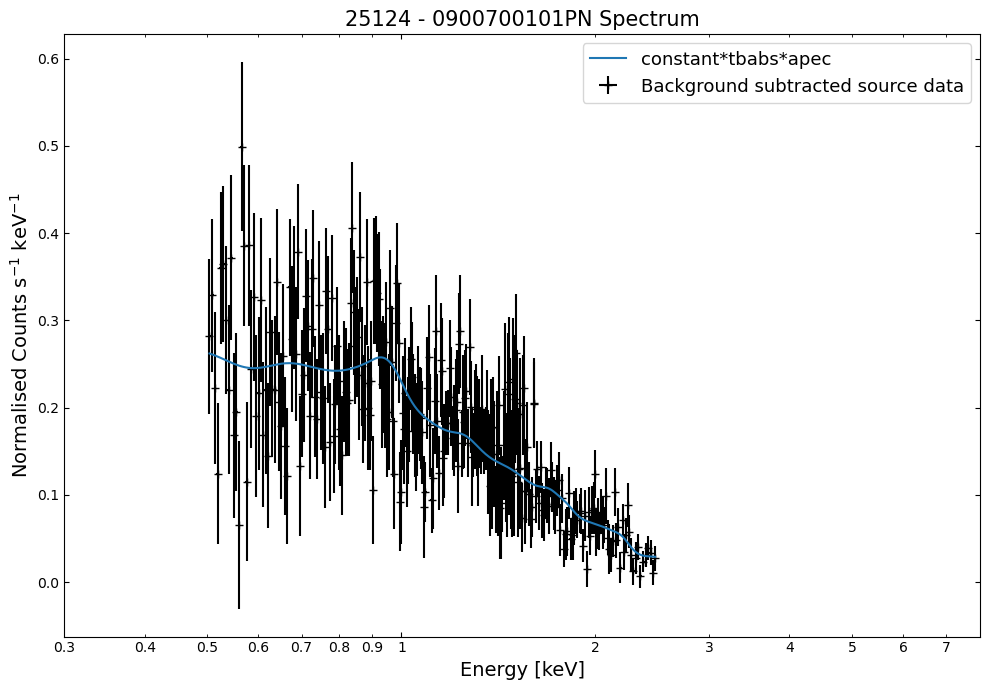

0900700101 mos2


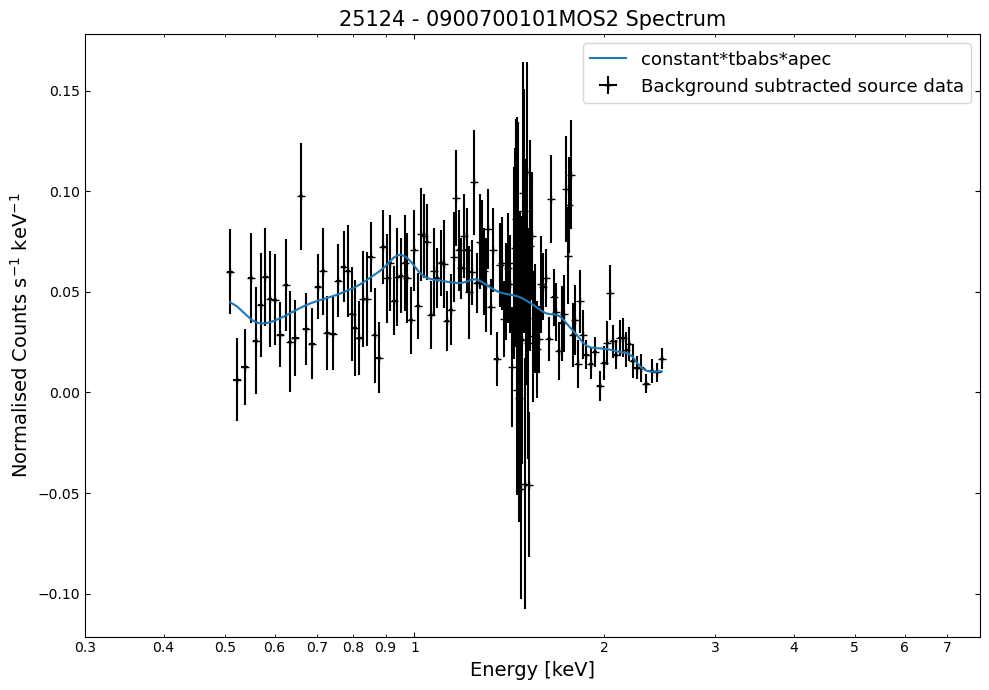





44739 420.33 kpc
0900700201 pn


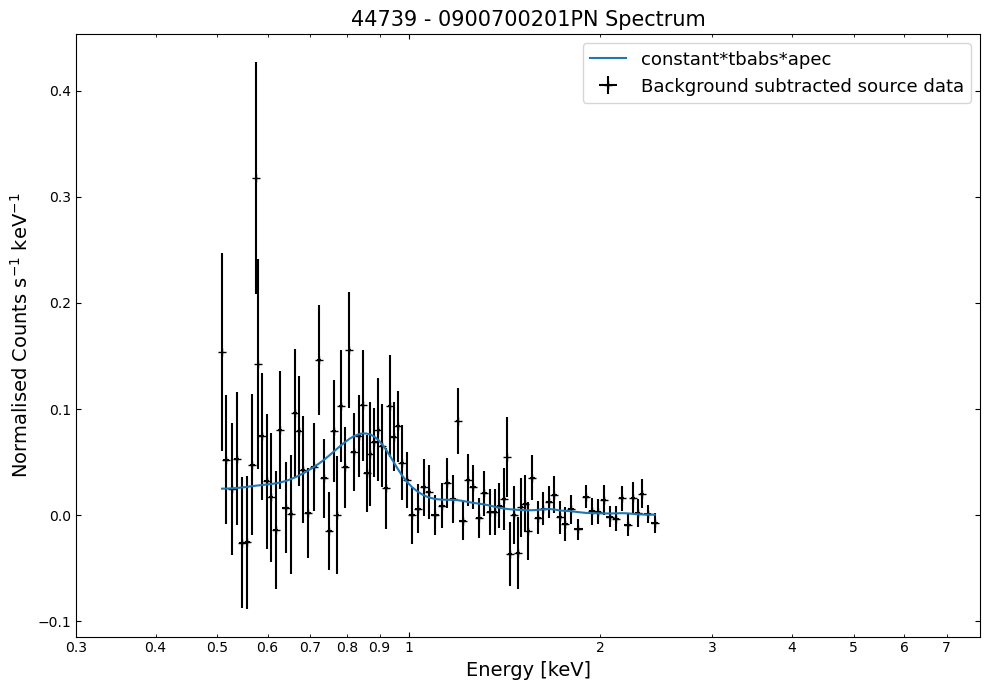

0900700201 mos1


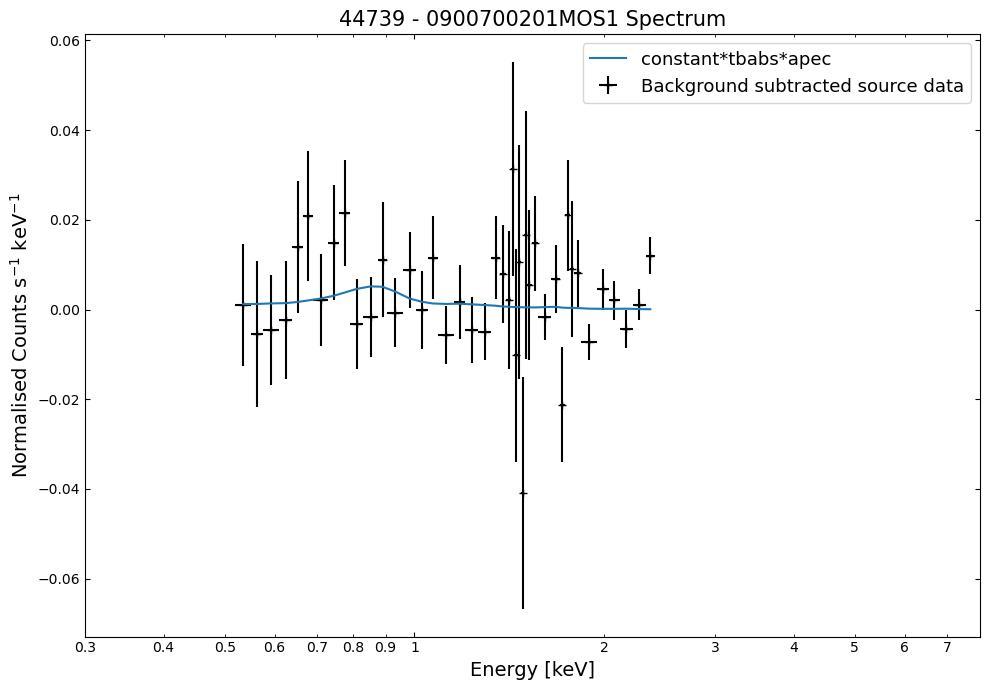

0900700201 mos2


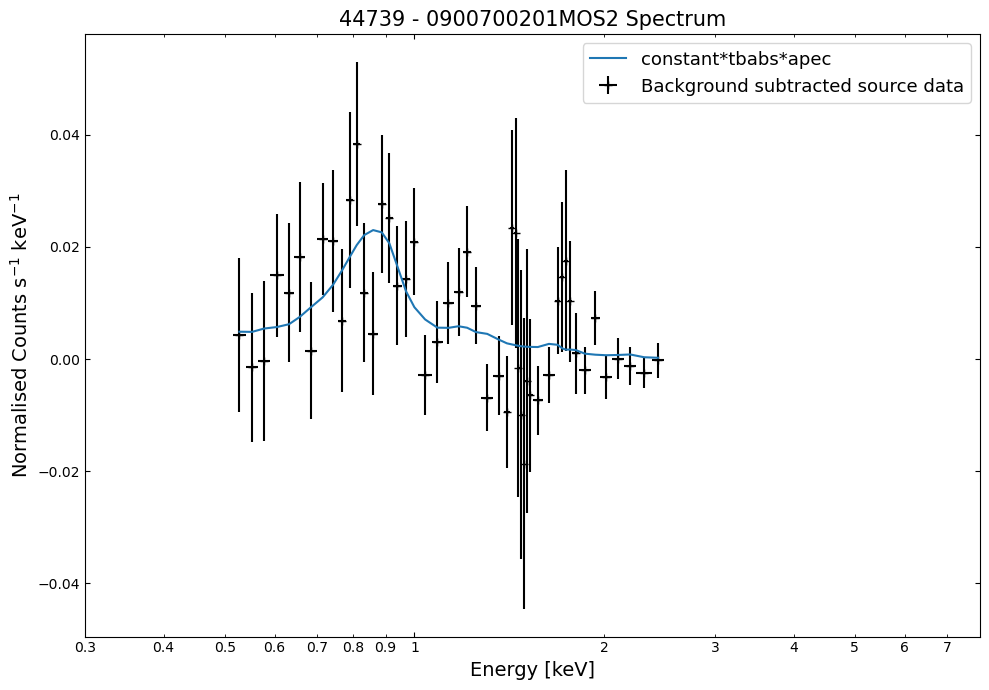





19670A 471.75 kpc
0861080101 pn


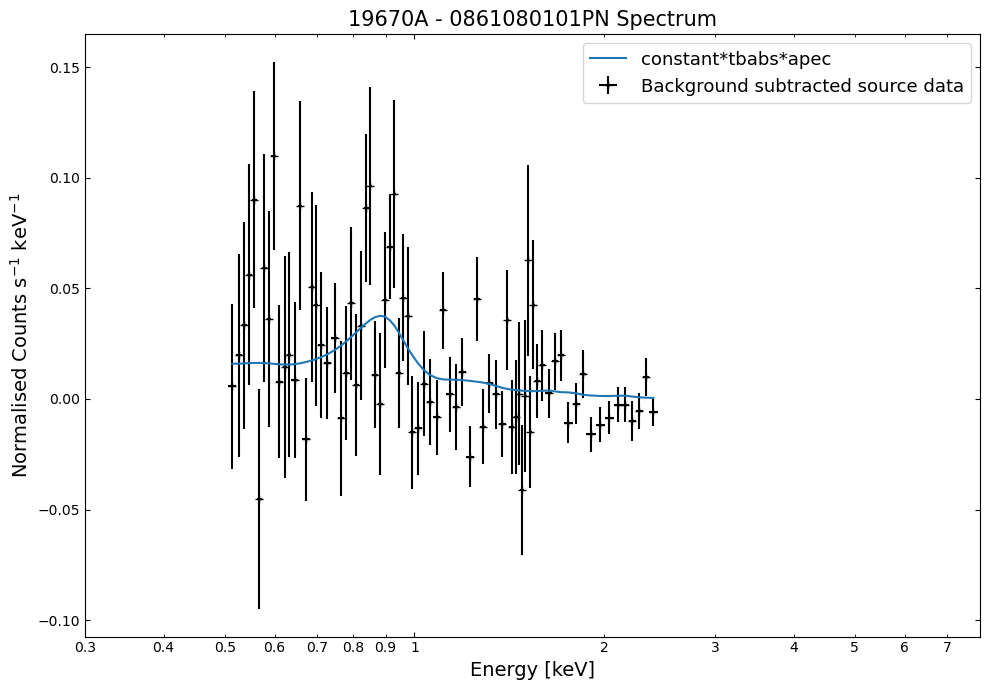

0861080101 mos1


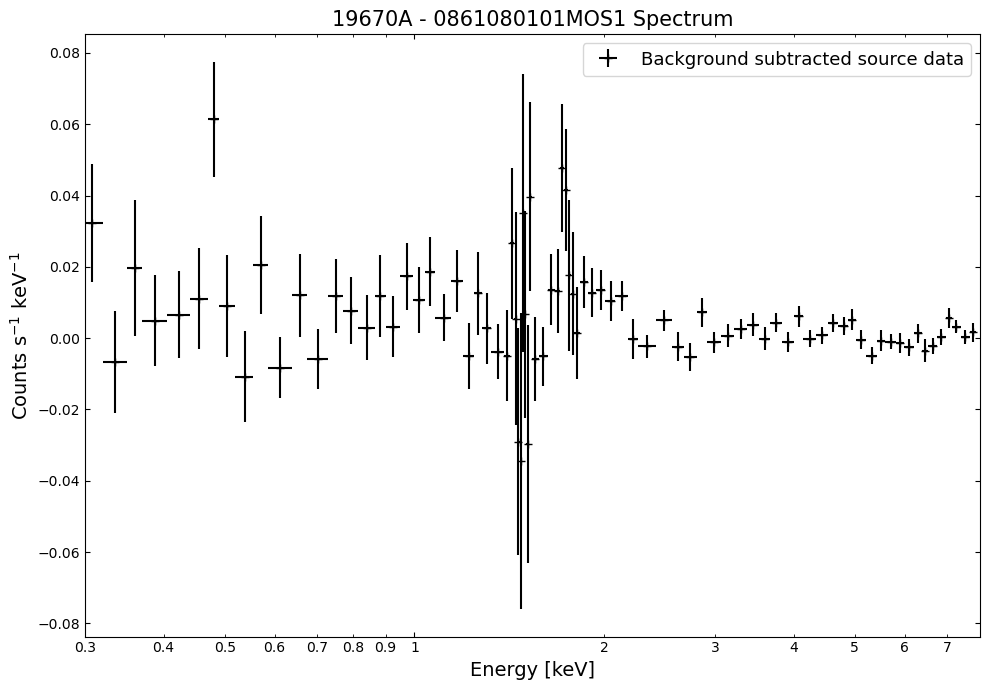

0861080101 mos2


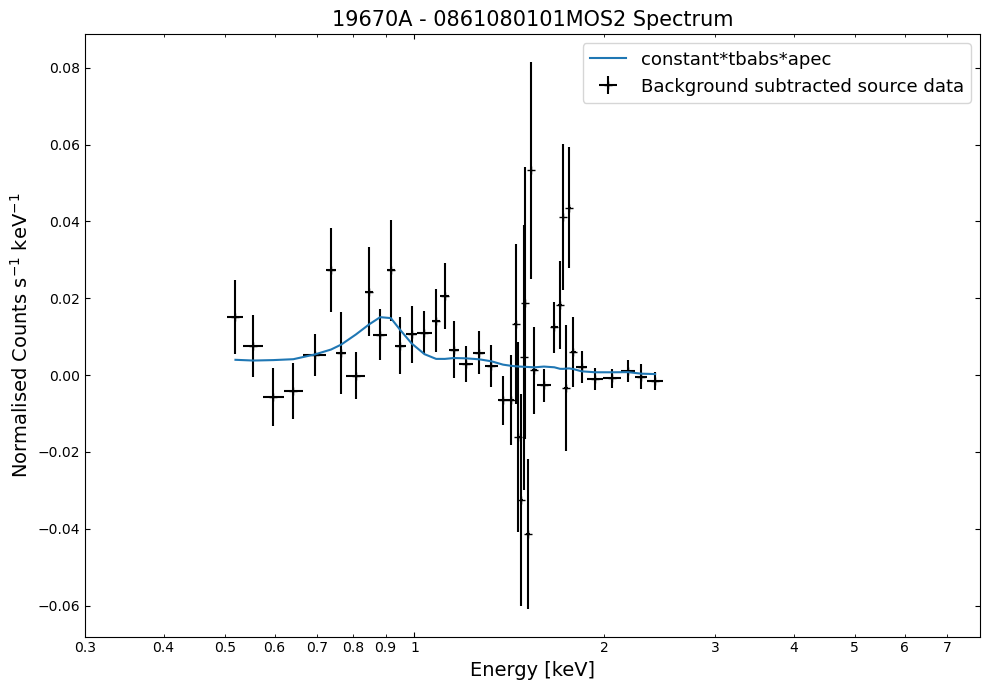





19670B 535.99 kpc
0861080101 pn


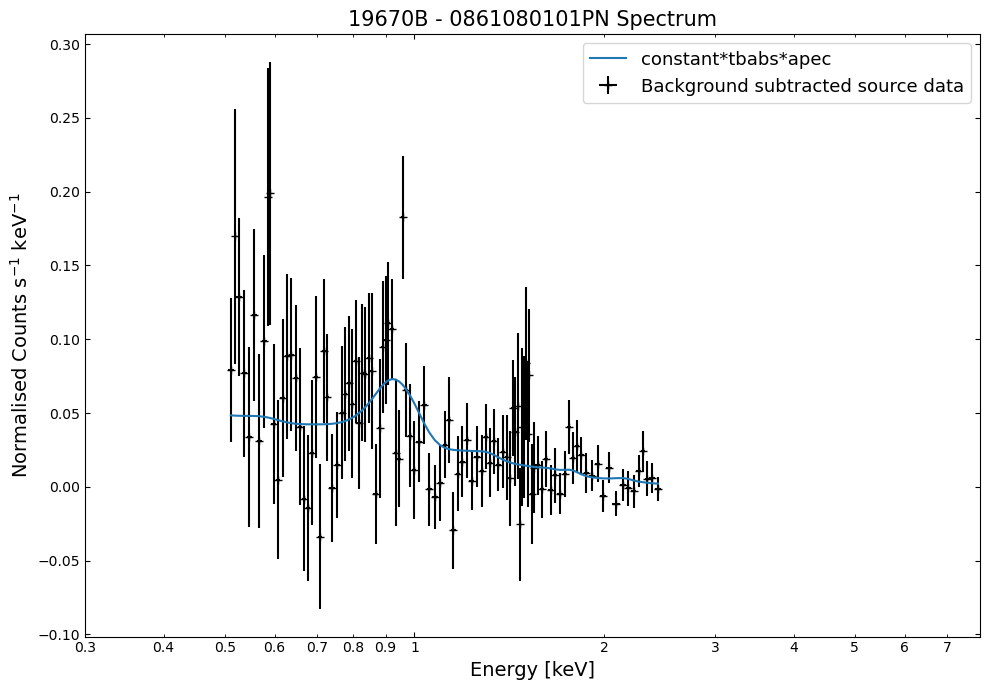

0861080101 mos1


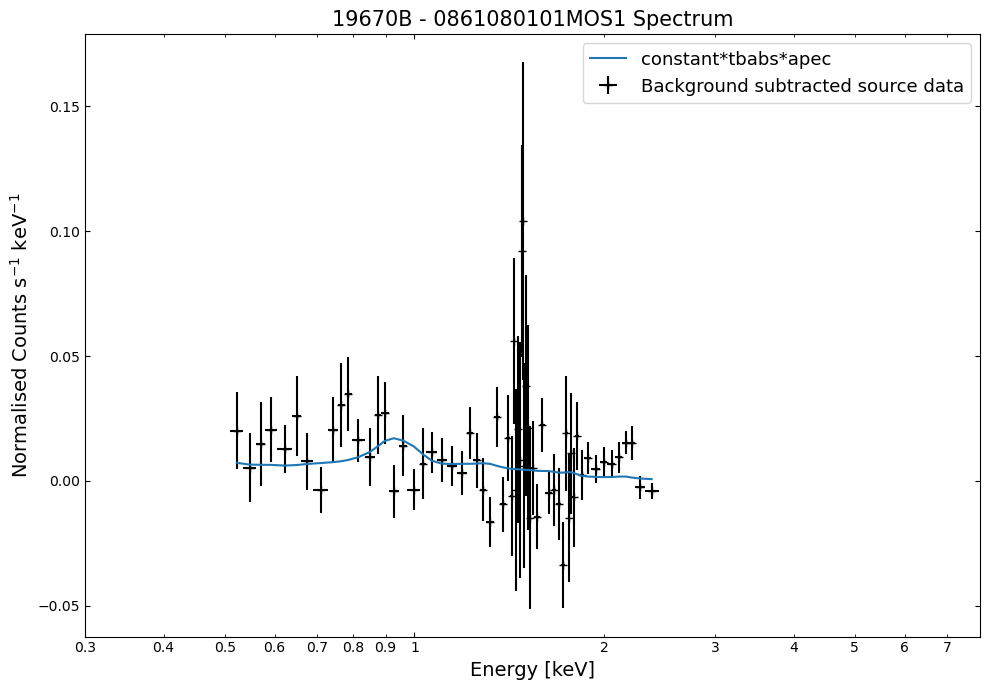

0861080101 mos2


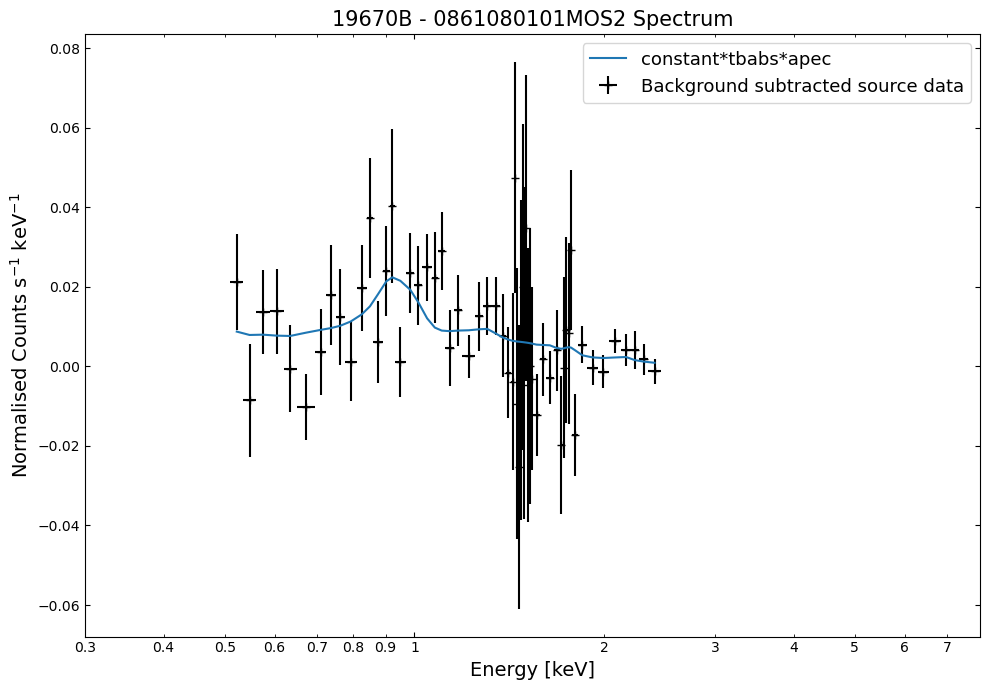





12833 491.09 kpc
0861080201 pn


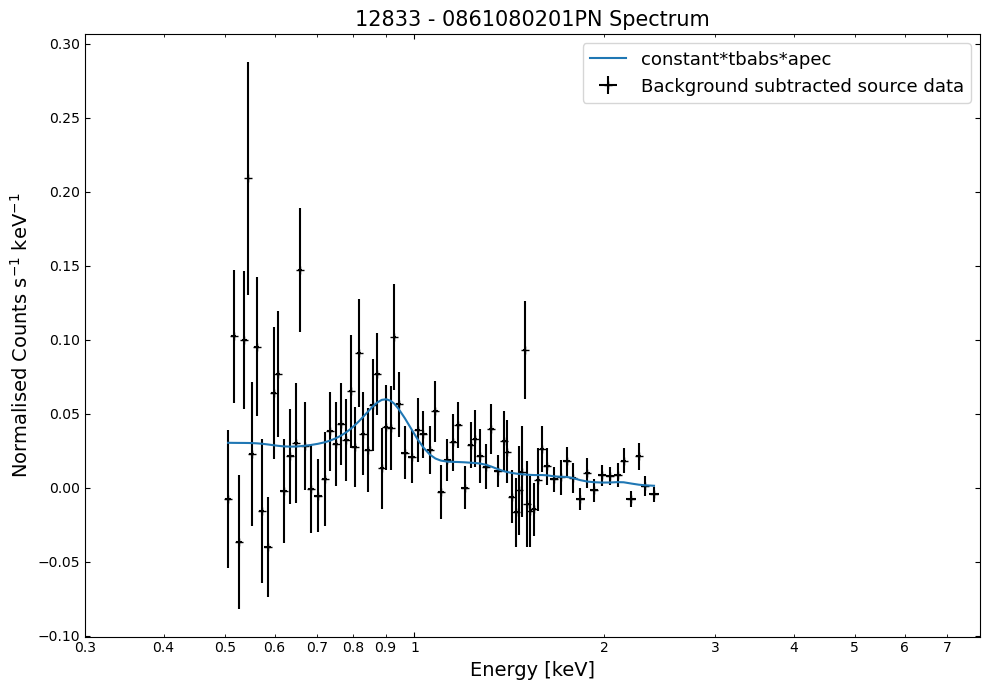

0861080201 mos1


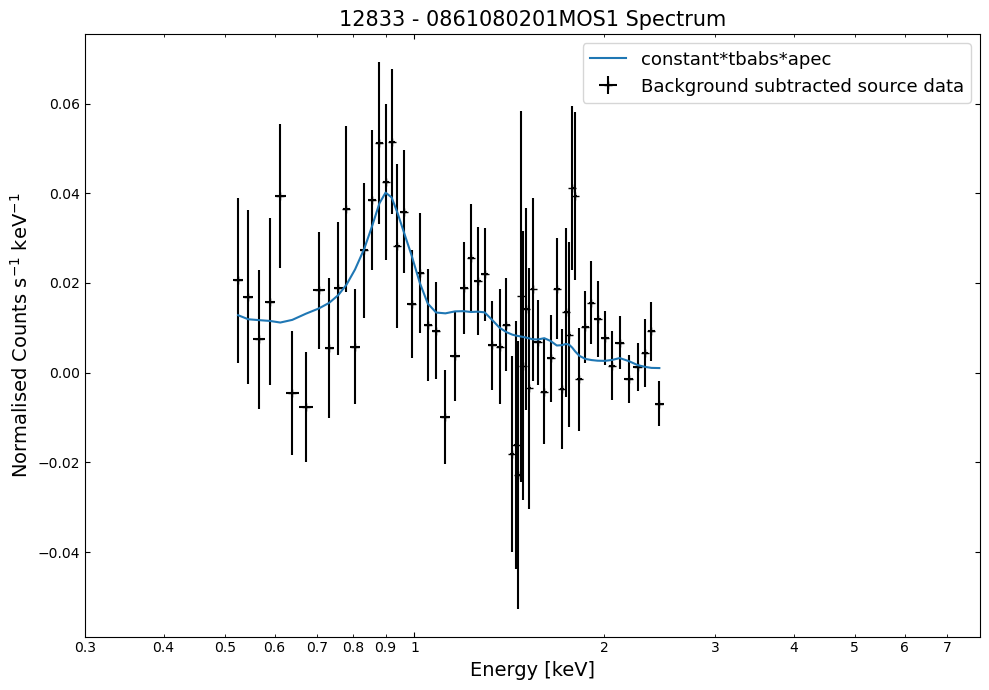

0861080201 mos2


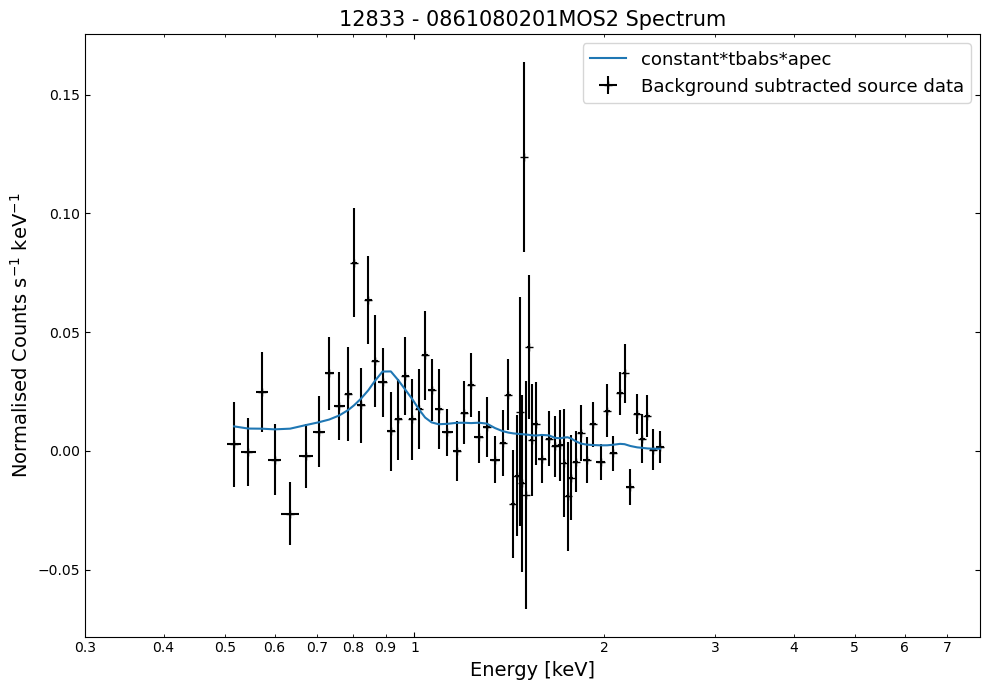





44858 621.79 kpc
0820240301 pn


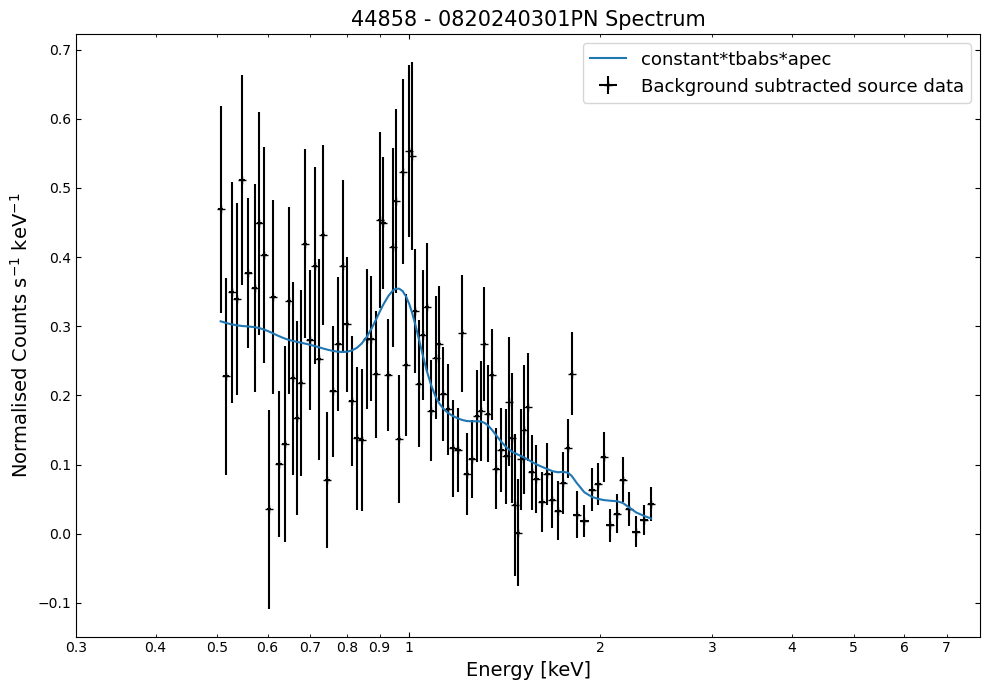

0820240301 mos1


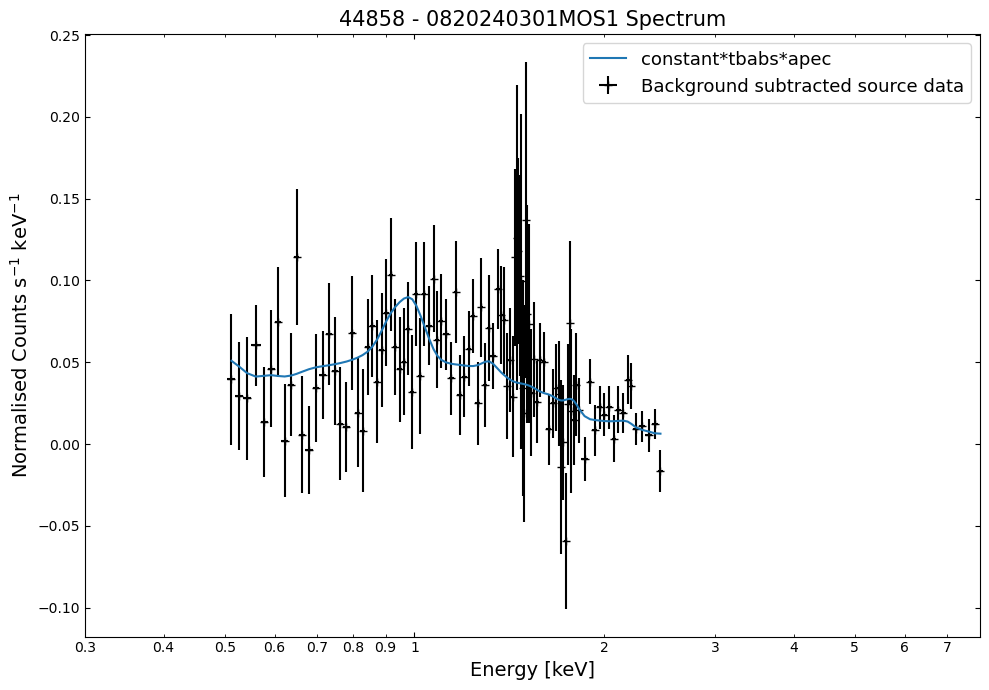

0820240301 mos2


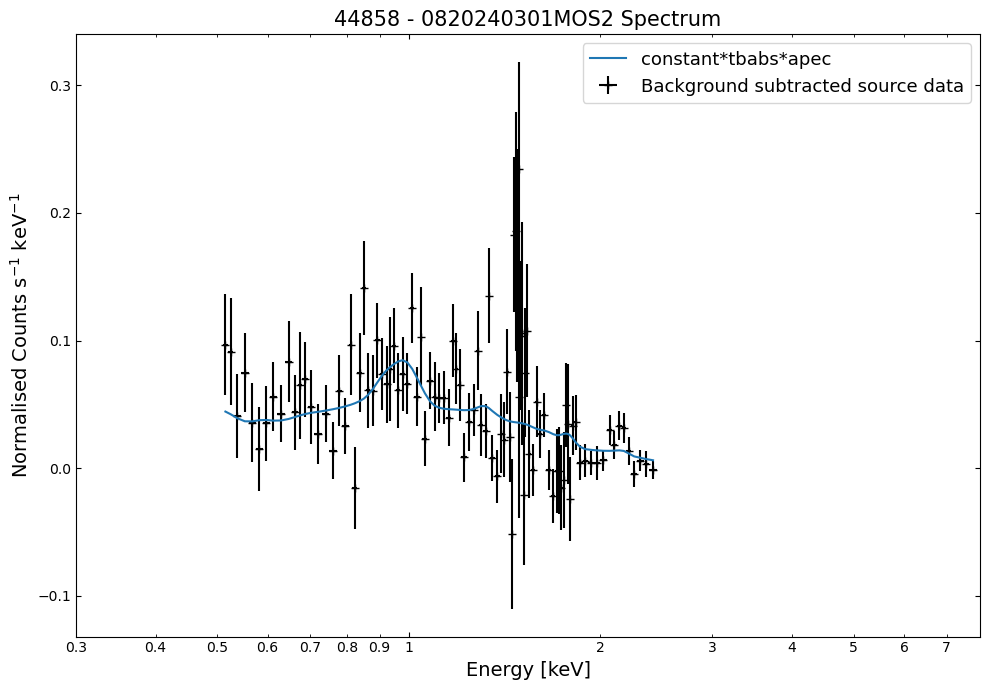





PHL1811 567.68 kpc
0204310101 mos1


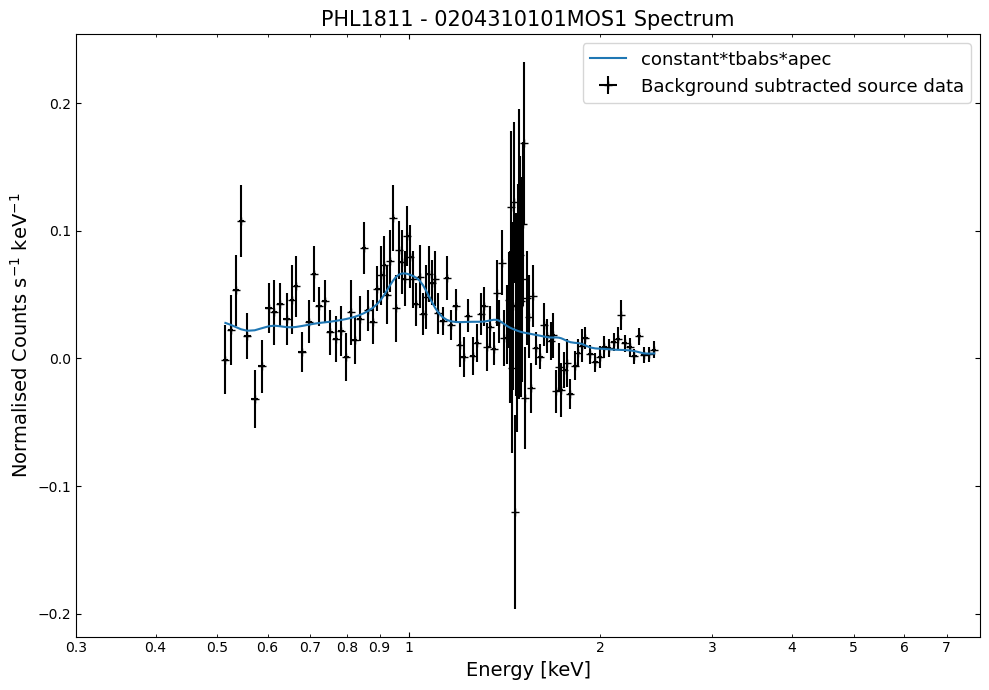

0204310101 mos2


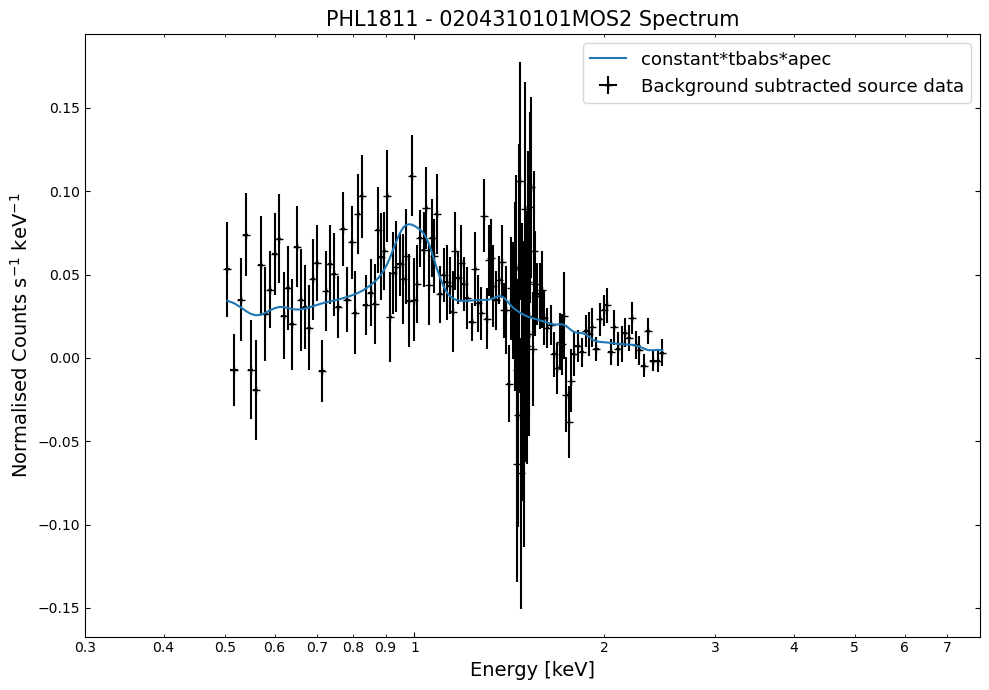

0761910201 mos2


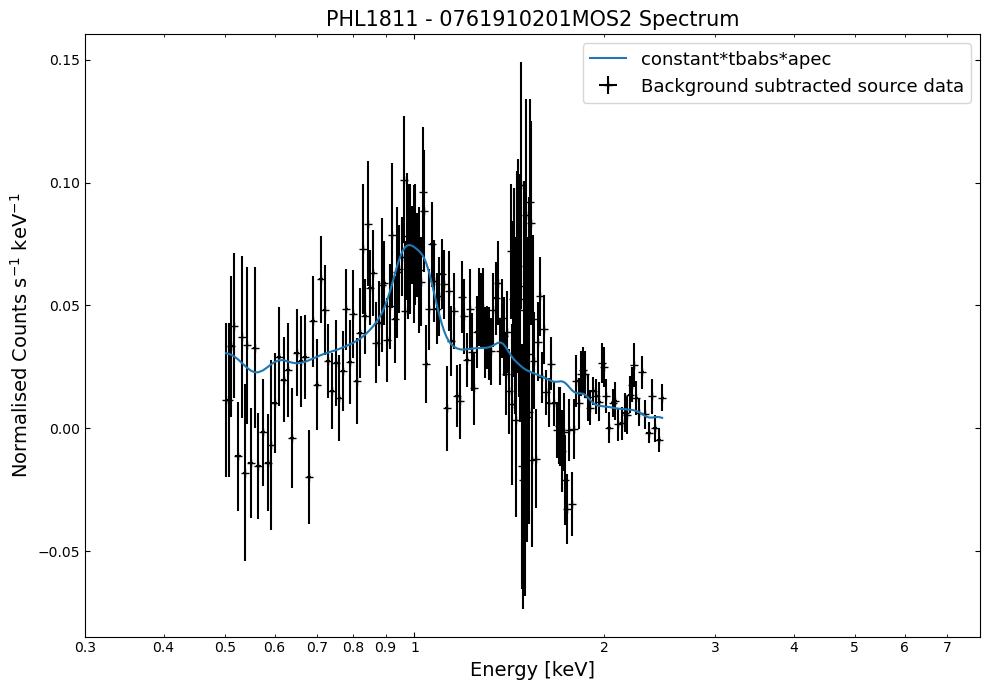





50433 476.23 kpc
0102040301 pn


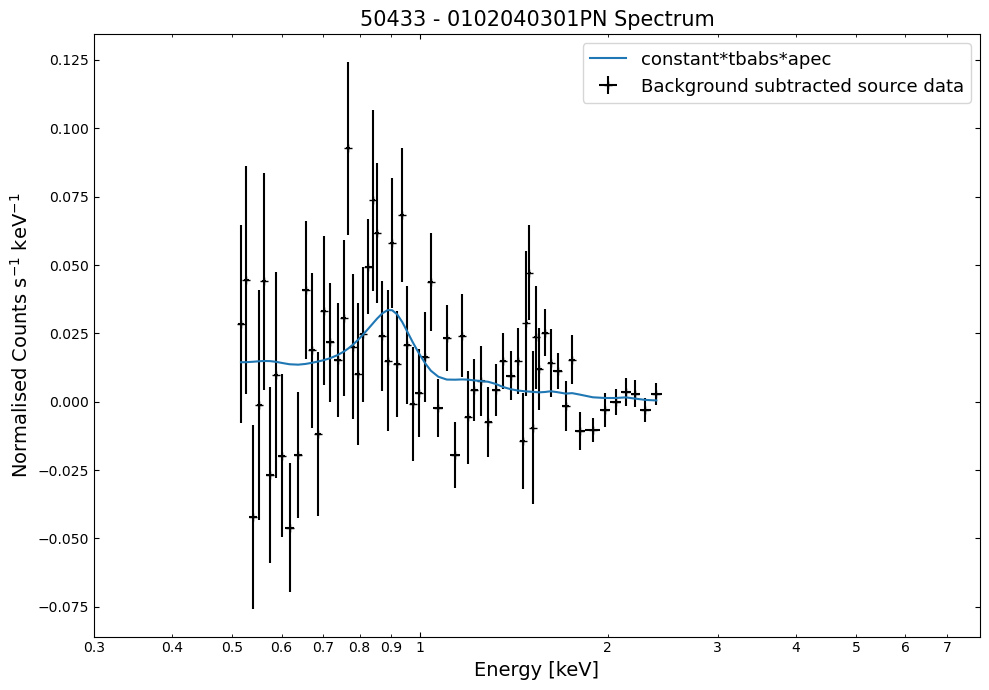

0102040301 mos1


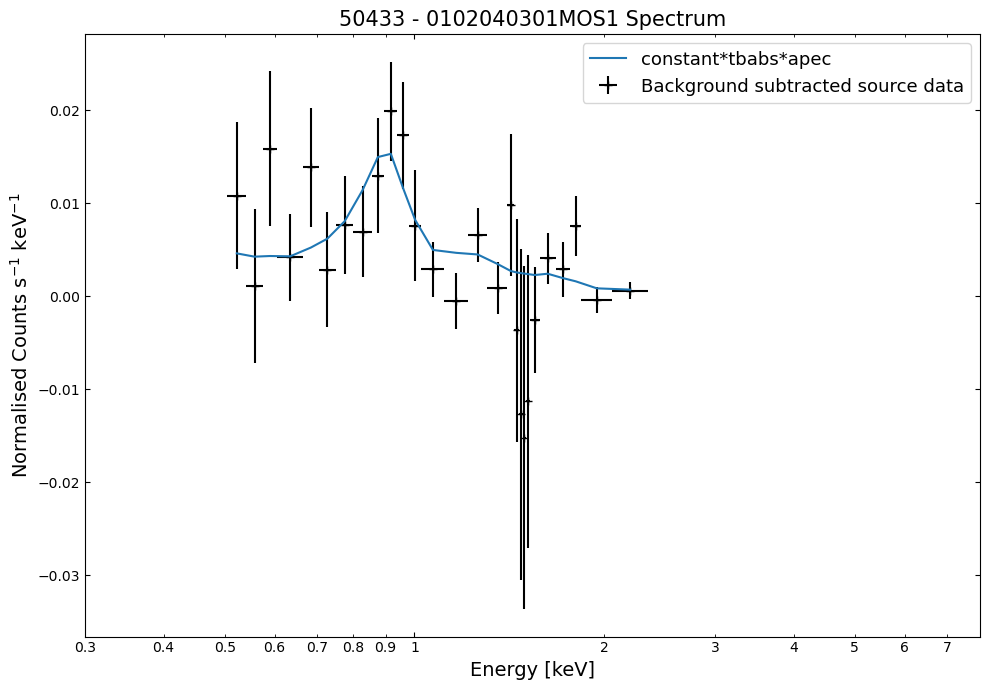

0102040301 mos2


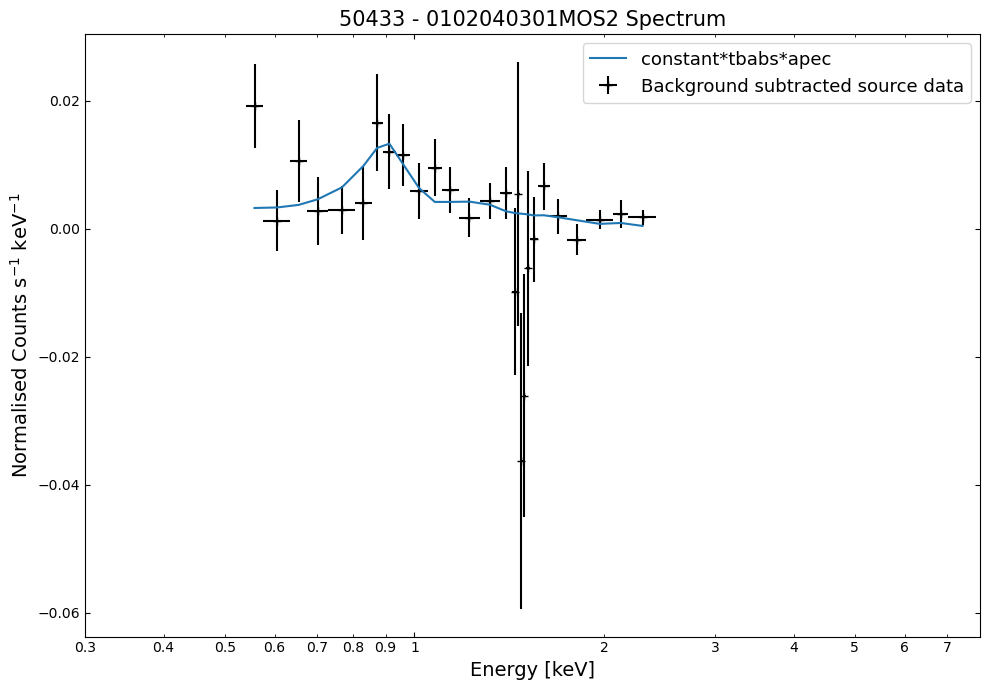

In [9]:
for src_ind, src in enumerate(srcs):
    print(src.name, src.r500.round(2))

#     for sp in src.get_spectra(srcs.r500[src_ind]):
    for sp in src.get_spectra(srcs.r500[src_ind], min_counts=25):

        print(sp.obs_id, sp.instrument)
        sp.view(show_model_fits=True)

    print('\n\n\n')

#### $R_{500}$ - with metallicity free

25124 867.7840609187064 kpc
0900700101 pn


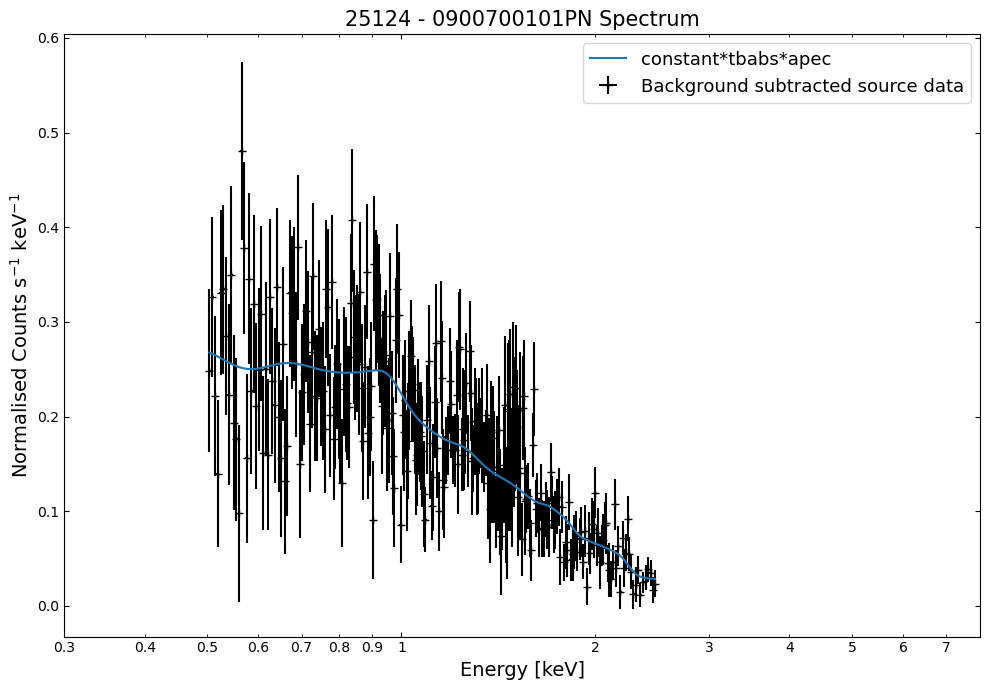

0900700101 mos2


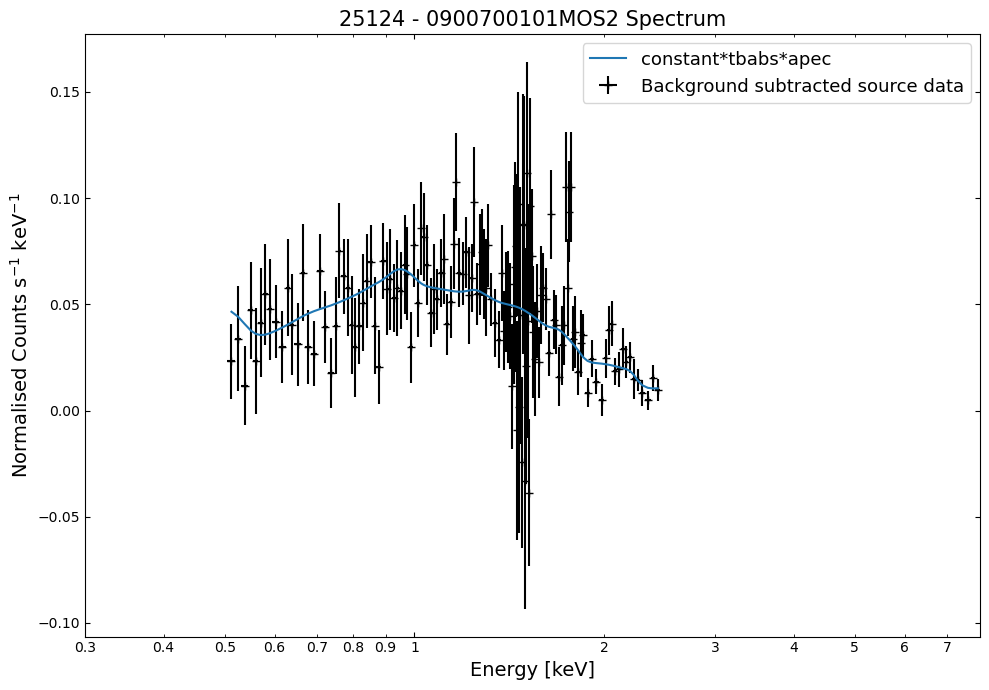





44739 421.30485379284033 kpc
0900700201 pn


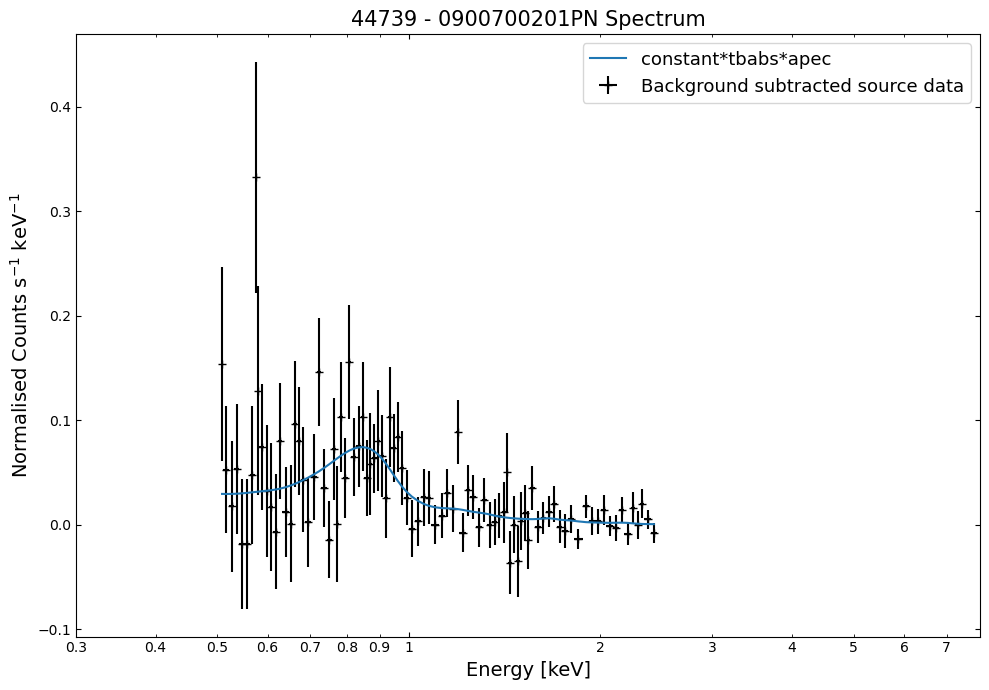

0900700201 mos1


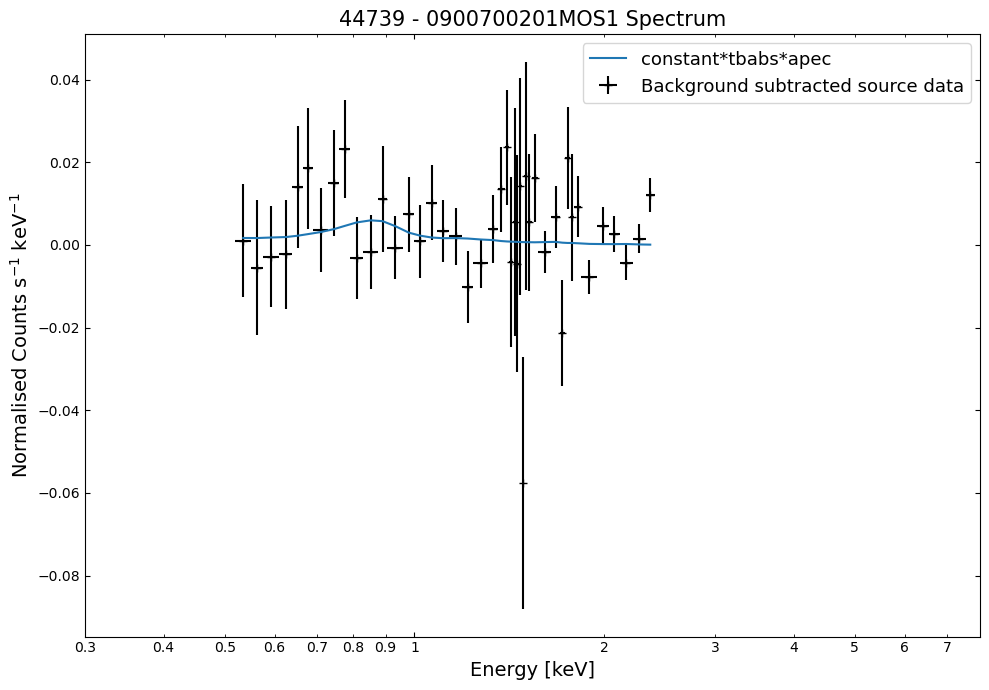

0900700201 mos2


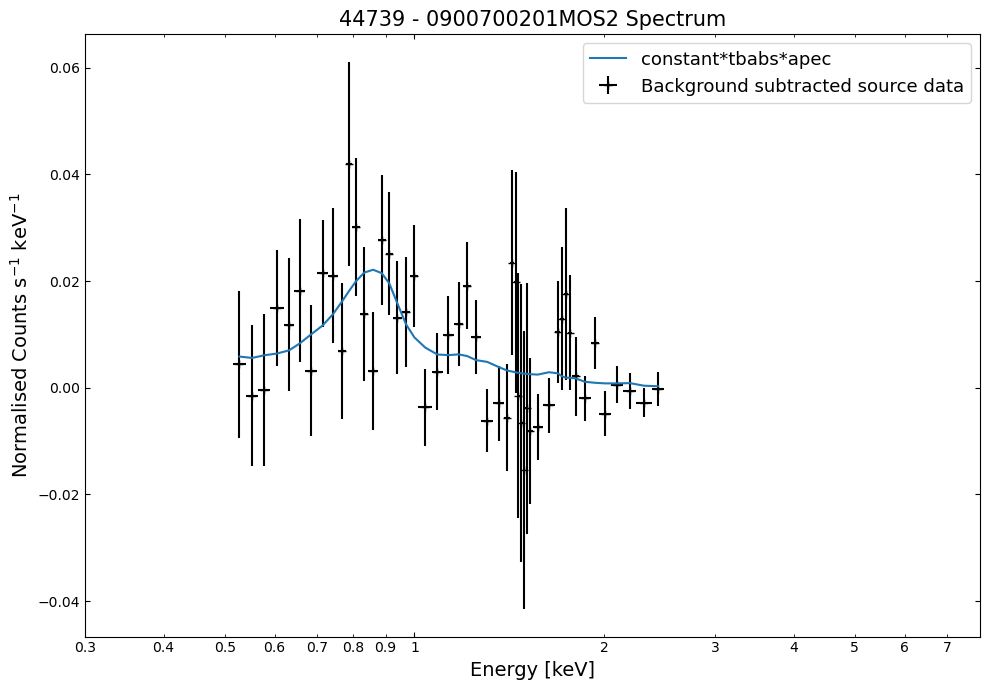





19670A 471.238119717272 kpc
0861080101 pn


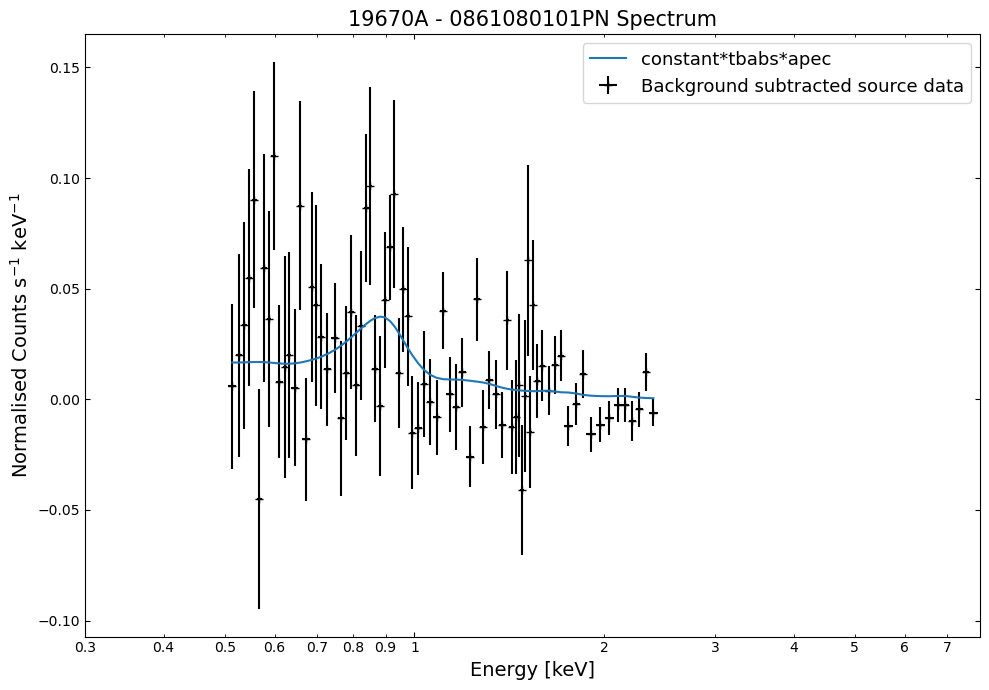

0861080101 mos1


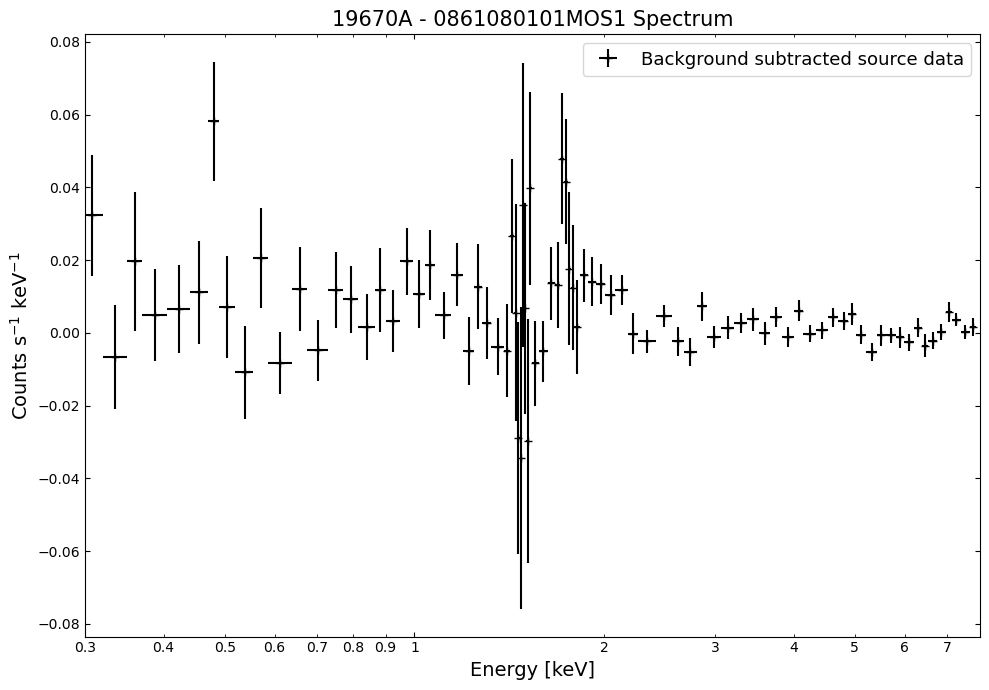

0861080101 mos2


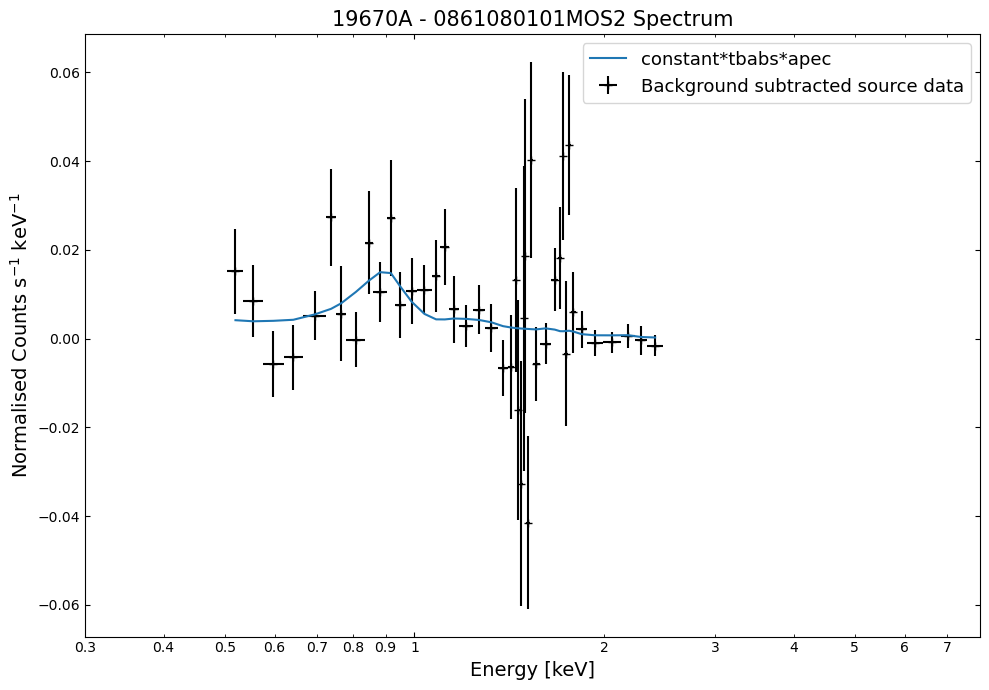





19670B 490.55005793436663 kpc
0861080101 pn


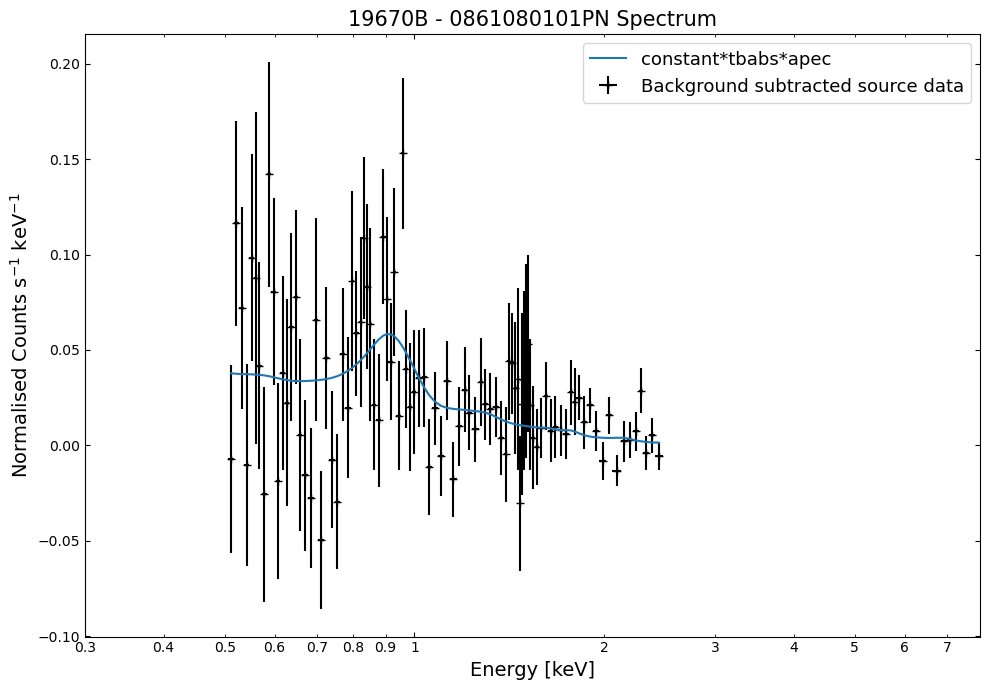

0861080101 mos1


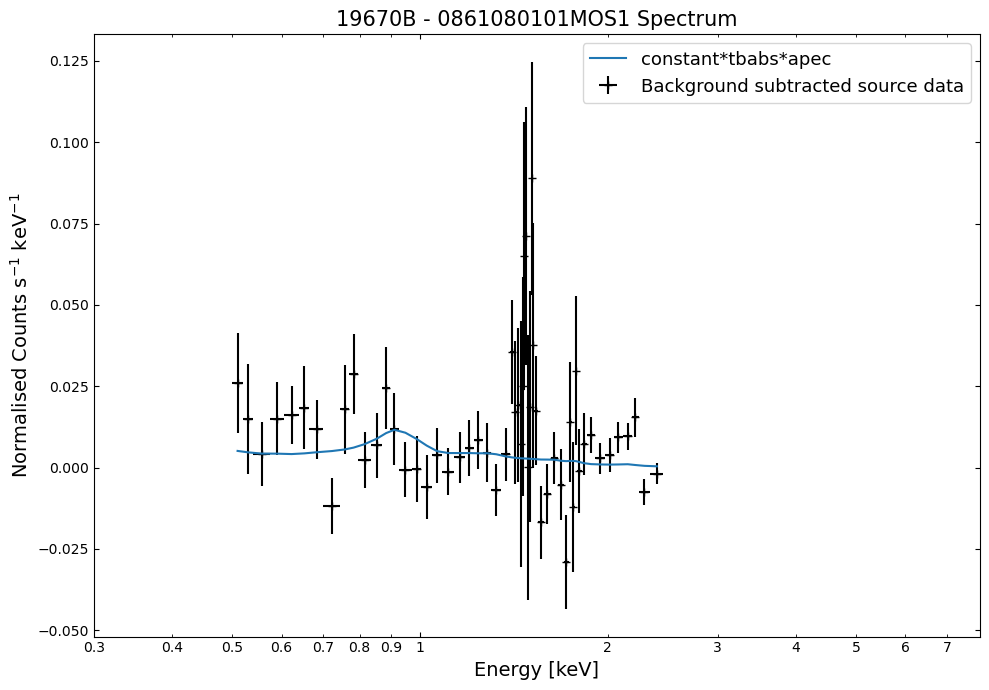

0861080101 mos2


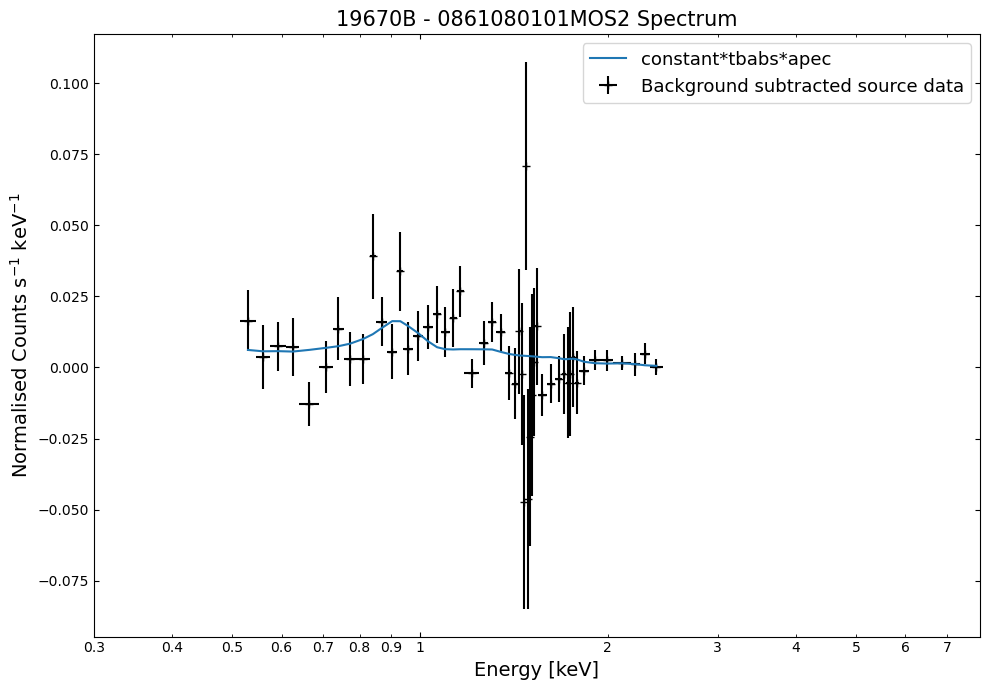





12833 480.36304182405496 kpc
0861080201 pn


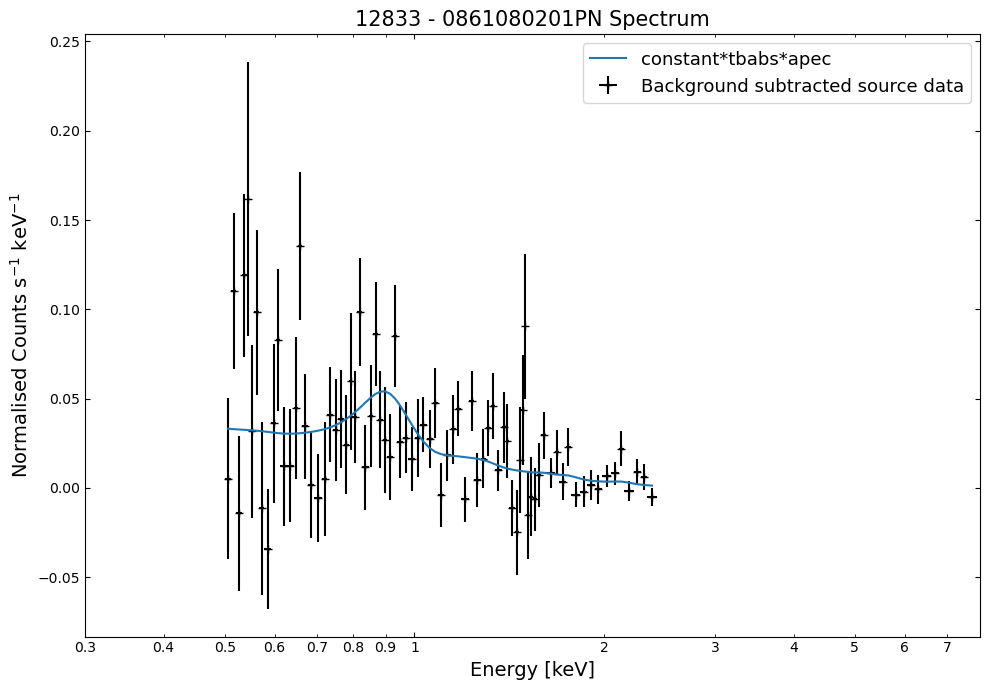

0861080201 mos1


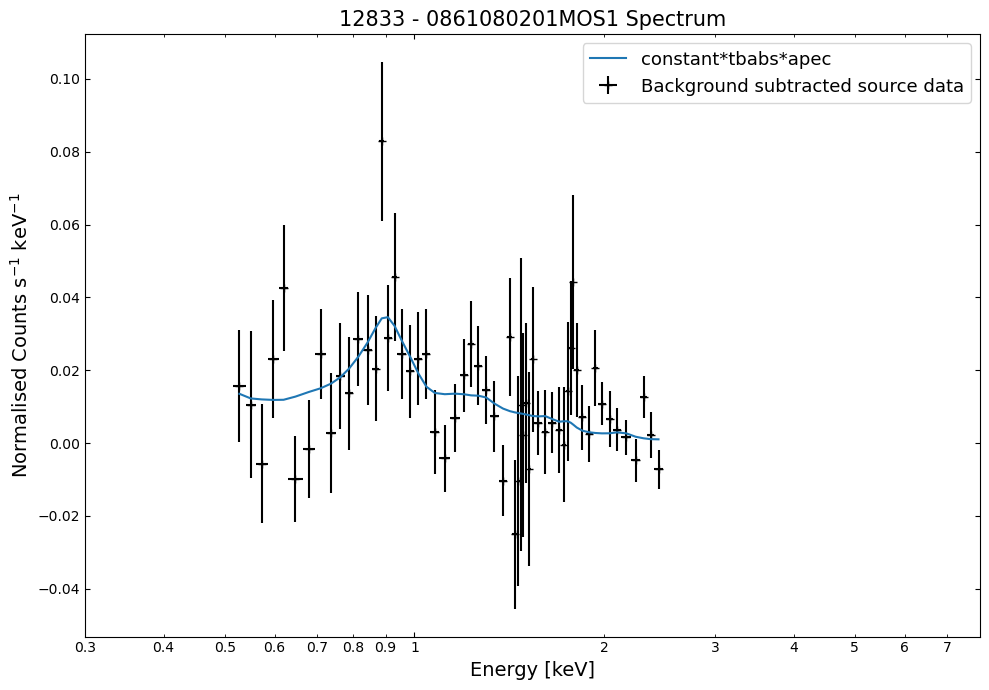

0861080201 mos2


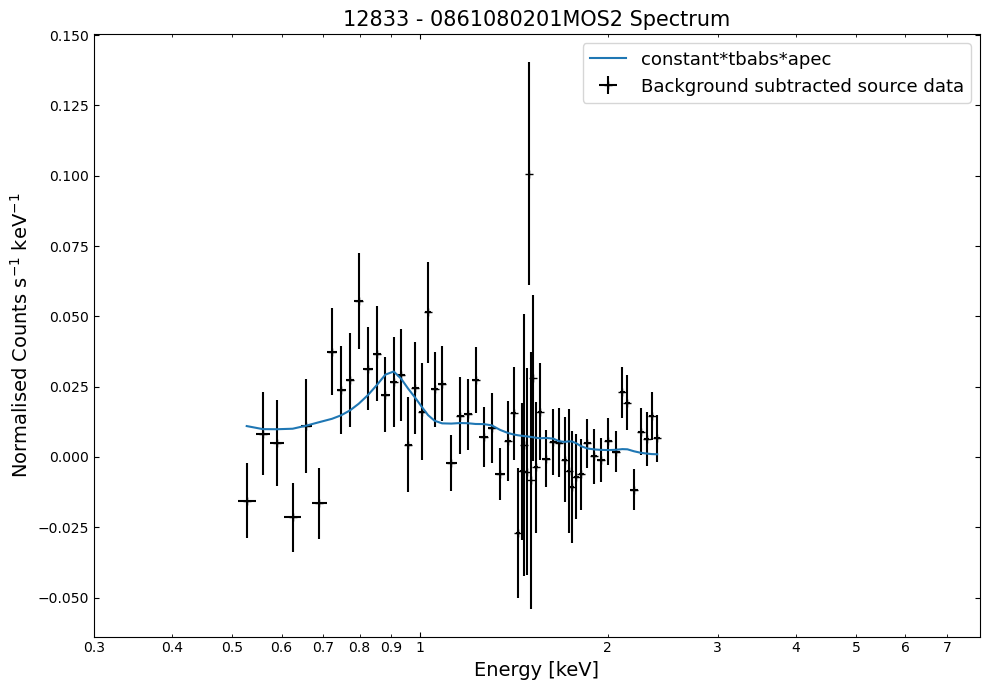





44858 625.1812629971631 kpc
0820240301 pn


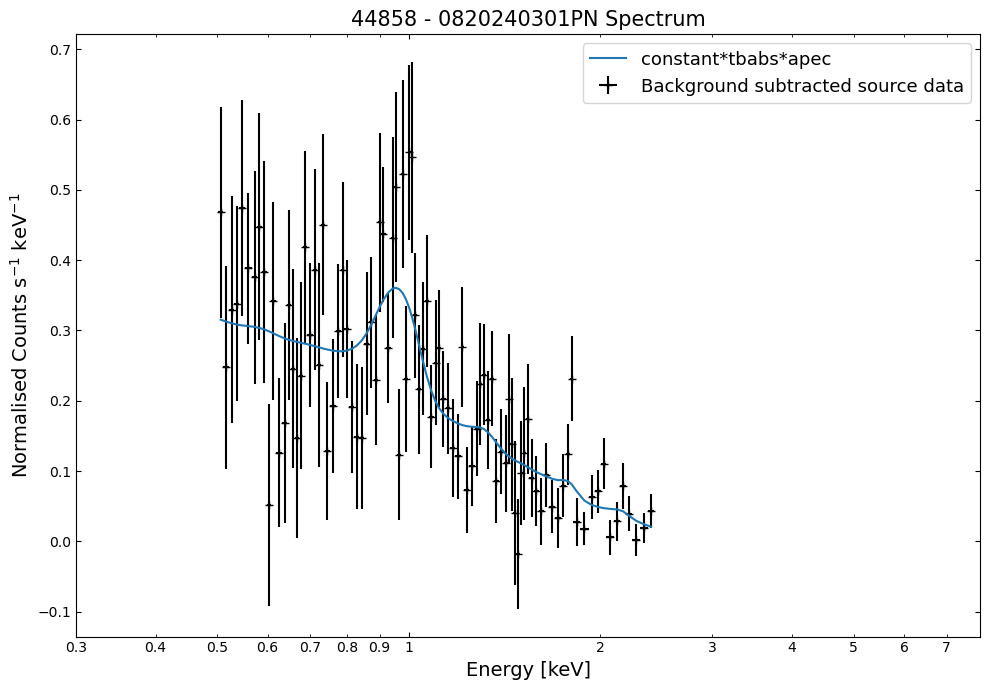

0820240301 mos1


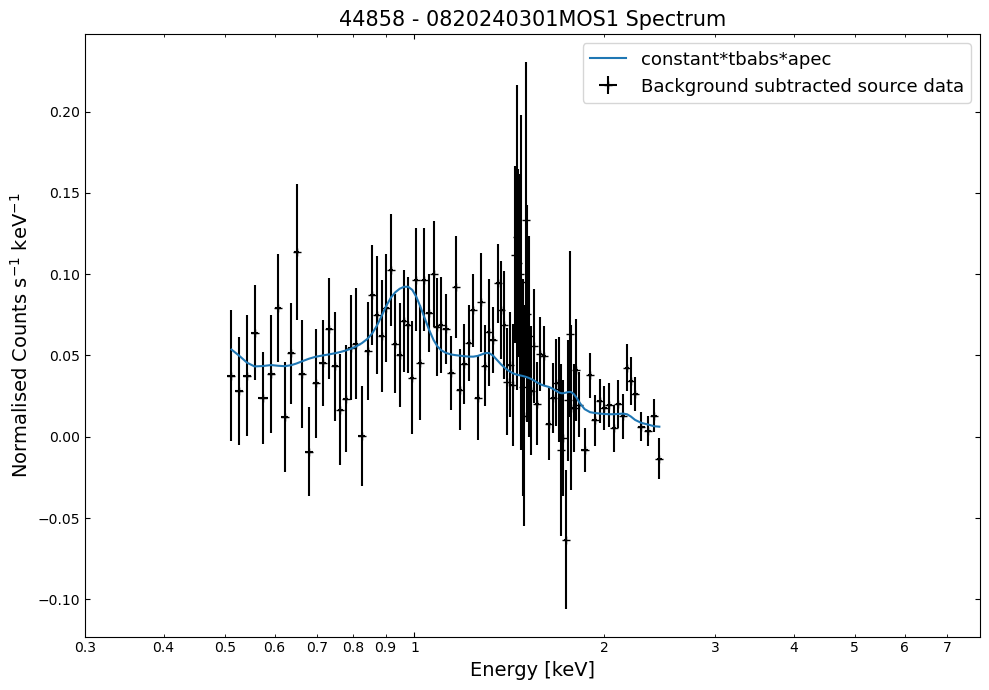

0820240301 mos2


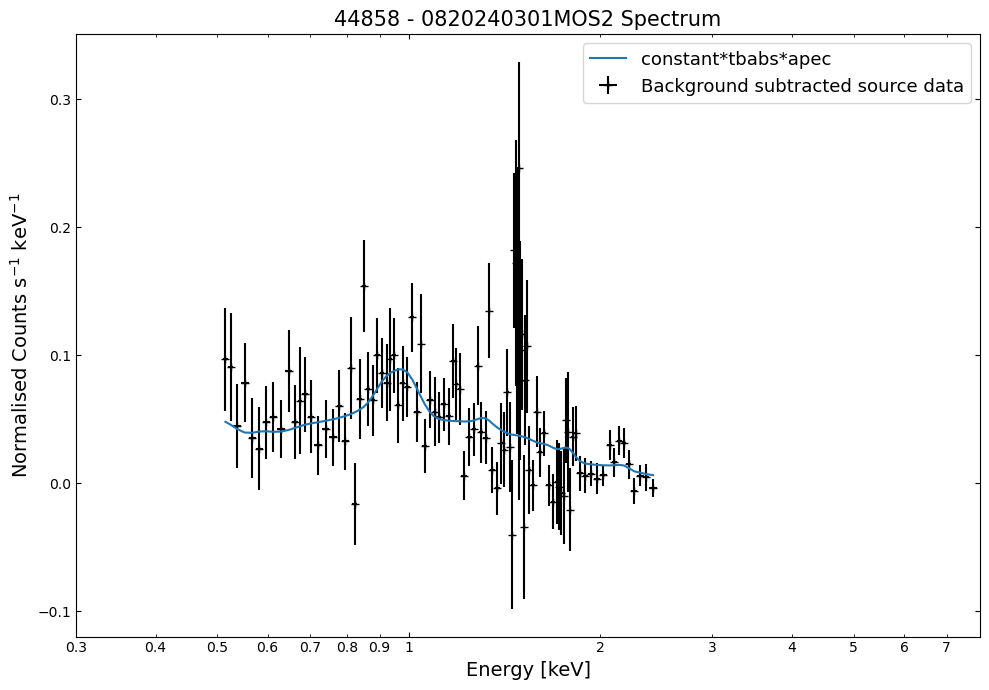





PHL1811 556.0054183274045 kpc


NoProductAvailableError: Cannot find any spectra matching your input.

In [15]:
for src in srcs_metfree:
    print(src.name, src.r500)
    for sp in src.get_spectra(src.r500, min_counts=25):
        print(sp.obs_id, sp.instrument)
        sp.view()
    print('\n\n\n')

#### $R_{2500}$

25124 362.8436658562029 kpc
0900700101 pn


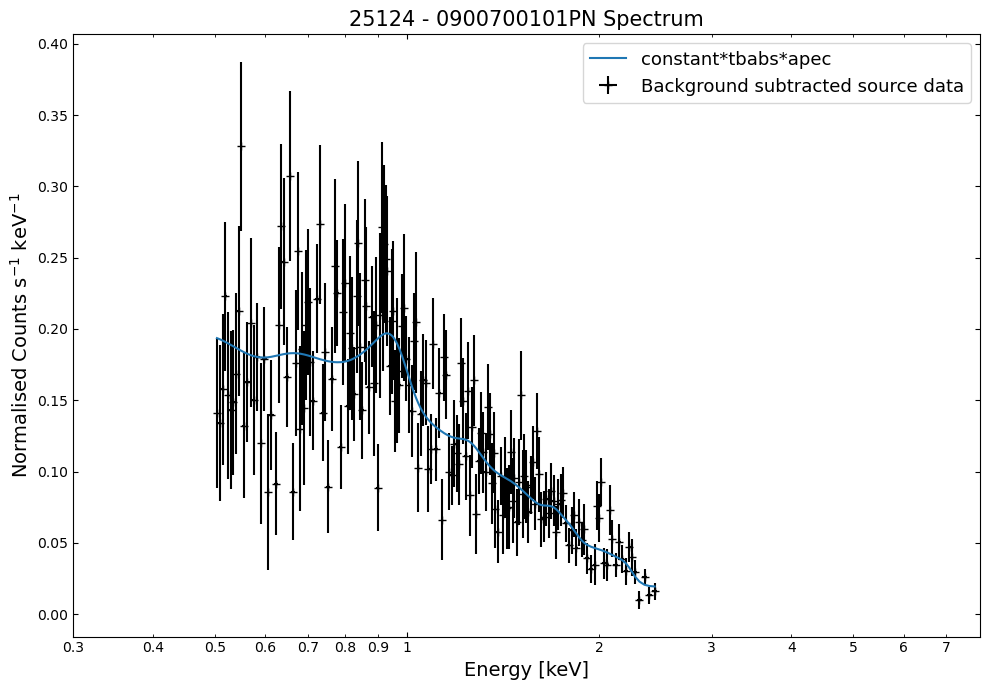

0900700101 mos2


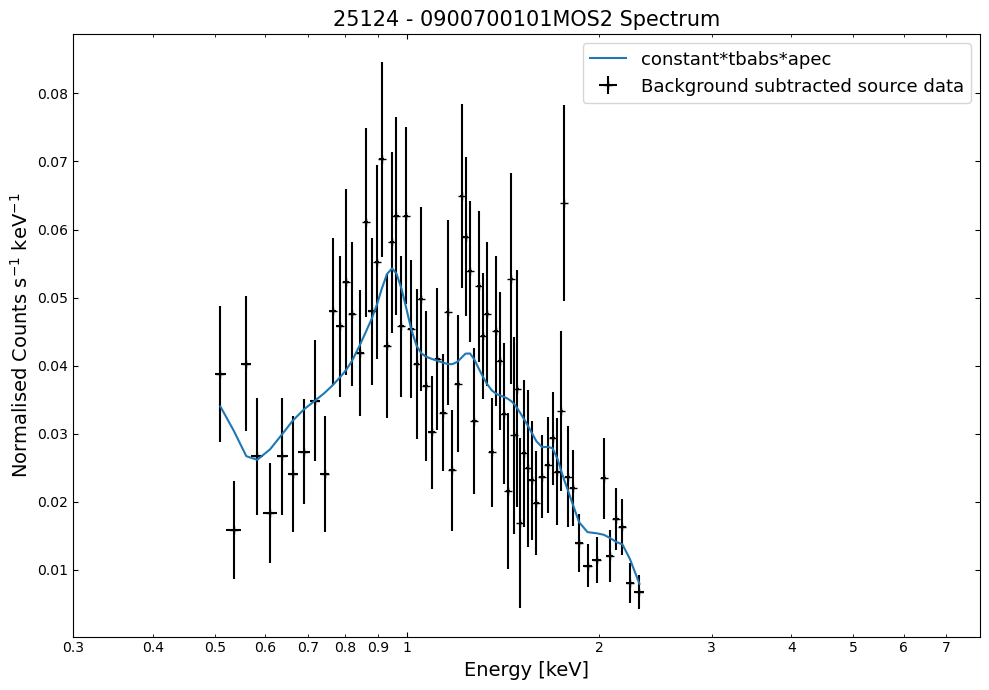





44739 207.70097216558273 kpc
0900700201 pn


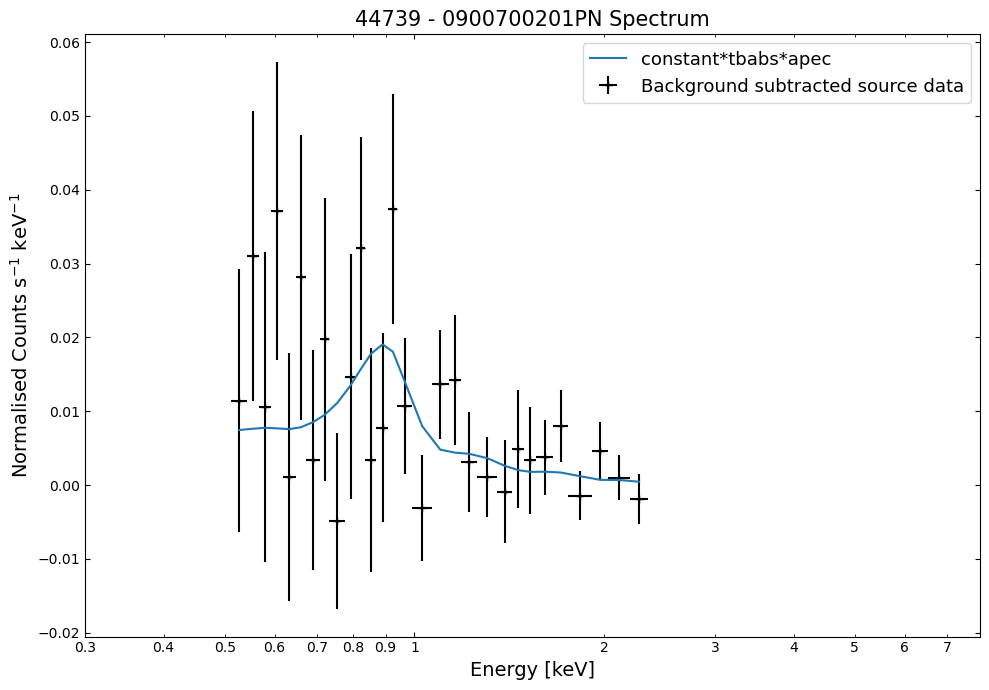

0900700201 mos1


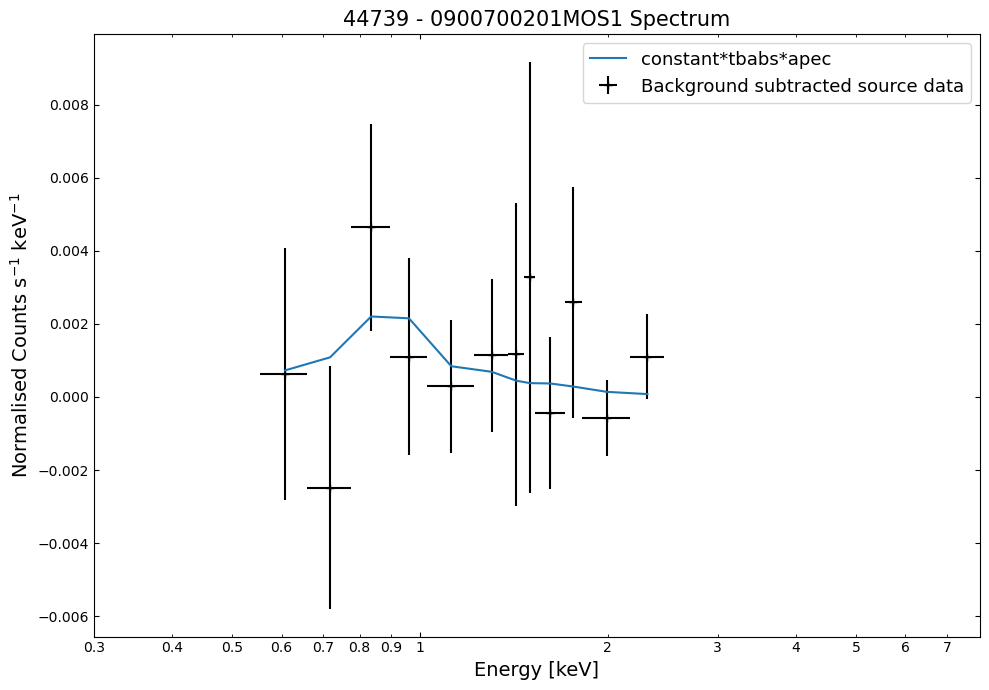

0900700201 mos2


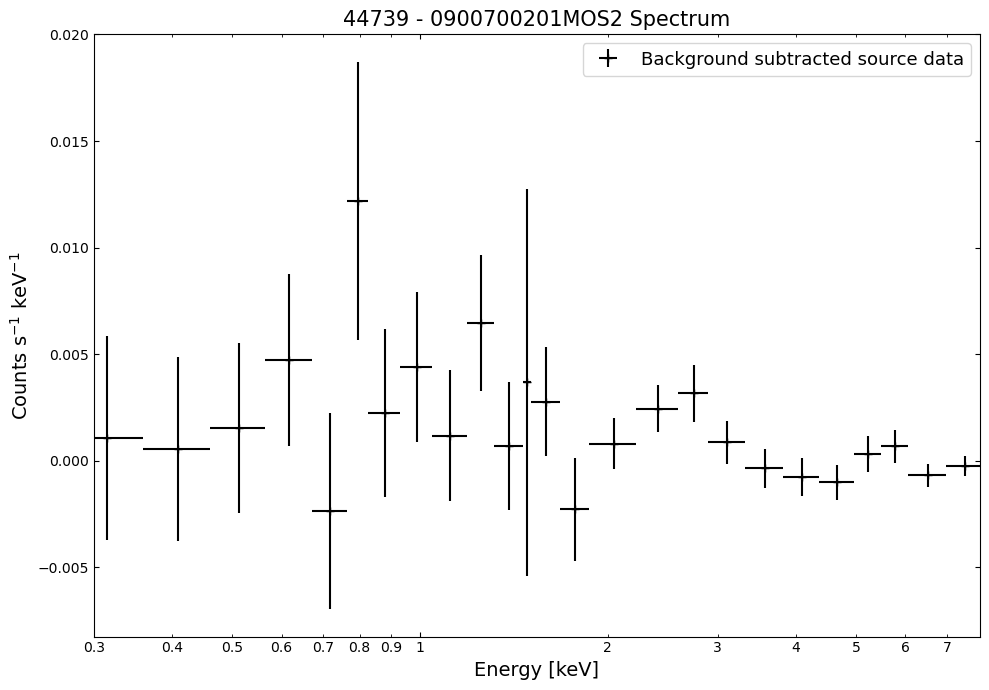





19670B 285.37153640449975 kpc
0861080101 pn


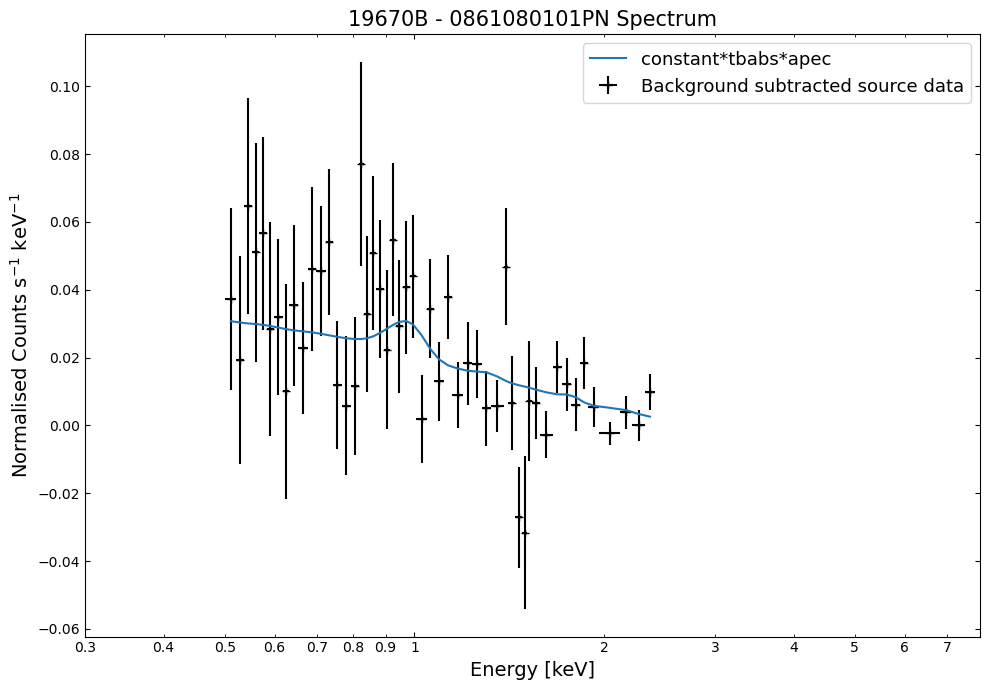

0861080101 mos1


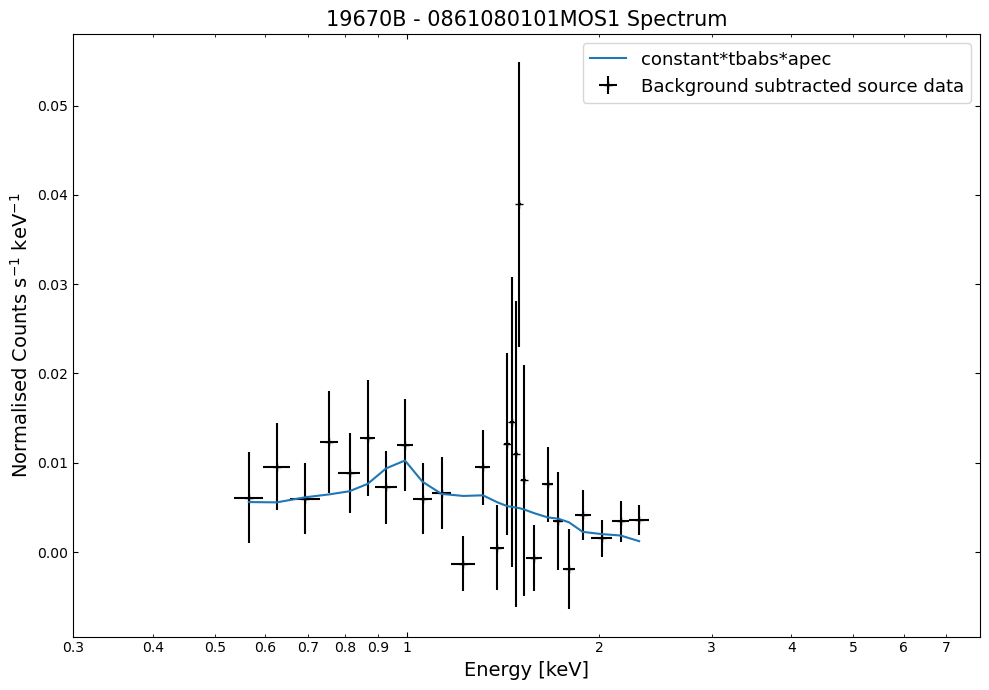

0861080101 mos2


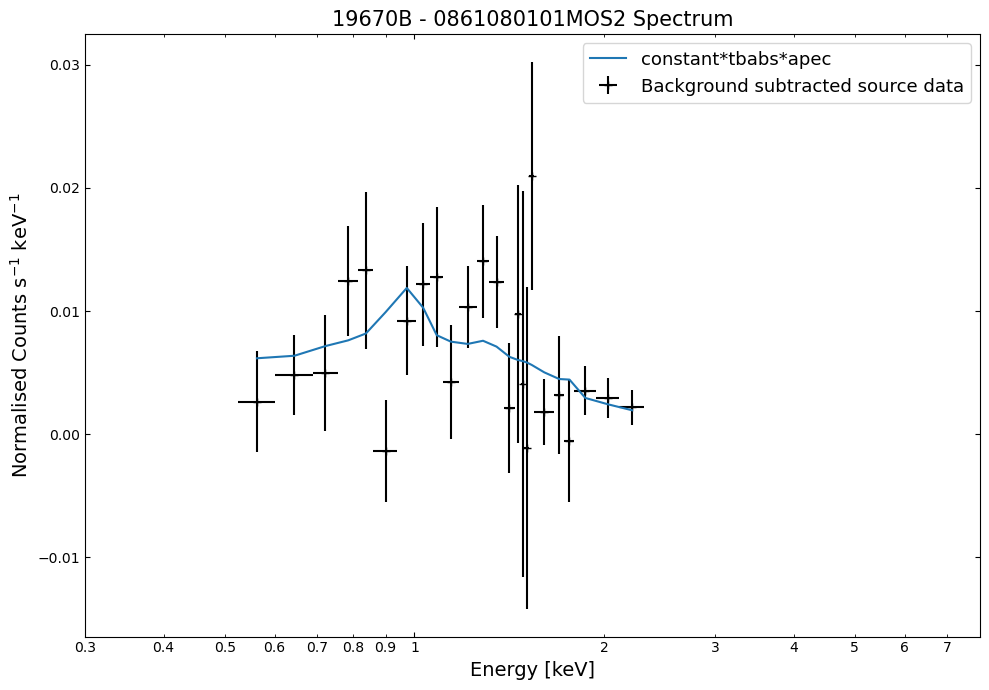





12833 219.74042159794118 kpc
0861080201 pn


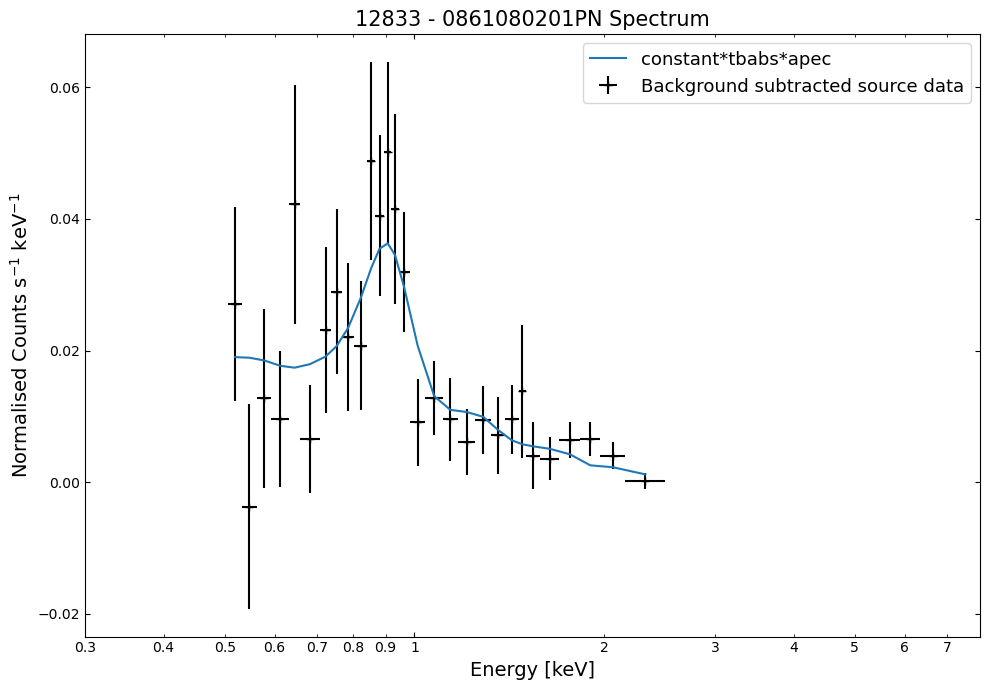

0861080201 mos1


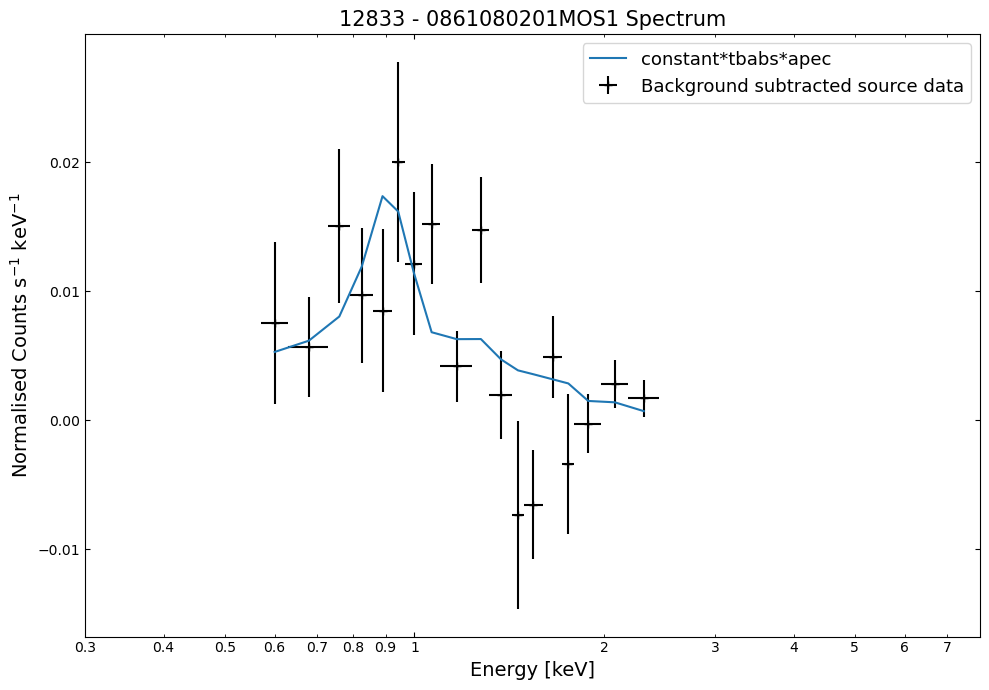

0861080201 mos2


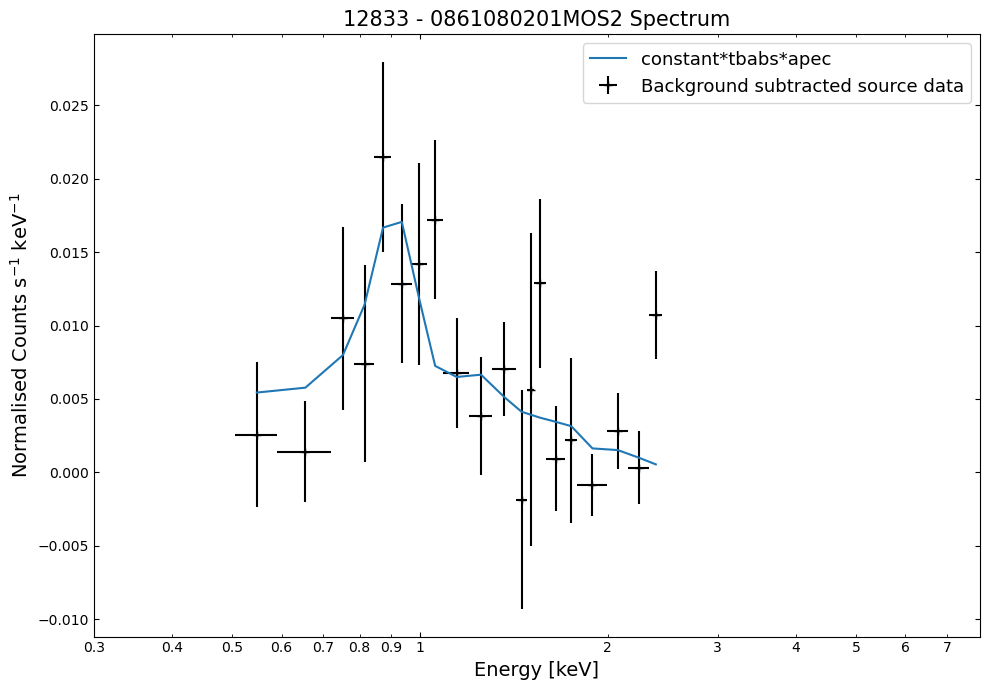





44858 291.9777429845589 kpc
0820240301 pn


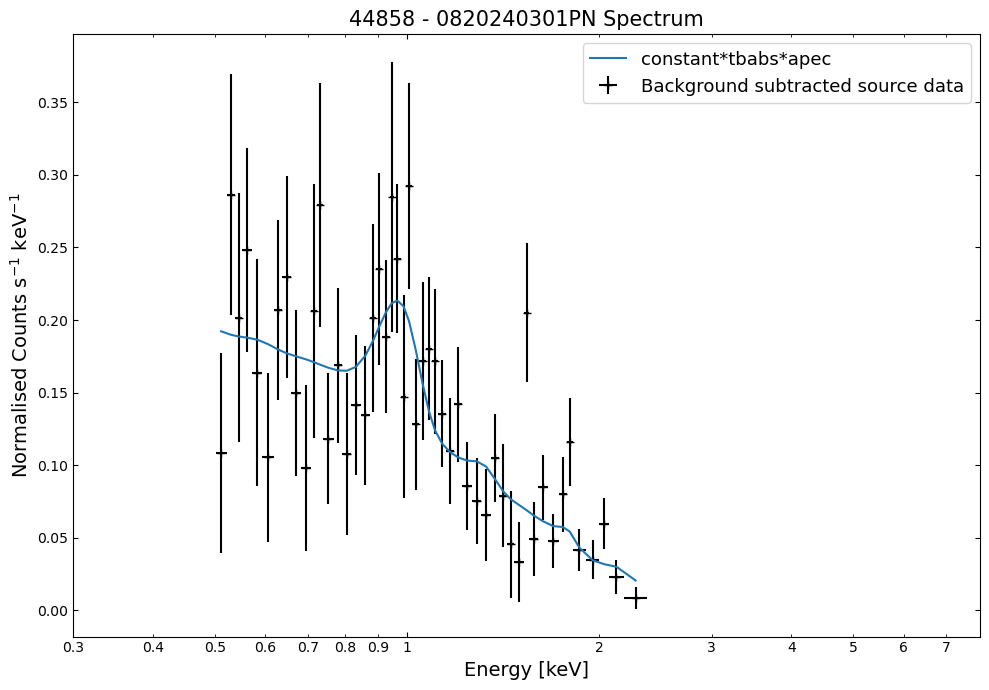

0820240301 mos1


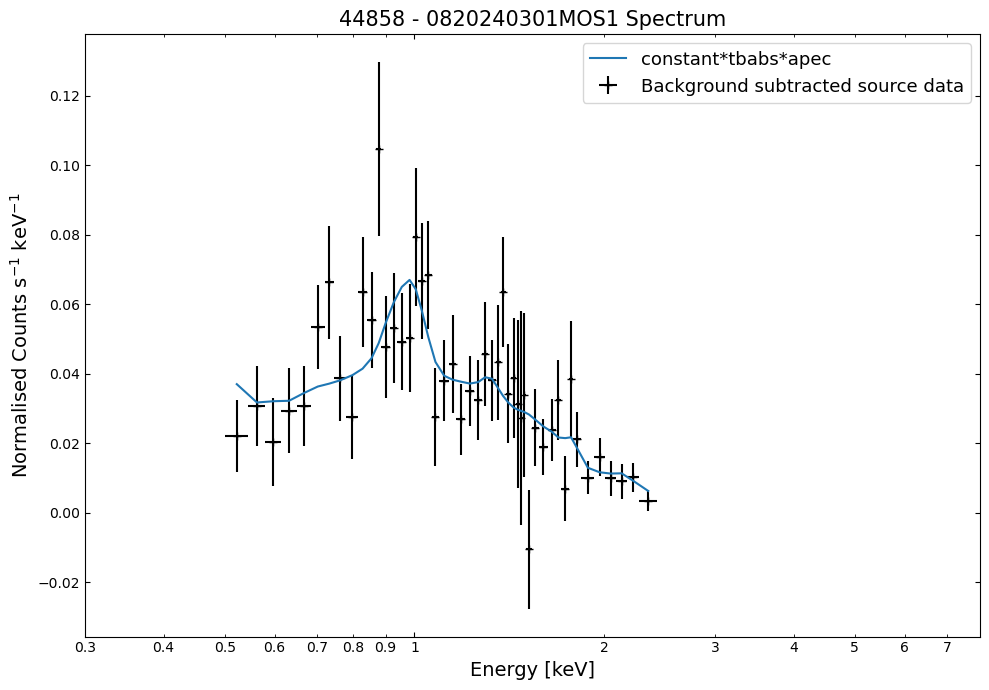

0820240301 mos2


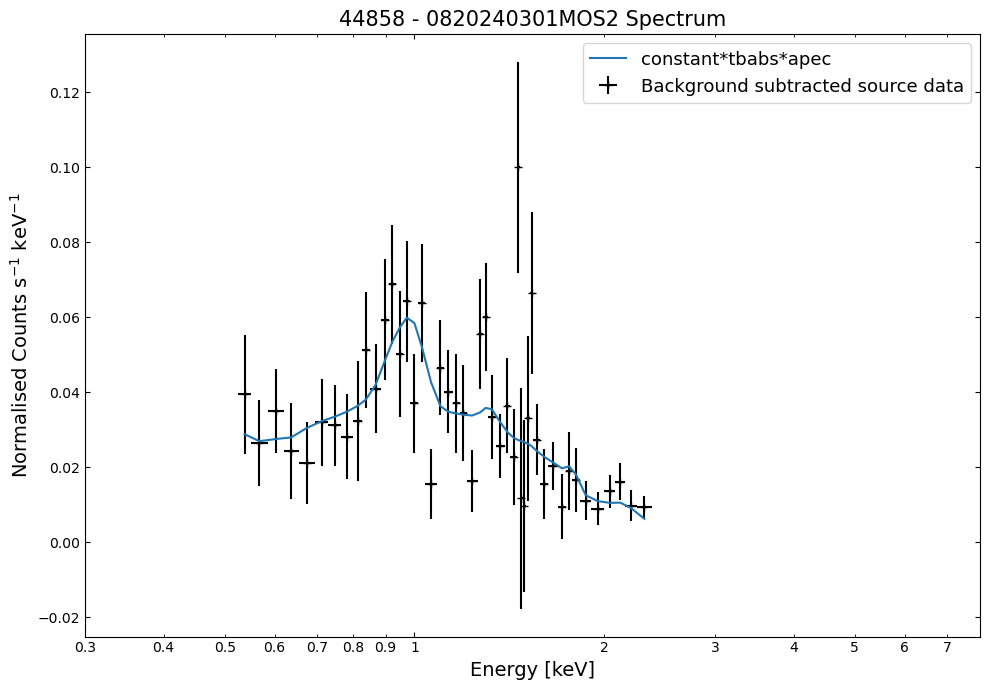





PHL1811 256.96028557485727 kpc
0204310101 mos1


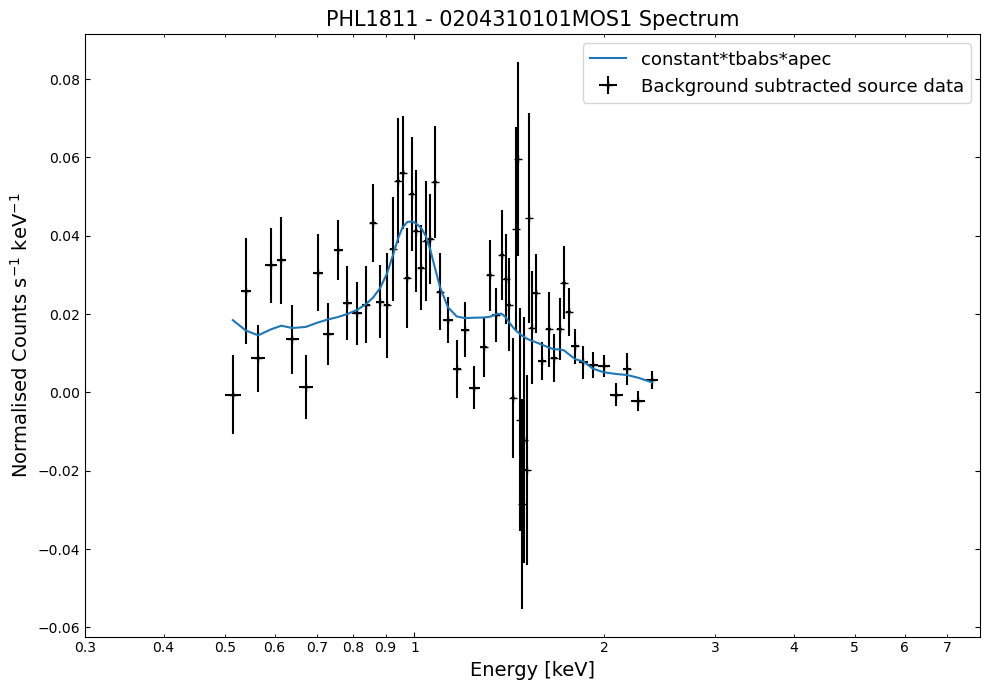

0204310101 mos2


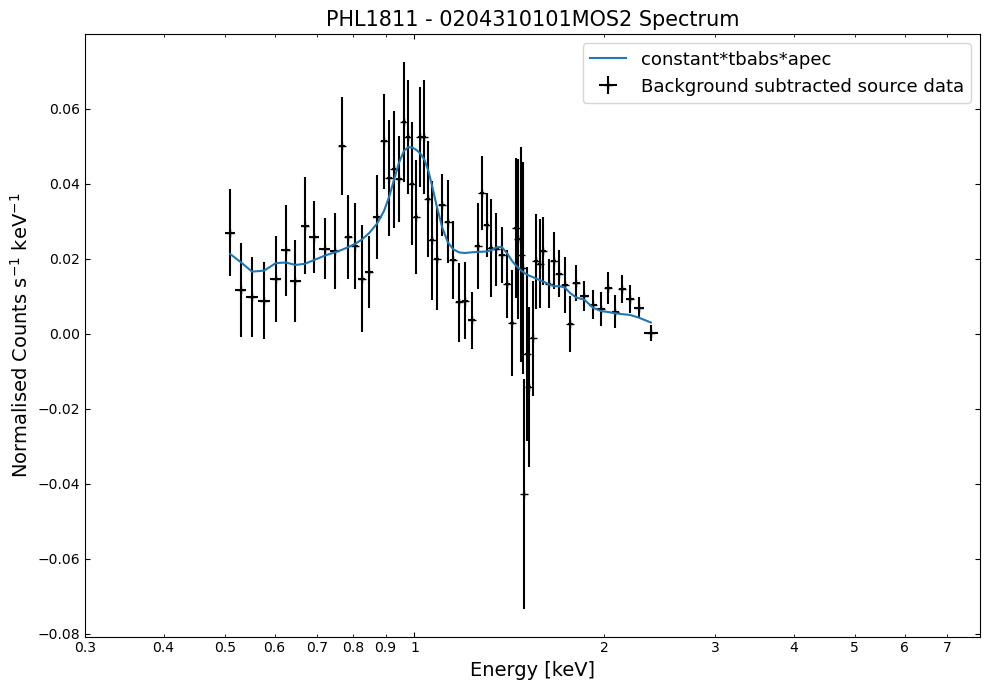

0761910201 mos2


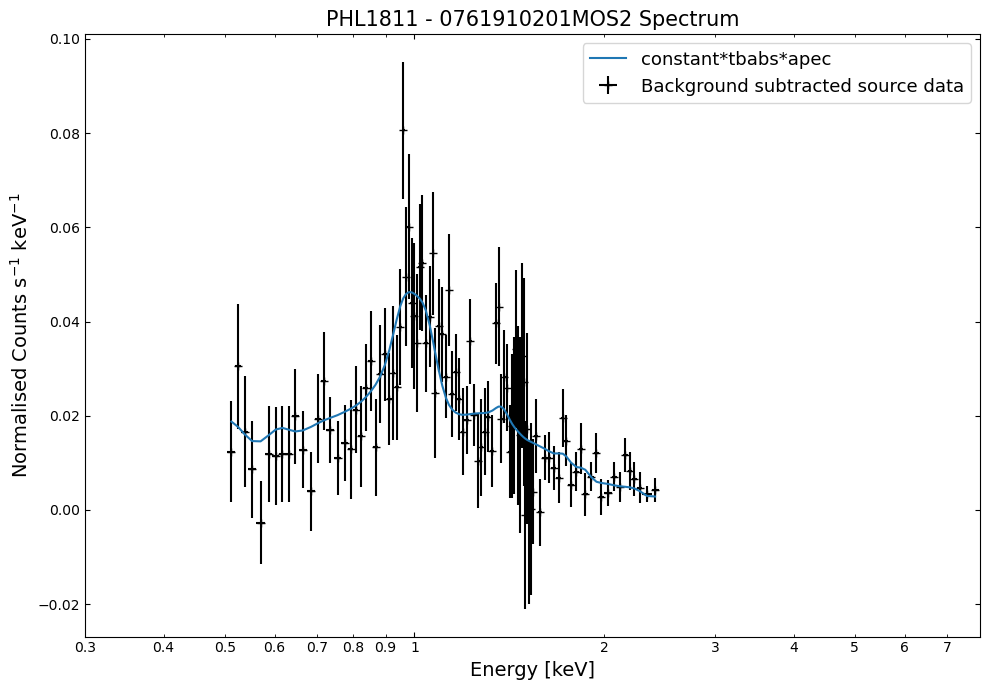





50433 199.07385688222627 kpc
0102040301 pn


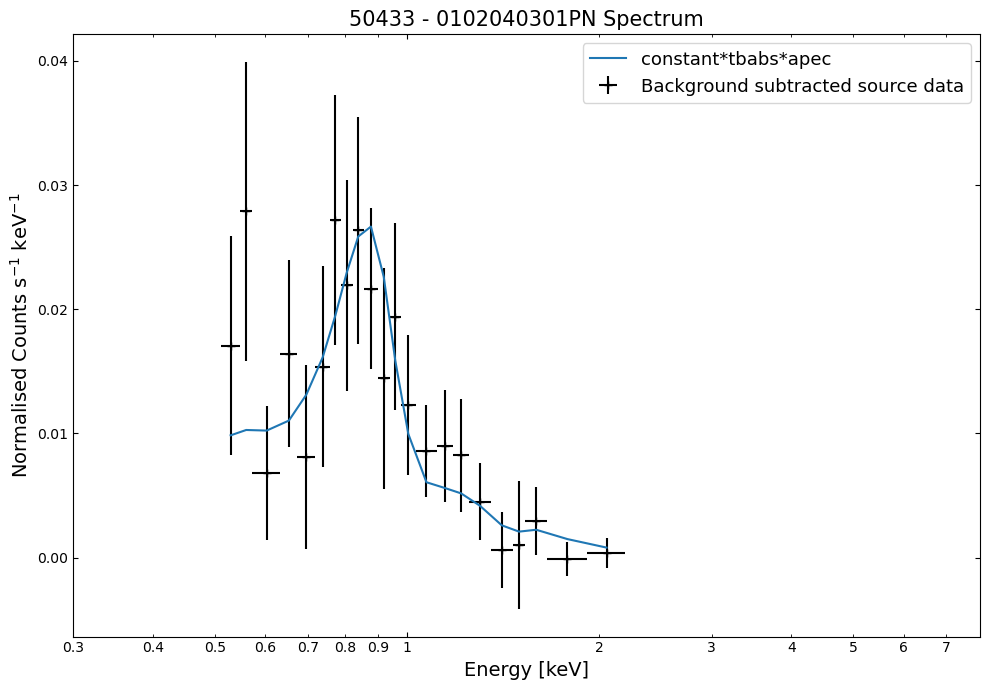

0102040301 mos1


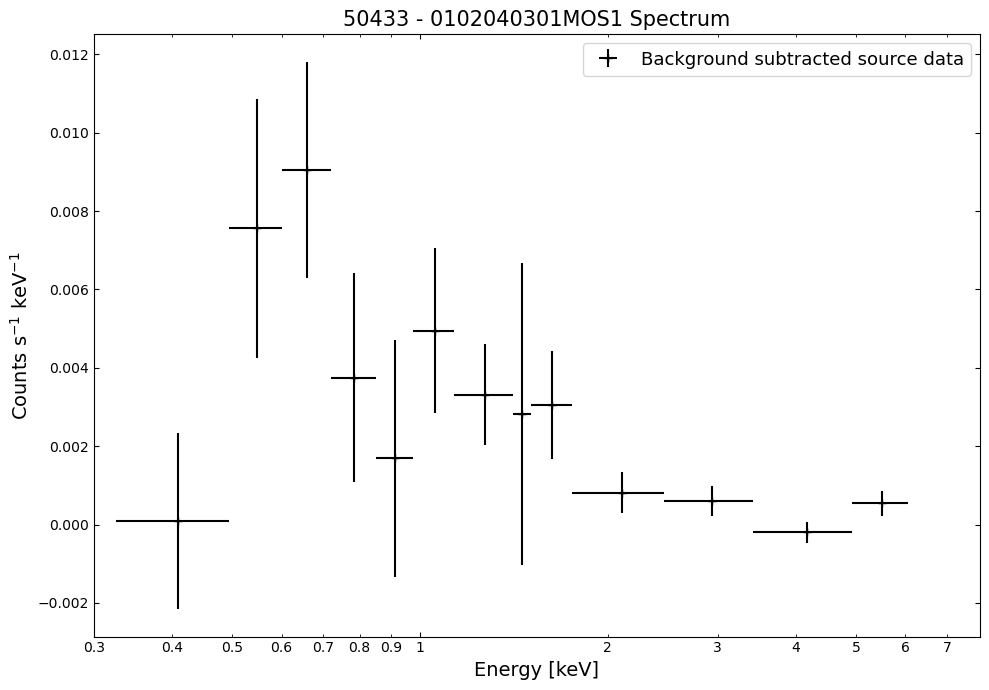

0102040301 mos2


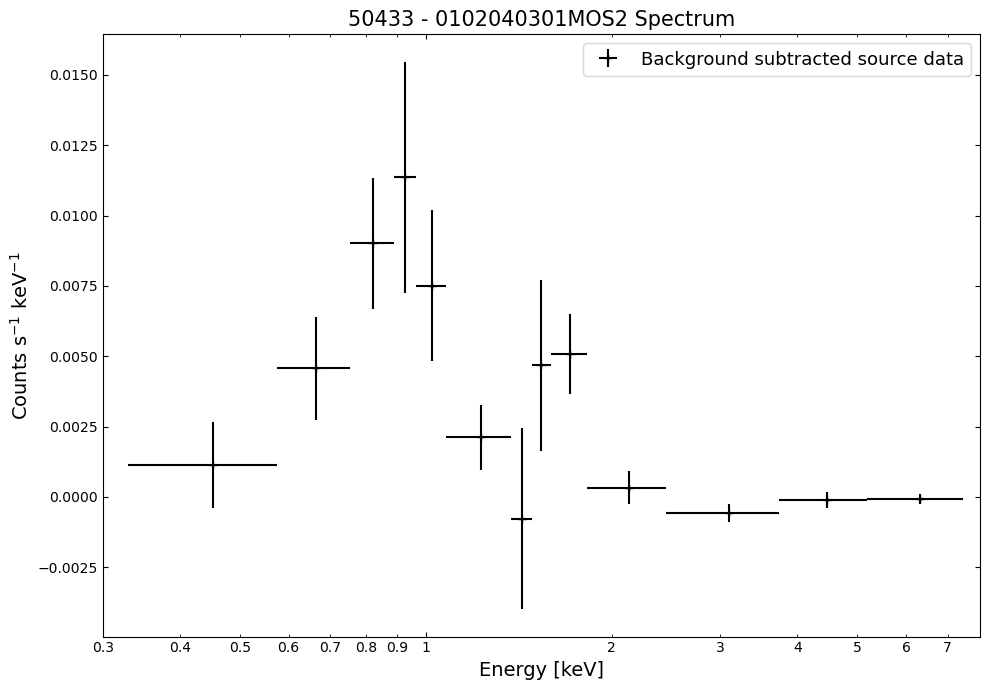

In [16]:
for src in srcs_r2500:
    print(src.name, src.r2500)
    for sp in src.get_spectra(src.r2500, min_counts=25):
        print(sp.obs_id, sp.instrument)
        sp.view()
    print('\n\n\n')

#### $R_{2500}$ - with metallicity free

25124 367.8149845350814 kpc
0900700101 pn


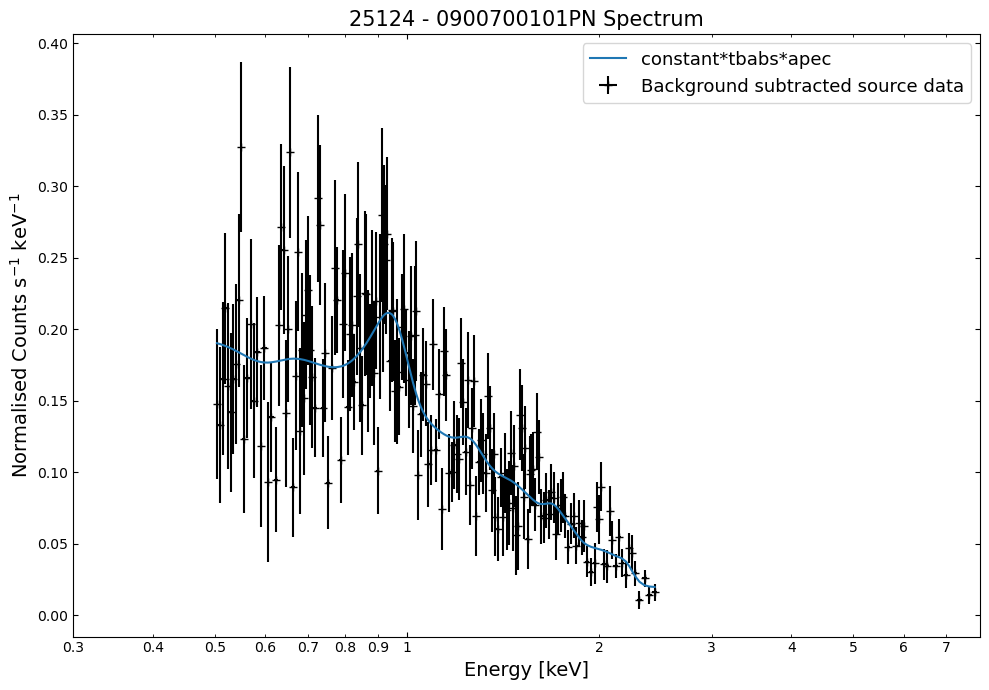

0900700101 mos2


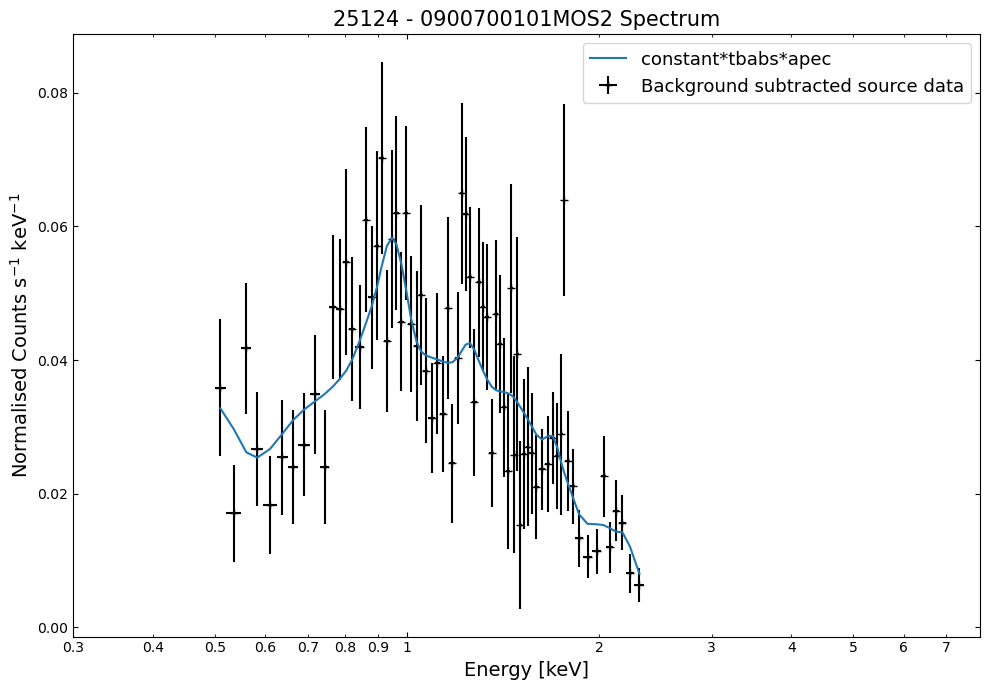





44739 205.1604537849048 kpc
0900700201 pn


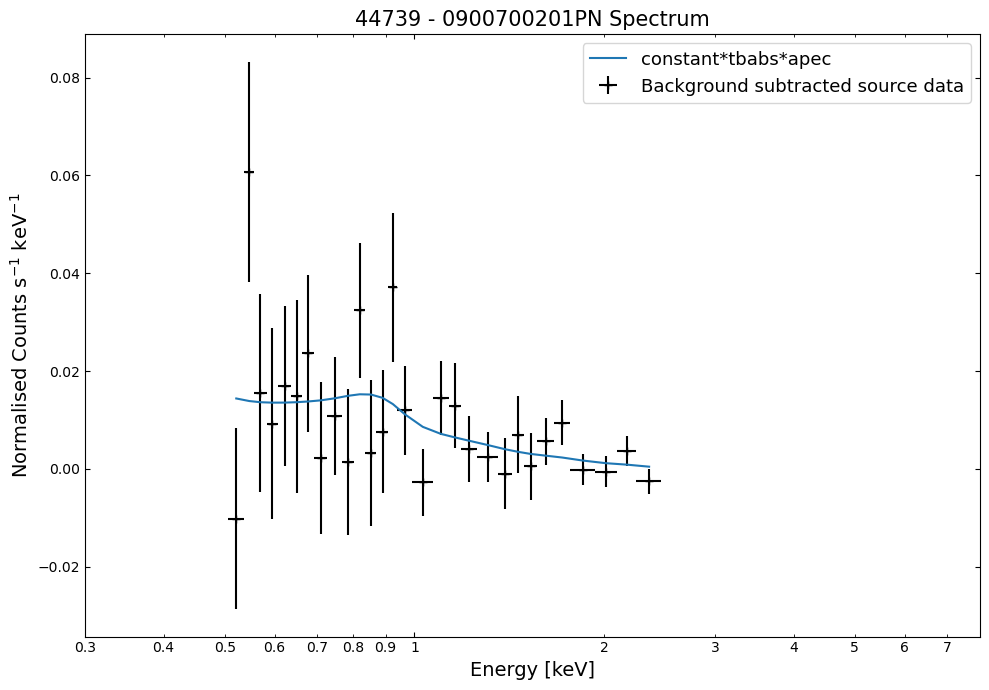

0900700201 mos1


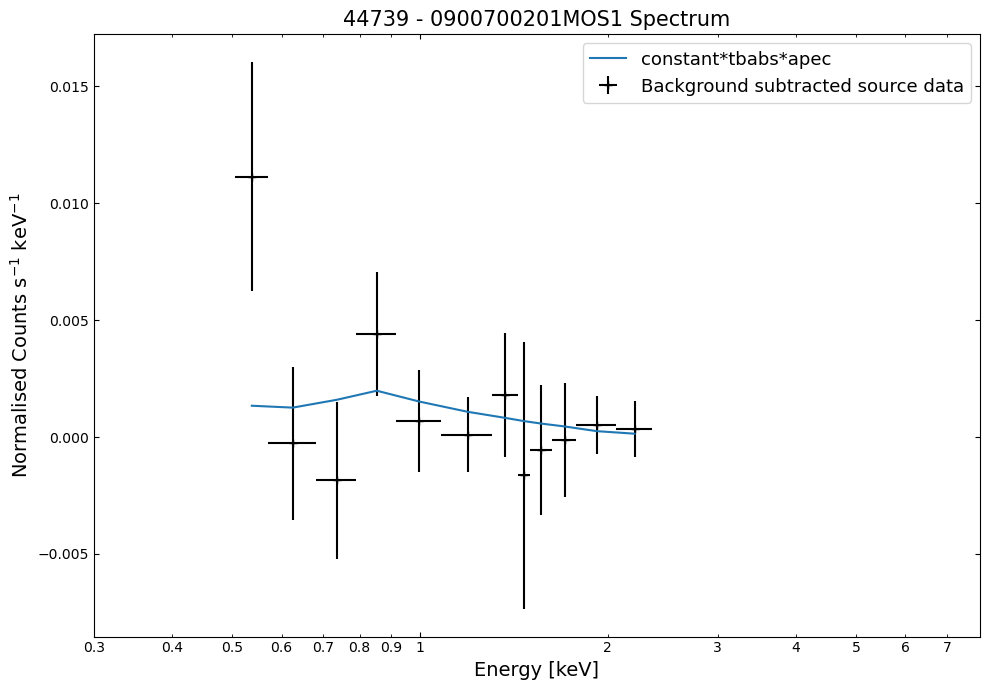

0900700201 mos2


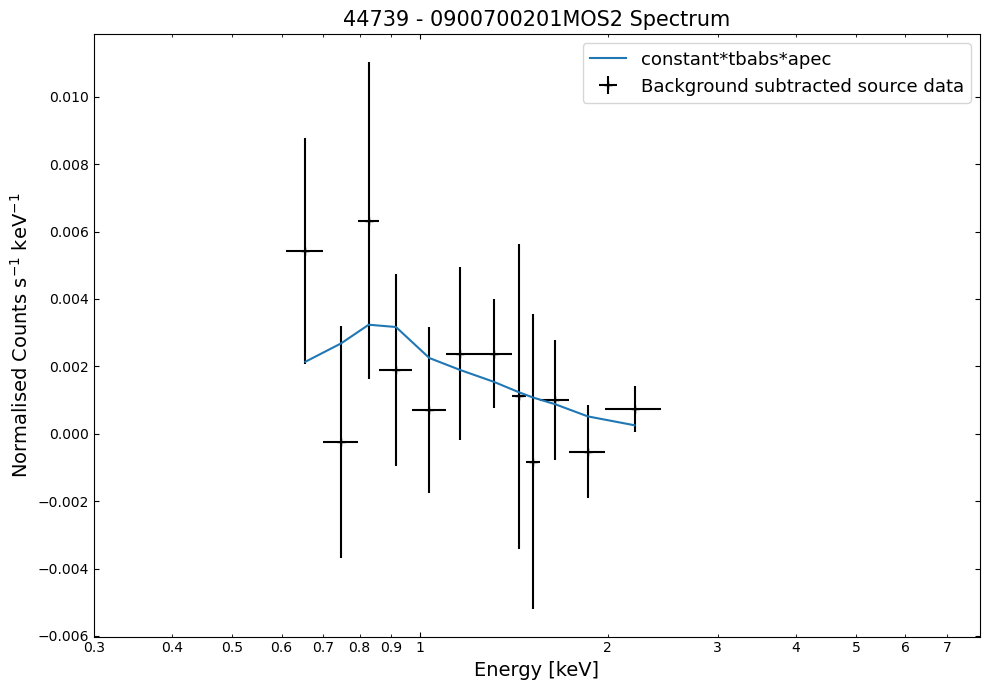





19670B 223.0535881440203 kpc
0861080101 pn


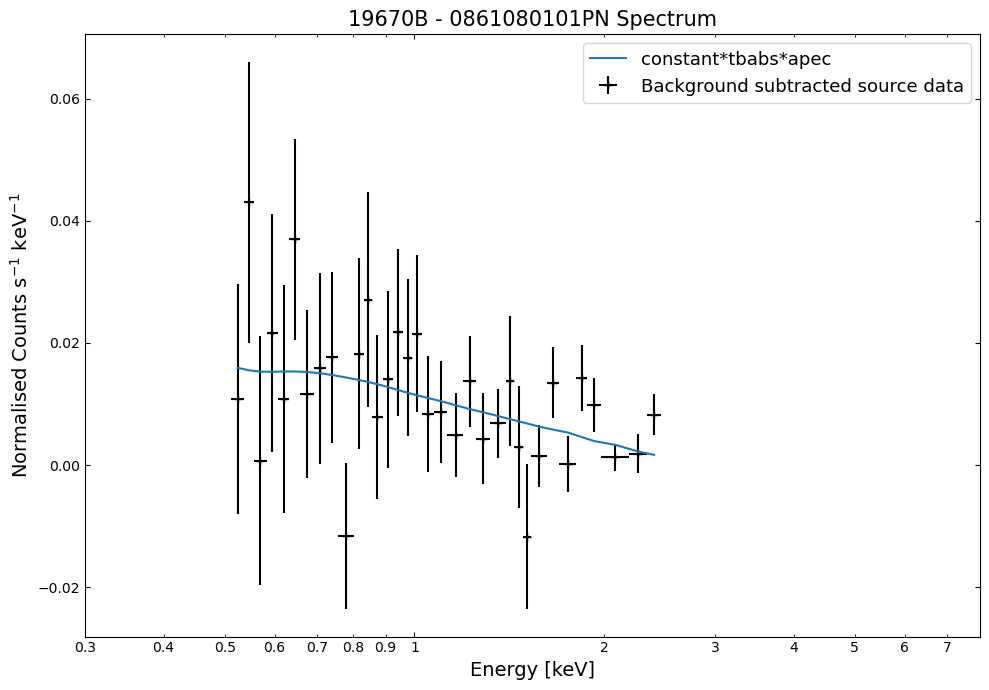

0861080101 mos1


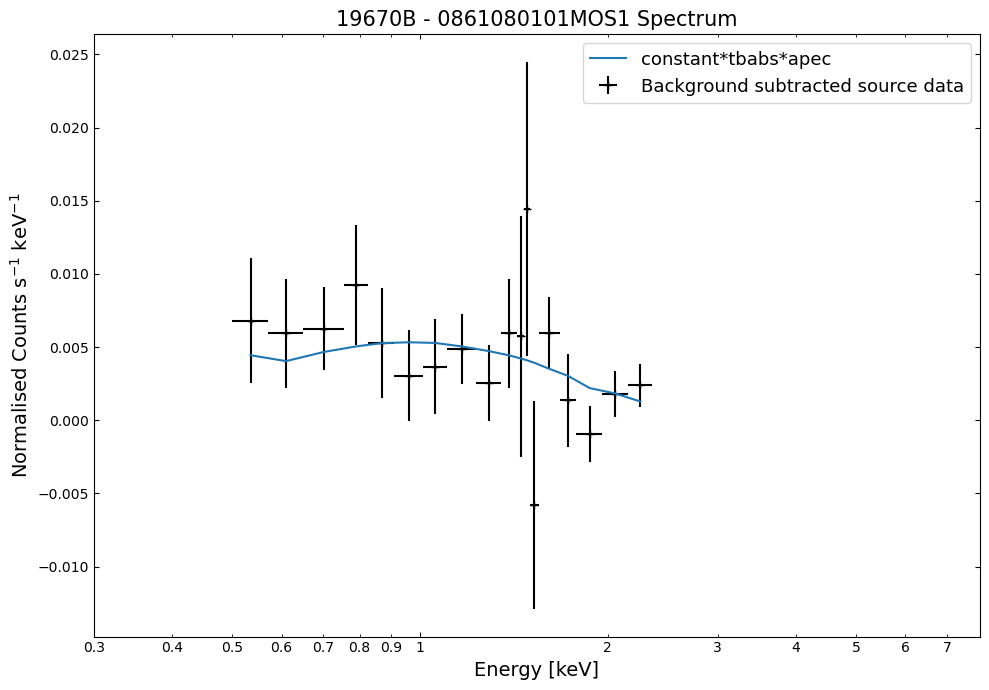

0861080101 mos2


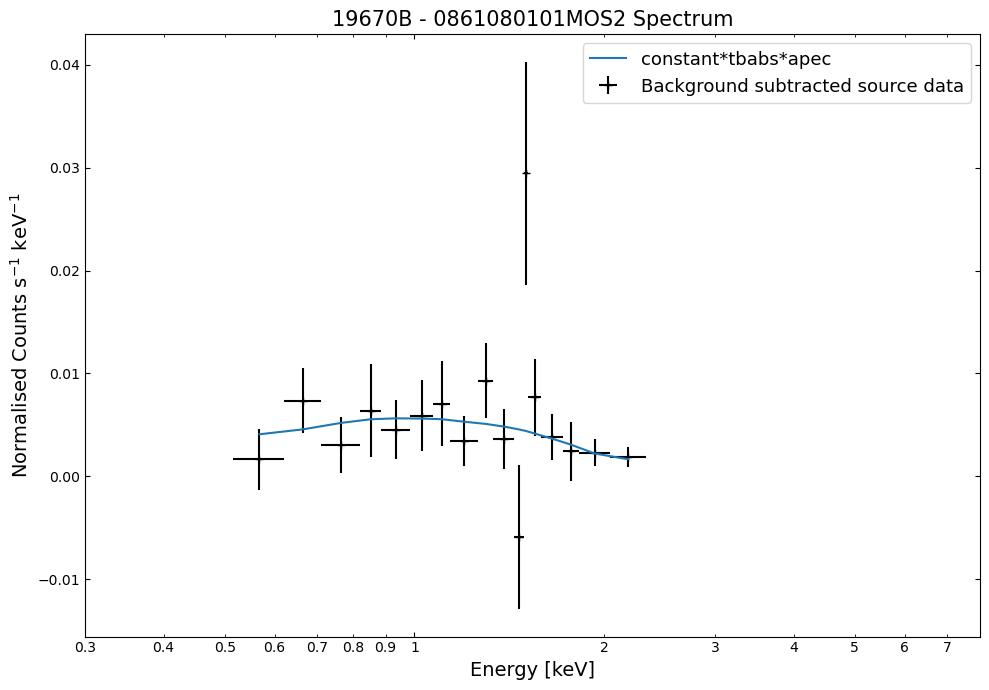





12833 225.11591926863375 kpc
0861080201 pn


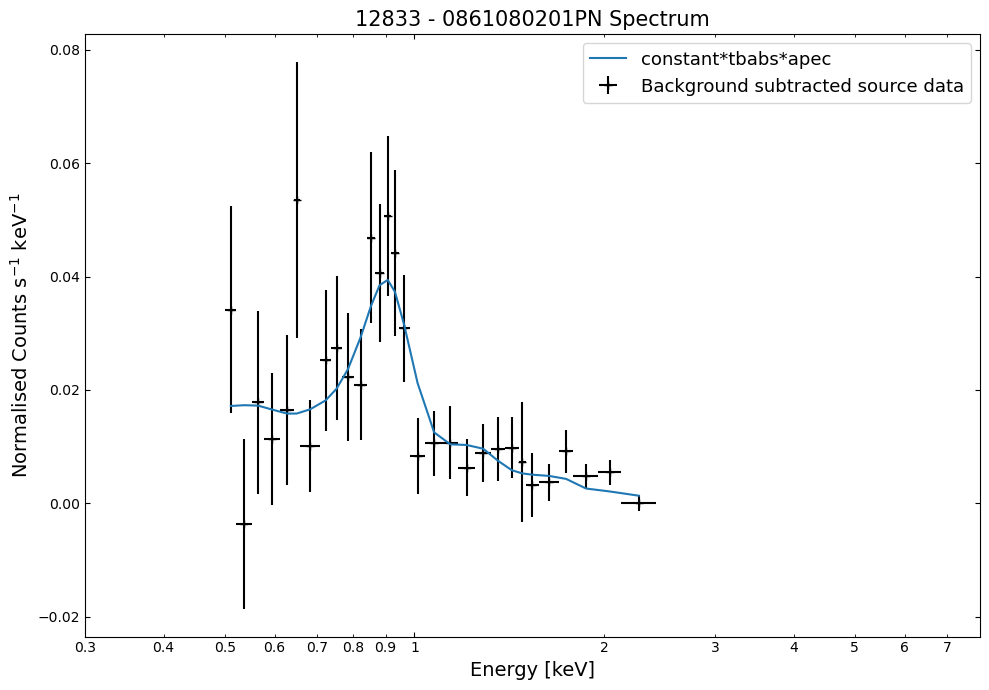

0861080201 mos1


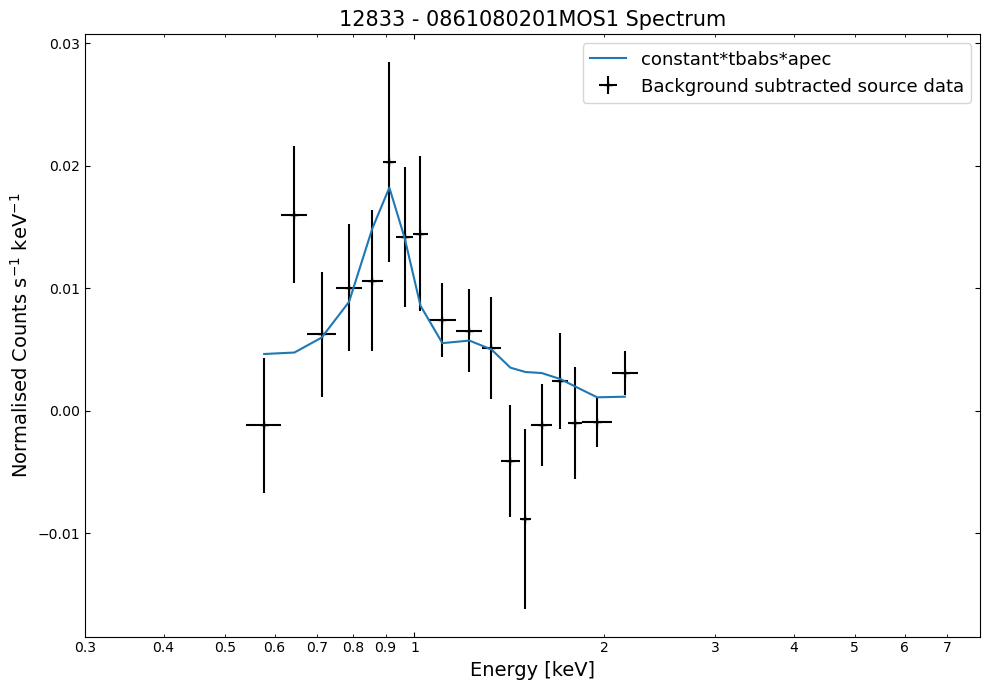

0861080201 mos2


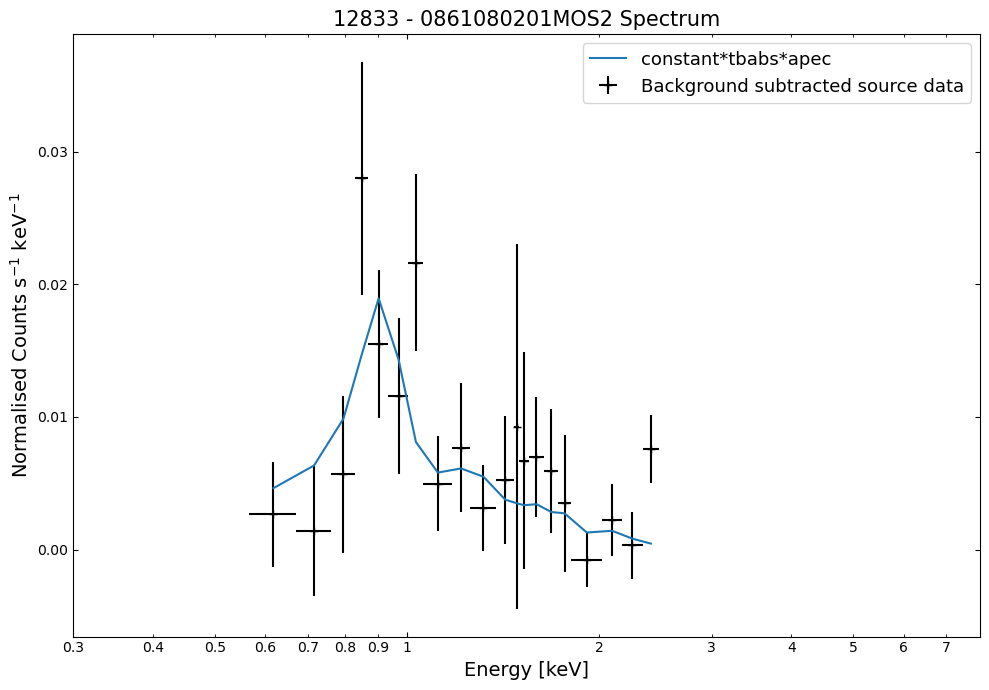





44858 285.17711666222067 kpc
0820240301 pn


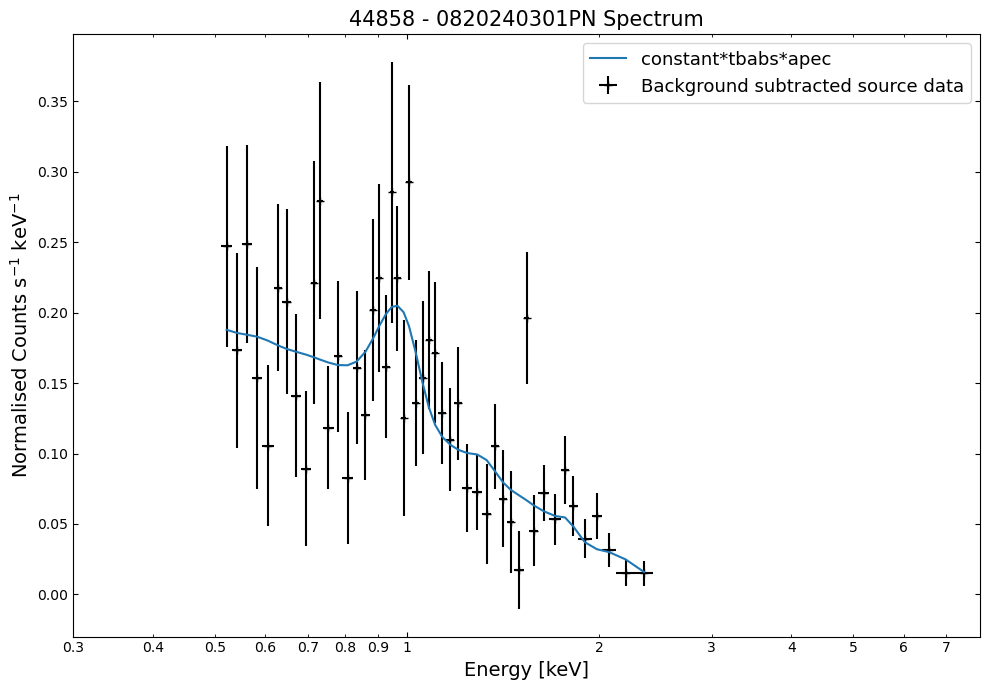

0820240301 mos1


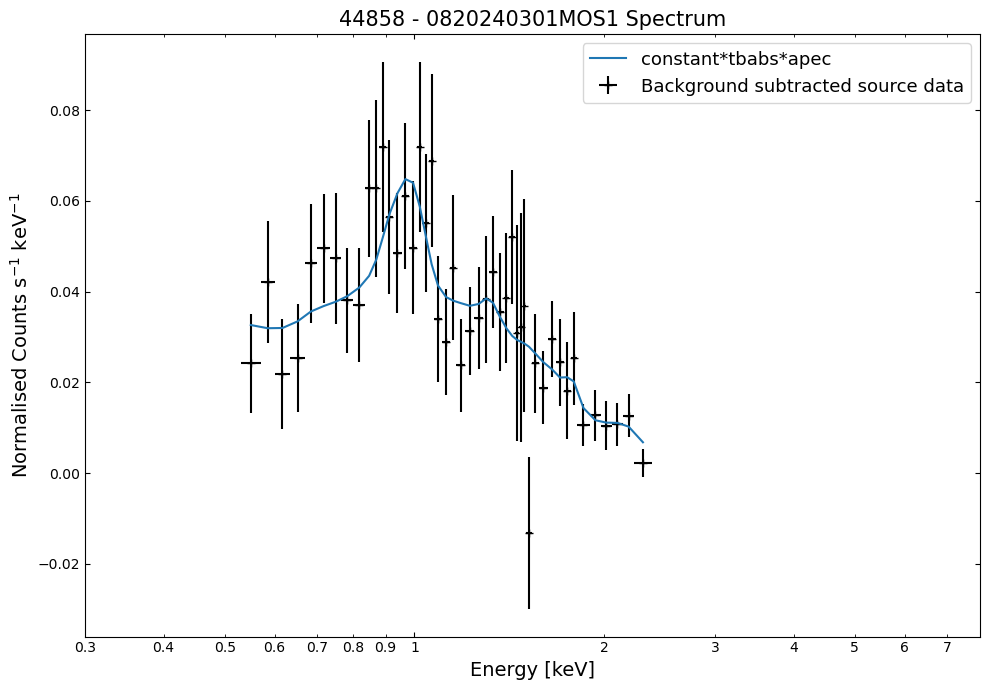

0820240301 mos2


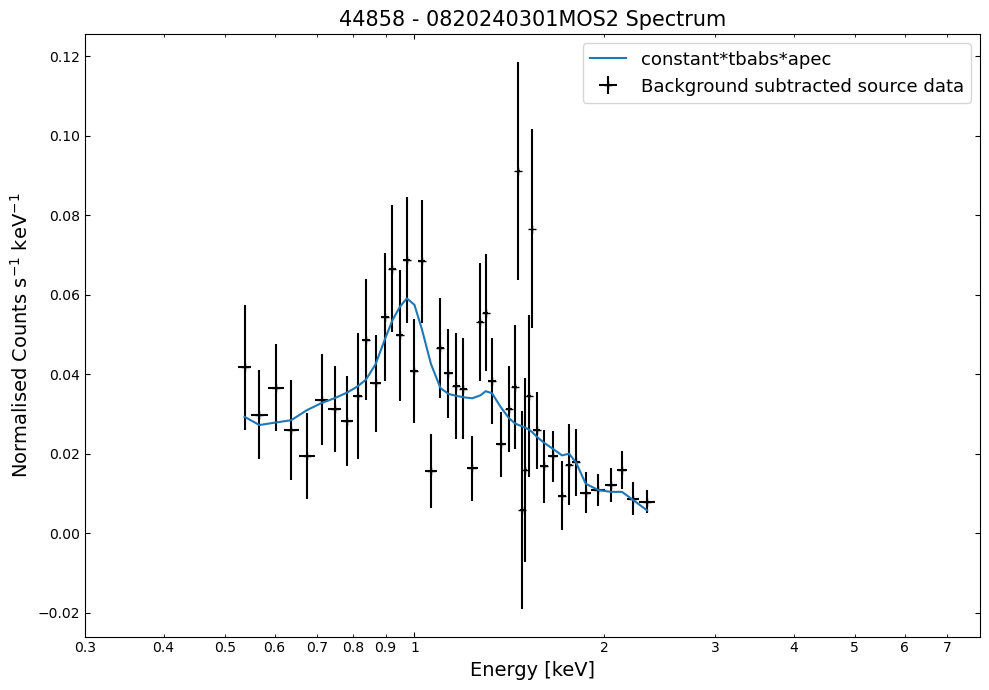





PHL1811 262.8565062867693 kpc
0204310101 mos1


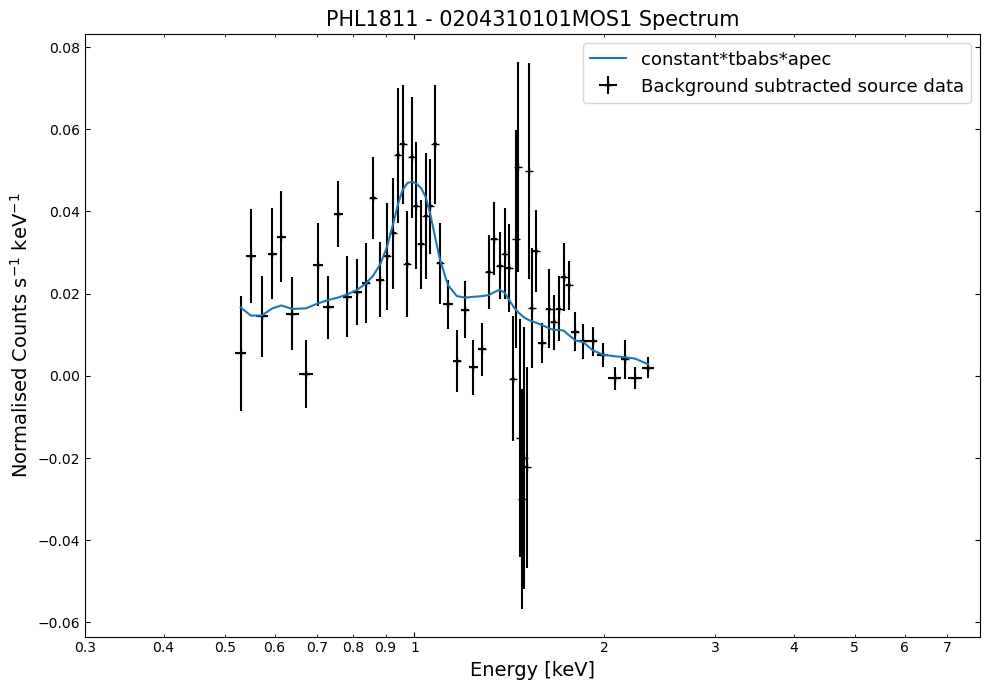

0204310101 mos2


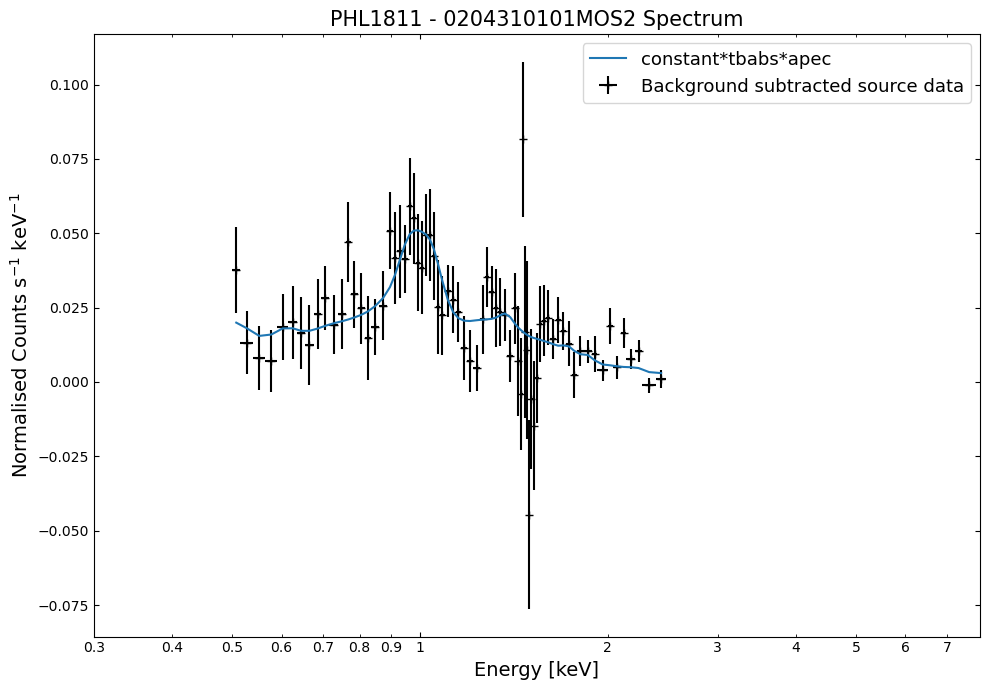

0761910201 mos2


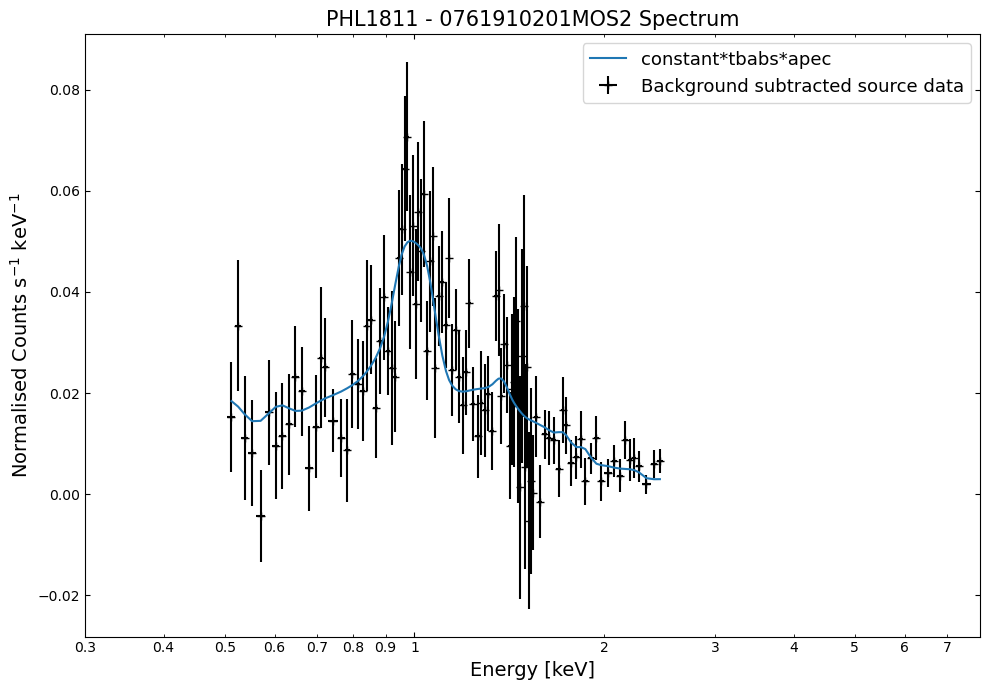





50433 194.43668266781555 kpc
0102040301 pn


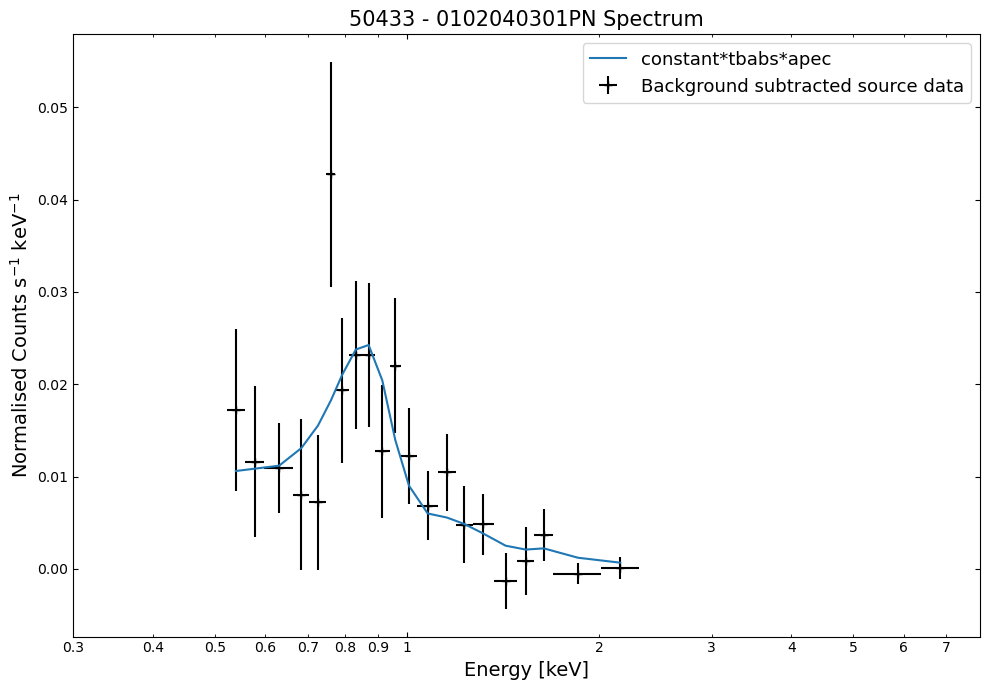

0102040301 mos1


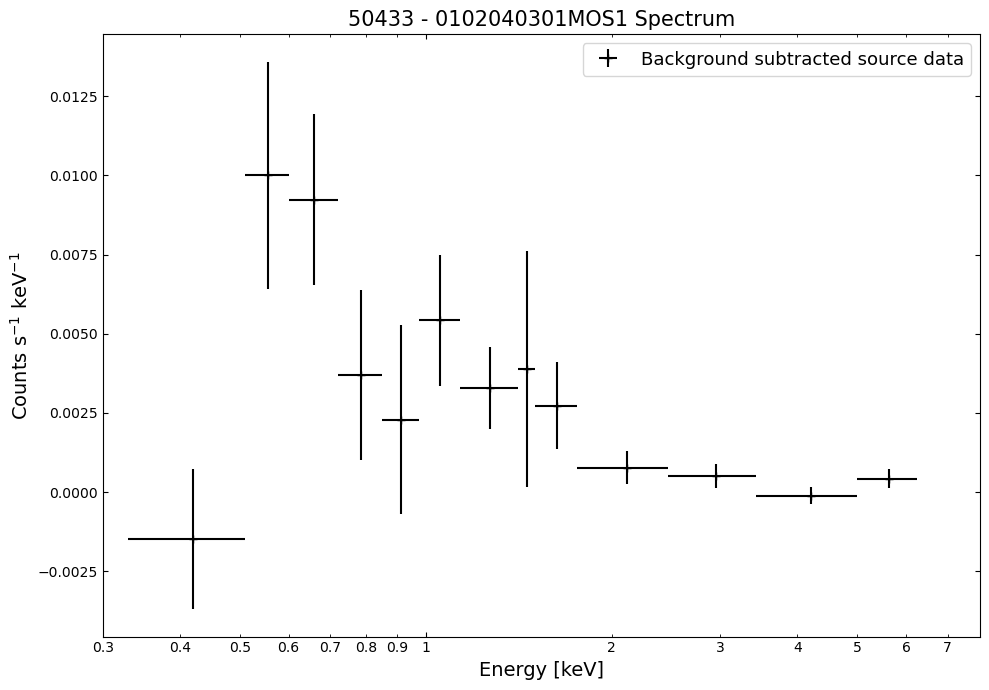

0102040301 mos2


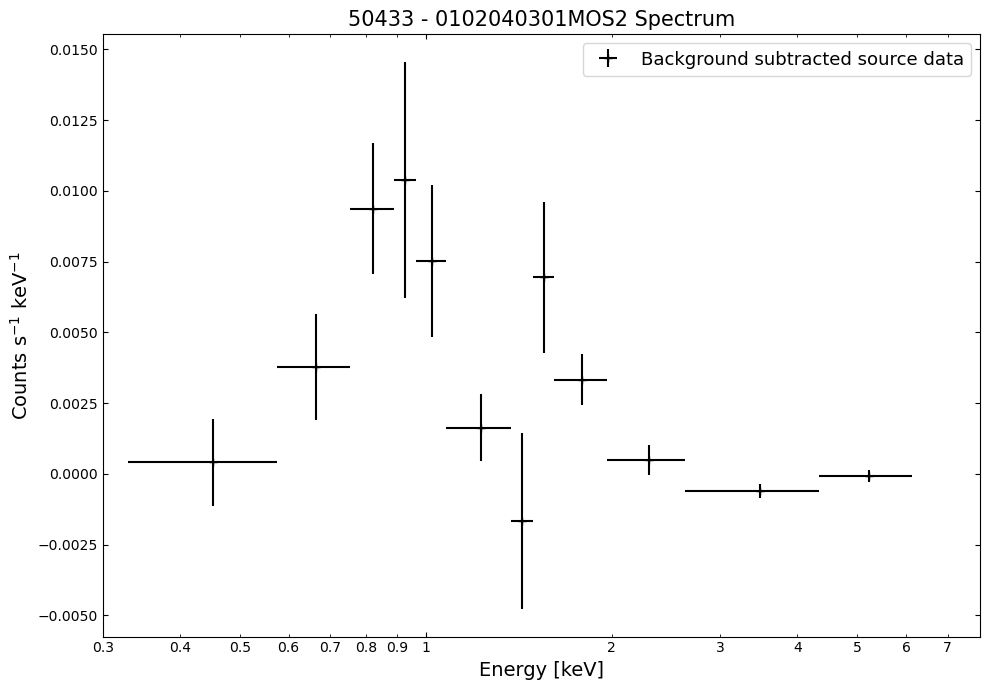

In [17]:
for src in srcs_r2500_metfree:
    print(src.name, src.r2500)
    for sp in src.get_spectra(src.r2500, min_counts=25):
        print(sp.obs_id, sp.instrument)
        sp.view()
    print('\n\n\n')

## Running the pipeline in frozen-temperature mode

Thus far we have run the XGA LTR pipeline in standard mode, but we can also run it in 'frozen temperature' mode, which may work better for low signal-to-noise systems. In this mode the temperature is not allowed to vary during the spectral fit process, and is instead fixed at the start value; the start value is updated after each iteration by retrieving the 

### $R_{500}$

In [ ]:
res_file = '../../outputs/results/ltr_r500_froztemp_pipeline_results.csv'
rhist_file = '../../outputs/results/radii_r500_froztemp_history.csv'

srcs_froztemp, results_froztemp, \
    rad_hist_froztemp = luminosity_temperature_pipeline(samp, Quantity(200, 'kpc'), timeout=Quantity(4, 'hr'), 
                                                        save_samp_results_path=res_file,
                                                        save_rad_history_path=rhist_file, 
                                                        core_excised=True, lo_en=Quantity(0.5, 'keV'), 
                                                        hi_en=Quantity(2.5, 'keV'), min_counts=25,
                                                        freeze_temp=True)

/tmp/local/26681022/ipykernel_74374/2974639247.py:5: UserWarning: Core-excised temperatures will not be reported when running in frozen-temperature mode.
  rad_hist_froztemp = luminosity_temperature_pipeline(samp, Quantity(200, 'kpc'), timeout=Quantity(4, 'hr'),
Setting up Galaxy Clusters: 100%|██████████| 8/8 [00:04<00:00,  1.69it/s]
/mnt/ufs18/home-218/turne540/code/XGA/xga/samples/extended.py:246: UserWarning: Non-fatal warnings occurred during the declaration of some sources, to access them please use the suppressed_warnings property of this sample.
  self._check_source_warnings()
Running XSPEC Fits: 100%|██████████| 8/8 [00:03<00:00,  2.10it/s]
/mnt/ufs18/home-218/turne540/code/XGA/xga/products/relation.py:783: UserWarning: Some of the x values you have passed are outside the validity range of this relation (2e+42-2e+45erg / s).
  warn("Some of the x values you have passed are outside the validity range of this relation "
/mnt/ufs18/home-218/turne540/code/XGA/xga/products/relation

### $R_{2500}$

In [ ]:
res_file = '../../outputs/results/ltr_r2500_froztemp_pipeline_results.csv'
rhist_file = '../../outputs/results/radii_r2500_froztemp_history.csv'

srcs_r2500_froztemp, results_r2500_froztemp, \
    rad_hist_r2500_froztemp = luminosity_temperature_pipeline(samp, Quantity(200, 'kpc'), 
                                                              timeout=Quantity(4, 'hr'), 
                                                              save_samp_results_path=res_file,
                                                              save_rad_history_path=rhist_file, 
                                                              core_excised=True, lo_en=Quantity(0.5, 'keV'), 
                                                              hi_en=Quantity(2.5, 'keV'), min_counts=25,
                                                              freeze_temp=True, rad_temp_rel=arnaud_r2500, 
                                                              temp_lum_rel=xcs_sdss_r2500_52_TL)

## Pipeline results

We take a look at the tables of results output by the pipeline runs:

### $R_{500}$

In [11]:
results

name          ra        dec  redshift        r500    Tx500    Tx500-   
0    25124  243.629055  26.730240     0.186  894.328175  4.09508  0.336509  \
1    44739  229.793620  28.331750     0.118  420.327709  1.01750  0.070825   
2   19670A  150.256710  50.793942     0.134  471.746417  1.19978  0.119322   
3   19670B  150.214920  50.805014     0.134  535.987637  1.57037  0.163560   
4    12833  129.496800  44.248700     0.145  491.088940  1.37449  0.091825   
5    44858  230.112000  28.887750     0.127  621.787069  2.07963  0.127336   
6  PHL1811  328.769920  -9.588805     0.077  567.682822  1.66376  0.063290   
7    50433  157.758000  30.862000     0.136  476.228525  1.26351  0.083351   

     Tx500+  Lx500_0.5-2.0  Lx500_0.5-2.0-  Lx500_0.5-2.0+  Lx500_0.01-100.0   
0  0.428803   7.160965e+43    1.654052e+42    1.409422e+42      2.126731e+44  \
1  0.086338   2.087752e+42    2.763224e+41    3.007630e+41      3.642512e+42   
2  0.137150   1.473682e+42    2.794262e+41    2.535198e+41      2.769928e+42   
3  0.225675   3.781171e+42    4.659777e+41    4.080644e+41      7.860725e+42   
4  0.103582   3.462101e+42    3.938930e+41    4.176430e+41      6.878208e+42   
5  0.173356   2.181280e+43    9.676633e+41    9.866408e+41      4.957341e+43   
6  0.063418   7.779805e+42    4.102416e+41    4.214600e+41      1.748087e+43   
7  0.094711   2.471845e+42    5.537633e+41    4.281101e+41      4.753694e+42   

   Lx500_0.01-100.0-  Lx500_0.01-100.0+   Tx500ce  Tx500ce-  Tx500ce+   
0       1.185634e+43       1.248581e+43  4.089550  0.541060  0.776698  \
1       4.272690e+41       4.755757e+41  0.997597  0.086556  0.089026   
2       4.937938e+41       7.943540e+41  1.278810  0.143419  0.158449   
3       8.398733e+41       1.212557e+42  1.540700  0.177902  0.232237   
4       6.712414e+41       9.162024e+41  1.412940  0.131396  0.193668   
5       2.561646e+42       3.430648e+42  1.974800  0.137603  0.181453   
6       1.062815e+42       1.015352e+42  1.667990  0.090055  0.104340   
7       7.547387e+41       9.199127e+41  1.282590  0.111653  0.135354   

   Lx500ce_0.5-2.0  Lx500ce_0.5-2.0-  Lx500ce_0.5-2.0+  Lx500ce_0.01-100.0   
0     4.365940e+43      1.182220e+42      1.034055e+42        1.295826e+44  \
1     1.703969e+42      2.508437e+41      1.974190e+41        2.946334e+42   
2     1.122548e+42      3.063895e+41      2.630961e+41        2.168193e+42   
3     3.274214e+42      3.825586e+41      2.633952e+41        6.766424e+42   
4     2.240856e+42      2.757205e+41      3.609433e+41        4.495442e+42   
5     1.546781e+43      9.979022e+41      6.827373e+41        3.457737e+43   
6     5.006875e+42      3.197985e+41      2.995331e+41        1.125824e+43   
7     1.759042e+42      4.224844e+41      3.402023e+41        3.404955e+42   

   Lx500ce_0.01-100.0-  Lx500ce_0.01-100.0+  
0         1.153971e+43         1.158880e+43  
1         2.406044e+41         5.992094e+41  
2         2.788445e+41         8.557280e+41  
3         7.349113e+41         1.161753e+42  
4         8.299008e+41         7.554535e+41  
5         2.669997e+42         2.986686e+42  
6         9.642434e+41         1.137265e+42  
7         5.223562e+41         1.094591e+42

In [12]:
rad_hist

name      0           1           2           3           4  converged
0    25124  200.0  746.857719  885.344276  901.774102  894.328175       True
1    44739  200.0  654.047193  414.915058  430.833336  420.327709       True
2   19670A  200.0  448.457551  489.537739  457.880256  471.746417       True
3   19670B  200.0  836.484987  519.849373  534.959320  535.987637       True
4    12833  200.0  502.100923  488.827105  489.205653  491.088940       True
5    44858  200.0  731.884446  648.542820  623.477205  621.787069       True
6  PHL1811  200.0  591.118747  560.130539  570.955793  567.682822       True
7    50433  200.0  442.938854  497.794688  459.106701  476.228525       True

### $R_{500}$ - with metallicity free

In [15]:
results_metfree

name          ra        dec  redshift        r500    Tx500    Tx500-   
0    25124  243.629055  26.730240     0.186  867.784061  3.87633  0.360735  \
1    44739  229.793620  28.331750     0.118  421.304854  1.00485  0.078971   
2   19670A  150.256710  50.793942     0.134  471.238120  1.20335  0.134468   
3   19670B  150.214920  50.805014     0.134  490.550058  1.41095  0.142862   
4    12833  129.496800  44.248700     0.145  480.363042  1.33860  0.107891   
5    44858  230.112000  28.887750     0.127  625.181263  1.93776  0.143457   
6  PHL1811  328.769920  -9.588805     0.077  556.005418  1.59453  0.078030   
7    50433  157.758000  30.862000     0.136  471.596789  1.28854  0.088850   

     Tx500+  Lx500_0.5-2.0  Lx500_0.5-2.0-  Lx500_0.5-2.0+  Lx500_0.01-100.0   
0  0.445171   7.198624e+43    1.791733e+42    1.184378e+42      2.074922e+44  \
1  0.081432   2.192231e+42    6.269842e+41    1.613124e+41      3.979727e+42   
2  0.145957   1.499673e+42    5.829993e+41    1.513043e+41      2.842638e+42   
3  0.219777   2.841033e+42    6.310506e+41    2.941561e+41      5.798447e+42   
4  0.147138   3.496045e+42    4.515723e+41    3.631993e+41      7.086046e+42   
5  0.208974   2.208637e+43    1.190297e+42    7.943397e+41      4.928894e+43   
6  0.092611   8.029886e+42    4.128119e+41    3.065815e+41      1.811829e+43   
7  0.114180   2.574675e+42    7.193139e+41    2.796403e+41      4.846441e+42   

   Lx500_0.01-100.0-  Lx500_0.01-100.0+   Zmet500  Zmet500-  Zmet500+   
0       1.200437e+43       1.249256e+43  0.183925  0.090922  0.115294  \
1       1.334733e+42       4.182256e+41  0.202725  0.098869  0.248957   
2       1.297783e+42       6.106042e+41  0.276941  0.174473  0.564371   
3       1.110123e+42       5.921834e+41  0.224229  0.112785  0.208554   
4       1.291570e+42       7.675761e+41  0.190988  0.075698  0.121725   
5       4.090925e+42       3.111687e+42  0.253975  0.071895  0.105048   
6       9.674291e+41       8.457931e+41  0.215295  0.045169  0.056394   
7       1.404372e+42       6.170295e+41  0.439839  0.198006  0.485319   

    Tx500ce  Tx500ce-  Tx500ce+  Lx500ce_0.5-2.0  Lx500ce_0.5-2.0-   
0  4.094140  0.529103  0.866277     4.507060e+43      1.378584e+42  \
1  0.959932  0.092189  0.105637     1.753045e+42      6.664441e+41   
2  1.342040  0.157192  0.201388     1.027086e+42      1.027086e+42   
3  1.405930  0.155172  0.270941     2.411738e+42      6.468863e+41   
4  1.372240  0.158489  0.245092     2.259219e+42      5.268726e+41   
5  1.923630  0.192376  0.227352     1.551378e+43      1.388433e+42   
6  1.520060  0.101354  0.128039     5.345713e+42      4.545886e+41   
7  1.335730  0.112140  0.134806     1.803399e+42      1.030210e+42   

   Lx500ce_0.5-2.0+  Lx500ce_0.01-100.0  Lx500ce_0.01-100.0-   
0      2.916268e+42        1.319722e+44         1.075950e+43  \
1      1.111879e+41        3.093705e+42         2.138581e+42   
2     -1.427806e+40        1.858223e+42         1.858223e+42   
3      3.418999e+41        4.905258e+42         1.235121e+42   
4      3.169940e+41        4.621880e+42         1.087119e+42   
5      7.989573e+41        3.436970e+43         3.622782e+42   
6      3.252890e+41        1.211571e+43         1.140744e+42   
7      9.943566e+40        3.263494e+42         2.937197e+42   

   Lx500ce_0.01-100.0+     Zmet500ce    Zmet500ce-  Zmet500ce+  
0         1.440602e+43  3.668860e-09  3.668860e-09    0.070633  
1         2.247882e+41  2.217410e-01  1.247826e-01    0.543804  
2         3.276289e+41  9.551310e-01  7.069724e-01   -0.955131  
3         7.421045e+41  2.332820e-01  1.297831e-01    0.273145  
4         5.199536e+41  1.861410e-01  9.908083e-02    0.176574  
5         1.543911e+42  3.091260e-01  1.115487e-01    0.152421  
6         7.391667e+41  1.523470e-01  4.742858e-02    0.063829  
7         6.568961e+40  9.386190e-01  5.564023e-01   -0.938619

In [16]:
rad_hist_metfree

name      0           1           2           3           4  converged
0    25124  200.0  833.924940  887.309399  871.192589  867.784061       True
1    44739  200.0  437.117360  412.723394  429.398554  421.304854       True
2   19670A  200.0  457.982869  468.964941  462.136133  471.238120       True
3   19670B  200.0  621.263190  449.640758  542.505158  490.550058       True
4    12833  200.0  495.289741  484.932075  482.982955  480.363042       True
5    44858  200.0  699.380383  632.956325  611.494762  625.181263       True
6  PHL1811  200.0  619.537887  551.270803  553.461949  556.005418       True
7    50433  200.0  434.615597  501.229761  468.699710  471.596789       True

### $R_{500}$ - frozen temperature mode

In [5]:
results_froztemp

name          ra        dec  redshift        r500  froz_Tx500   
0    25124  243.629055  26.730240     0.186  867.625287    3.845935  \
1    44739  229.793620  28.331750     0.118  553.252547    1.642419   
2   19670A  150.256710  50.793942     0.134  465.766736    1.231684   
3   19670B  150.214920  50.805014     0.134  519.740439    1.492931   
4    12833  129.496800  44.248700     0.145  556.571973    1.700150   
5    44858  230.112000  28.887750     0.127  764.133922    2.917346   
6  PHL1811  328.769920  -9.588805     0.077  645.409388    2.076989   
7    50433  157.758000  30.862000     0.136  500.041261    1.397577   

   Lx500_0.5-2.0  Lx500_0.5-2.0-  Lx500_0.5-2.0+  Lx500_0.01-100.0   
0   7.176546e+43    1.282772e+42    1.430327e+42      2.069992e+44  \
1   3.865774e+42    3.545797e+41    3.906764e+41      8.159527e+42   
2   1.491069e+42    2.532288e+41    2.626546e+41      2.835016e+42   
3   3.566460e+42    3.456227e+41    3.797710e+41      7.292115e+42   
4   4.507678e+42    4.096941e+41    3.952215e+41      9.609026e+42   
5   2.611842e+43    1.038596e+42    1.098021e+42      6.703678e+43   
6   7.786428e+42    4.139145e+41    4.100836e+41      1.860758e+43   
7   1.841767e+42    4.534205e+41    4.533819e+41      3.683065e+42   

   Lx500_0.01-100.0-  Lx500_0.01-100.0+  Lx500ce_0.5-2.0  Lx500ce_0.5-2.0-   
0       4.017687e+42       3.770506e+42     4.480008e+43      1.489250e+42  \
1       7.552531e+41       8.247014e+41     3.353546e+42      3.628917e+41   
2       4.712095e+41       5.106032e+41     1.081286e+42      3.006528e+41   
3       5.988509e+41       6.867581e+41     3.073596e+42      3.685779e+41   
4       7.917791e+41       8.055559e+41     3.082160e+42      4.767182e+41   
5       2.844386e+42       3.016164e+42     1.853326e+43      1.037894e+42   
6       1.001939e+42       9.845094e+41     4.711000e+42      4.541481e+41   
7       7.374225e+41       1.046543e+42     1.012637e+42      4.677687e+41   

   Lx500ce_0.5-2.0+  Lx500ce_0.01-100.0  Lx500ce_0.01-100.0-   
0      1.397146e+42        1.292207e+44         3.101127e+42  \
1      4.352533e+41        7.078361e+42         6.666007e+41   
2      3.113851e+41        2.055883e+42         4.708993e+41   
3      3.798675e+41        6.284387e+42         6.206257e+41   
4      3.909711e+41        6.570248e+42         6.227717e+41   
5      1.271693e+42        4.756835e+43         2.346563e+42   
6      3.892544e+41        1.125809e+43         1.115603e+42   
7      4.637079e+41        2.025016e+42         9.756161e+41   

   Lx500ce_0.01-100.0+  
0         3.558252e+42  
1         8.289080e+41  
2         5.360824e+41  
3         7.588314e+41  
4         8.181100e+41  
5         2.953130e+42  
6         8.929674e+41  
7         9.827159e+41

In [6]:
rad_hist_froztemp

name      0           1           2           3           4  converged
0    25124  200.0  742.250201  863.995991  867.807013  867.625287       True
1    44739  200.0  404.918134  486.809375  549.861302  553.252547       True
2   19670A  200.0  326.485732  426.768320  467.600569  465.766736       True
3   19670B  200.0  382.179919  475.291568  507.225064  519.740439       True
4    12833  200.0  500.132927  534.279771  556.081378  556.571973       True
5    44858  200.0  611.271044  740.311850  760.784734  764.133922       True
6  PHL1811  200.0  581.706430  644.939910  645.168819  645.409388       True
7    50433  200.0  476.291943  505.787730  501.571660  500.041261       True

### $R_{2500}$

In [26]:
results_r2500

name          ra        dec  redshift       r2500   Tx2500   Tx2500-   
0    25124  243.629055  26.730240     0.186  362.843666  3.43802  0.245831  \
1    44739  229.793620  28.331750     0.118  207.700972  1.18108  0.192817   
2   19670A  150.256710  50.793942     0.134         NaN      NaN       NaN   
3   19670B  150.214920  50.805014     0.134  285.371536  2.51940  0.468937   
4    12833  129.496800  44.248700     0.145  219.740422  1.39687  0.088530   
5    44858  230.112000  28.887750     0.127  291.977743  2.21005  0.169979   
6  PHL1811  328.769920  -9.588805     0.077  256.960286  1.68109  0.066696   
7    50433  157.758000  30.862000     0.136  199.073857  1.11745  0.101489   

    Tx2500+  Lx2500_0.5-2.0  Lx2500_0.5-2.0-  Lx2500_0.5-2.0+   
0  0.285847    4.880076e+43     6.840523e+41     1.057330e+42  \
1  0.454015    4.979938e+41     9.800368e+40     1.654720e+41   
2       NaN             NaN              NaN              NaN   
3  0.865252    1.933181e+42     1.581095e+41     2.578137e+41   
4  0.108408    2.196352e+42     2.319379e+41     2.373033e+41   
5  0.209562    1.226591e+43     4.958002e+41     6.772869e+41   
6  0.075367    5.479201e+42     3.716317e+41     2.100032e+41   
7  0.118951    1.708593e+42     2.075795e+41     1.713427e+41   

   Lx2500_0.01-100.0  Lx2500_0.01-100.0-  Lx2500_0.01-100.0+  
0       1.338002e+44        5.156634e+42        5.166021e+42  
1       9.302423e+41        2.993975e+41        3.193630e+41  
2                NaN                 NaN                 NaN  
3       4.687436e+42        7.281363e+41        8.204501e+41  
4       4.388141e+42        2.887082e+41        5.121473e+41  
5       2.843935e+43        1.529736e+42        1.742099e+42  
6       1.234751e+43        6.693423e+41        8.047603e+41  
7       3.111598e+42        3.945652e+41        3.717549e+41

In [27]:
rad_hist_r2500

name      0           1           2           3           4           5   
0    25124  200.0  333.911963  357.871551  361.462931  362.843666  362.843666  \
1    44739  200.0  293.279143  175.389486  196.103379  361.048504  193.703507   
2   19670A  200.0  202.398371   12.514583         NaN         NaN         NaN   
3   19670B  200.0  373.416973  268.260097  251.070472  385.584710  265.504567   
4    12833  200.0  226.137720  220.005899  224.647159  219.740422  219.740422   
5    44858  200.0  327.509047  295.673606  288.048291  291.977743  291.977743   
6  PHL1811  200.0  265.626863  255.290530  256.707191  256.960286  256.960286   
7    50433  200.0  199.947526  201.780413  199.129544  199.073857  199.073857   

            6           7           8           9  converged  
0  362.843666  362.843666  362.843666  362.843666       True  
1  207.700972  207.700972  207.700972  207.700972       True  
2         NaN         NaN         NaN         NaN      False  
3  343.548960  279.564224  308.405520  285.371536       True  
4  219.740422  219.740422  219.740422  219.740422       True  
5  291.977743  291.977743  291.977743  291.977743       True  
6  256.960286  256.960286  256.960286  256.960286       True  
7  199.073857  199.073857  199.073857  199.073857       True

### $R_{2500}$ - with metallicity free

In [30]:
results_r2500_metfree

name          ra        dec  redshift       r2500   Tx2500   Tx2500-   
0    25124  243.629055  26.730240     0.186  367.814985  3.64471  0.308617  \
1    44739  229.793620  28.331750     0.118  205.160454  1.10089  0.181563   
2   19670A  150.256710  50.793942     0.134         NaN      NaN       NaN   
3   19670B  150.214920  50.805014     0.134  223.053588  4.07019  1.611347   
4    12833  129.496800  44.248700     0.145  225.115919  1.38147  0.097860   
5    44858  230.112000  28.887750     0.127  285.177117  2.14678  0.211148   
6  PHL1811  328.769920  -9.588805     0.077  262.856506  1.70028  0.086755   
7    50433  157.758000  30.862000     0.136  194.436683  1.08477  0.099203   

     Tx2500+  Lx2500_0.5-2.0  Lx2500_0.5-2.0-  Lx2500_0.5-2.0+   
0   0.378839    4.920197e+43     1.142479e+42     7.540398e+41  \
1   0.475590    6.561271e+41     2.816468e+41     1.477502e+41   
2        NaN             NaN              NaN              NaN   
3  12.506727    1.022761e+42     3.239973e+41     2.638823e+41   
4   0.117803    2.167511e+42     4.384916e+41     1.652561e+41   
5   0.290363    1.193180e+43     9.131276e+41     4.819053e+41   
6   0.104604    5.276455e+42     3.847905e+41     4.055244e+41   
7   0.119664    1.680224e+42     5.394747e+41     1.094810e+41   

   Lx2500_0.01-100.0  Lx2500_0.01-100.0-  Lx2500_0.01-100.0+  Zmet2500   
0       1.391307e+44        8.315653e+42        8.111578e+42  0.482861  \
1       1.405019e+42        6.125082e+41        2.701919e+41  0.034186   
2                NaN                 NaN                 NaN       NaN   
3       2.988968e+42        1.433800e+42        9.961728e+41  0.000021   
4       4.219216e+42        9.430981e+41        3.147681e+41  0.414003   
5       2.746136e+43        2.053352e+42        1.846904e+42  0.264225   
6       1.180542e+43        8.461068e+41        6.194501e+41  0.374674   
7       3.140879e+42        9.851887e+41        3.076192e+41  0.204650   

   Zmet2500-  Zmet2500+  
0   0.119757   0.160273  
1   0.034186   0.114426  
2        NaN        NaN  
3   0.000021   1.746612  
4   0.162050   0.284301  
5   0.084347   0.121575  
6   0.079200   0.102469  
7   0.107799   0.269140

In [31]:
rad_hist_r2500_metfree

name      0           1           2           3           4           5   
0    25124  200.0  372.118197  363.985124  378.104234  367.814985  367.814985  \
1    44739  200.0  197.396985  201.026912  209.725835  205.160454  205.160454   
2   19670A  200.0  206.621146   12.514583         NaN         NaN         NaN   
3   19670B  200.0  278.790445  250.921820  290.950666  257.384630  302.793514   
4    12833  200.0  223.123537  225.230528  223.002665  225.115919  225.115919   
5    44858  200.0  313.213415  287.114796  286.691197  285.177117  285.177117   
6  PHL1811  200.0  278.168120  262.402953  259.477997  262.856506  262.856506   
7    50433  200.0  196.255619  194.466061  195.448733  194.436683  194.436683   

            6           7           8           9          10  converged  
0  367.814985  367.814985  367.814985  367.814985  367.814985       True  
1  205.160454  205.160454  205.160454  205.160454  205.160454       True  
2         NaN         NaN         NaN         NaN         NaN      False  
3  242.619267  397.597391  292.131912  249.990132  223.053588      False  
4  225.115919  225.115919  225.115919  225.115919  225.115919       True  
5  285.177117  285.177117  285.177117  285.177117  285.177117       True  
6  262.856506  262.856506  262.856506  262.856506  262.856506       True  
7  194.436683  194.436683  194.436683  194.436683  194.436683       True

### $R_{2500}$ - frozen temperature mode

In [32]:
results_r2500_froztemp

name          ra        dec  redshift       r2500  froz_Tx2500   
0    25124  243.629055  26.730240     0.186  398.400933     4.052704  \
1    44739  229.793620  28.331750     0.118  205.538985     1.167647   
2   19670A  150.256710  50.793942     0.134         NaN          NaN   
3   19670B  150.214920  50.805014     0.134  213.114551     1.263734   
4    12833  129.496800  44.248700     0.145  255.506700     1.764851   
5    44858  230.112000  28.887750     0.127  342.699200     2.932877   
6  PHL1811  328.769920  -9.588805     0.077  311.583761     2.367232   
7    50433  157.758000  30.862000     0.136  259.597426     1.800770   

   Lx2500_0.5-2.0  Lx2500_0.5-2.0-  Lx2500_0.5-2.0+  Lx2500_0.01-100.0   
0    5.221693e+43     1.312154e+42     7.428546e+41       1.543238e+44  \
1    5.305667e+41     1.541131e+41     1.251762e+41       9.861214e+41   
2             NaN              NaN              NaN                NaN   
3    7.157465e+41     1.990195e+41     1.400944e+41       1.375382e+42   
4    2.418912e+42     3.093044e+41     2.367369e+41       5.215928e+42   
5    1.459022e+43     8.367363e+41     6.031168e+41       3.752772e+43   
6    6.134697e+42     3.153553e+41     2.948457e+41       1.523499e+43   
7    2.631394e+42     3.328101e+41     2.320685e+41       5.712998e+42   

   Lx2500_0.01-100.0-  Lx2500_0.01-100.0+  Lx2500ce_0.5-2.0   
0        3.095647e+42        2.439952e+42      4.161752e+43  \
1        2.146684e+41        2.639530e+41      3.127233e+41   
2                 NaN                 NaN               NaN   
3        2.850742e+41        3.376752e+41      5.842655e+41   
4        4.627596e+41        5.575539e+41      1.938558e+42   
5        1.578702e+42        1.933773e+42      1.226067e+43   
6        9.502198e+41        9.139761e+41      4.461097e+42   
7        5.641727e+41        6.154552e+41      2.047298e+42   

   Lx2500ce_0.5-2.0-  Lx2500ce_0.5-2.0+  Lx2500ce_0.01-100.0   
0       7.164637e+41       8.625581e+41         1.229979e+44  \
1       1.186083e+41       1.411104e+41         5.812334e+41   
2                NaN                NaN                  NaN   
3       1.750559e+41       1.585556e+41         1.122727e+42   
4       2.503535e+41       2.583103e+41         4.180135e+42   
5       6.905917e+41       6.120834e+41         3.153586e+43   
6       2.985421e+41       2.841714e+41         1.107875e+43   
7       2.457084e+41       2.923236e+41         4.444873e+42   

   Lx2500ce_0.01-100.0-  Lx2500ce_0.01-100.0+  
0          2.161534e+42          2.220520e+42  
1          2.298416e+41          2.143221e+41  
2                   NaN                   NaN  
3          2.557629e+41          4.071658e+41  
4          4.180096e+41          6.825719e+41  
5          1.403341e+42          2.243456e+42  
6          7.934371e+41          6.815679e+41  
7          5.561876e+41          5.186324e+41

In [9]:
rad_hist_r2500_froztemp

name      0           1           2           3           4  converged
0    25124  200.0  363.737089  394.441295  398.175037  398.400933       True
1    44739  200.0  211.944751  205.660984  206.400811  205.538985       True
2   19670A  200.0  174.410552         NaN         NaN         NaN      False
3   19670B  200.0  200.965277  207.899578  212.700152  213.114551       True
4    12833  200.0  255.782977  255.611939  255.626038  255.506700       True
5    44858  200.0  306.812381  336.501253  342.026705  342.699200       True
6  PHL1811  200.0  294.501664  308.798733  311.045925  311.583761       True
7    50433  200.0  244.951276  253.770670  257.711470  259.597426       True

## Comparing results

In [156]:
stand_col = 'tab:cyan'
metfree_col = 'firebrick'
froztemp_col = 'goldenrod'

### Overdensity radii

The most important quantity we're measuring for these systems (for this paper at least) are overdensity radii, as the distance between the central coordinate of the groups/clusters and the background quasars in terms of the scale radius may be what separates the OVI/H$\alpha$ absorbers from the non-absorbers. As such we start by comparing the different measurements of overdensity radii:

#### $R_{500}$

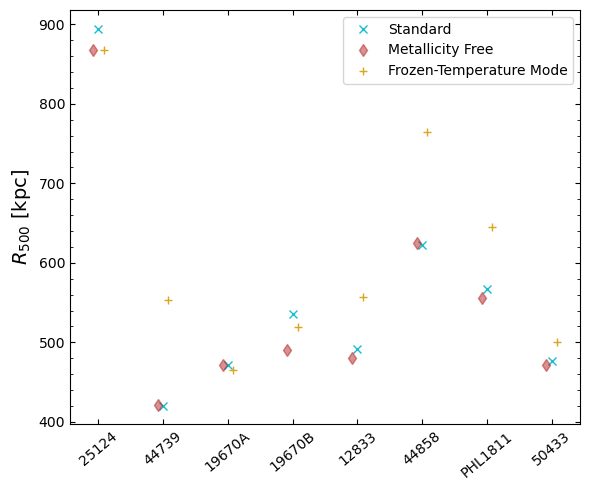

In [168]:
x_offset = 0.08

plt.figure(figsize=(6, 5))
plt.minorticks_on()
plt.tick_params(which='both', direction='in', top=True, right=True)
plt.tick_params(which='minor', axis='x', bottom=False, top=False)

plt.plot(range(len(results)), results['r500'].values, 'x', label="Standard", color=stand_col)
plt.plot(np.array(range(len(results))) - x_offset, results_metfree['r500'].values, 'd', alpha=0.5, 
         label="Metallicity Free", color=metfree_col)
plt.plot(np.array(range(len(results))) + x_offset, results_froztemp['r500'].values, '+', 
         label="Frozen-Temperature Mode", color=froztemp_col)

plt.ylabel(r"$R_{500}$ [kpc]", fontsize=14)

plt.xticks(ticks=range(len(results)), labels=results['name'].values)
ax = plt.gca()
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=40, horizontalalignment='center')

plt.legend()
plt.tight_layout()

plt.savefig('../../outputs/figures/ltr_prop_comparisons/r500_comp.pdf')
plt.show()

#### $R_{2500}$

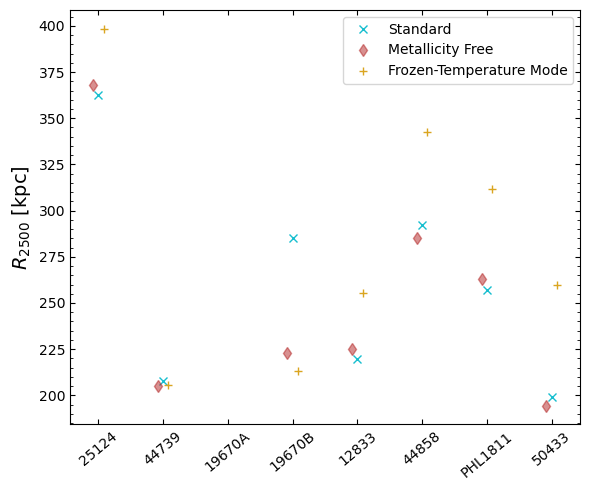

In [169]:
x_offset = 0.08

plt.figure(figsize=(6, 5))
plt.minorticks_on()
plt.tick_params(which='both', direction='in', top=True, right=True)
plt.tick_params(which='minor', axis='x', bottom=False, top=False)

plt.plot(range(len(results)), results_r2500['r2500'].values, 'x', label="Standard", color=stand_col)
plt.plot(np.array(range(len(results))) - x_offset, results_r2500_metfree['r2500'].values, 'd', alpha=0.5, 
         label="Metallicity Free", color=metfree_col)
plt.plot(np.array(range(len(results))) + x_offset, results_r2500_froztemp['r2500'].values, '+', 
         label="Frozen-Temperature Mode", color=froztemp_col)

plt.ylabel(r"$R_{2500}$ [kpc]", fontsize=14)

plt.xticks(ticks=range(len(results)), labels=results['name'].values)
ax = plt.gca()
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=40, horizontalalignment='center')

plt.legend()
plt.tight_layout()

plt.savefig('../../outputs/figures/ltr_prop_comparisons/r2500_comp.pdf')
plt.show()

### X-ray Temperature

The global temperature of the intra-cluster/group medium is a very commonly used parameter to describe a cluster/group, and is closely correlated with the overall mass of the system. It is also used to calculate the radii from the previous section. 

Two of the three temperatures are 'directly measured' by allowing the temperature to vary during the spectral fit, but the 'frozen-temperature' mode values are estimated from luminosity measurements from a spectral fit with fixed temperature:

#### $R_{500}$

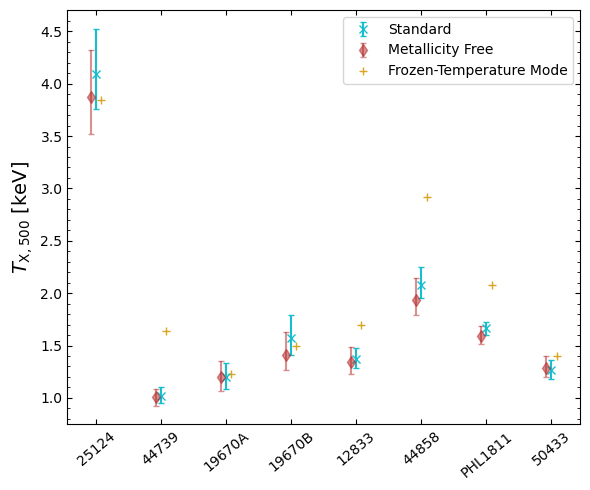

In [170]:
x_offset = 0.08

plt.figure(figsize=(6, 5))
plt.minorticks_on()
plt.tick_params(which='both', direction='in', top=True, right=True)
plt.tick_params(which='minor', axis='x', bottom=False, top=False)

plt.errorbar(range(len(results)), results['Tx500'].values, 
             yerr=results[['Tx500-', 'Tx500+']].T.values, fmt='x', 
             label="Standard", color=stand_col, capsize=2)
plt.errorbar(np.array(range(len(results))) - x_offset, results_metfree['Tx500'].values, 
             yerr=results_metfree[['Tx500-', 'Tx500+']].T.values, fmt='d', alpha=0.5, 
             label="Metallicity Free", color=metfree_col, capsize=2)
plt.plot(np.array(range(len(results))) + x_offset, results_froztemp['froz_Tx500'].values, '+', 
         label="Frozen-Temperature Mode", 
         color=froztemp_col)

plt.ylabel(r"$T_{\rm{X},500}$ [keV]", fontsize=14)

plt.xticks(ticks=range(len(results)), labels=results['name'].values)
ax = plt.gca()
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=40, horizontalalignment='center')

# When creating this plot with no errors on the frozen temperature, the legend had frozen-temperature first
#  even though it was plotted last - I just manually correct that here
handles,labels = ax.get_legend_handles_labels()
handles = [handles[1], handles[2], handles[0]]
labels = [labels[1], labels[2], labels[0]]
ax.legend(handles, labels, loc='best')

plt.tight_layout()

plt.savefig('../../outputs/figures/ltr_prop_comparisons/tx500_comp.pdf')
plt.show()

#### $R_{2500}$

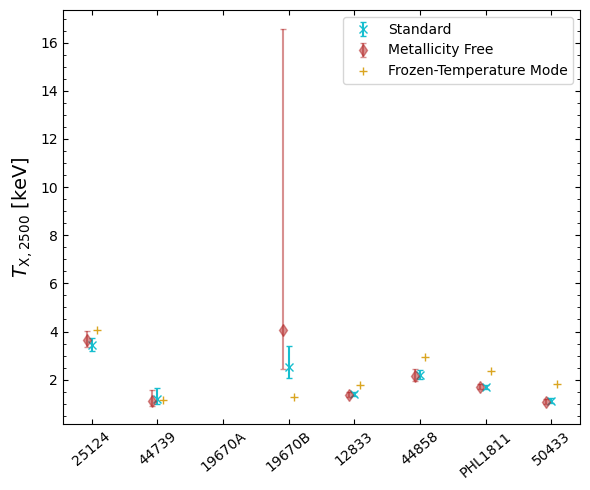

In [171]:
x_offset = 0.08

plt.figure(figsize=(6, 5))
plt.minorticks_on()
plt.tick_params(which='both', direction='in', top=True, right=True)
plt.tick_params(which='minor', axis='x', bottom=False, top=False)

plt.errorbar(range(len(results)), results_r2500['Tx2500'].values, 
             yerr=results_r2500[['Tx2500-', 'Tx2500+']].T.values, fmt='x', 
             label="Standard", color=stand_col, capsize=2)
plt.errorbar(np.array(range(len(results))) - x_offset, results_r2500_metfree['Tx2500'].values, 
             yerr=results_r2500_metfree[['Tx2500-', 'Tx2500+']].T.values, fmt='d', alpha=0.5, 
             label="Metallicity Free", color=metfree_col, capsize=2)
plt.plot(np.array(range(len(results))) + x_offset, results_r2500_froztemp['froz_Tx2500'].values, '+', 
         label="Frozen-Temperature Mode", 
         color=froztemp_col)

plt.ylabel(r"$T_{\rm{X},2500}$ [keV]", fontsize=14)

plt.xticks(ticks=range(len(results)), labels=results['name'].values)
ax = plt.gca()
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=40, horizontalalignment='center')

# When creating this plot with no errors on the frozen temperature, the legend had frozen-temperature first
#  even though it was plotted last - I just manually correct that here
handles,labels = ax.get_legend_handles_labels()
handles = [handles[1], handles[2], handles[0]]
labels = [labels[1], labels[2], labels[0]]
ax.legend(handles, labels, loc='best')

plt.tight_layout()

plt.savefig('../../outputs/figures/ltr_prop_comparisons/tx2500_comp.pdf')
plt.show()

### X-ray Luminosity (0.5 - 2.0 keV)

The luminosity is measured by default as a part of the XGA-LTR run, and in 'frozen-temperature' mode is used to estimate the temperature at each iteration. Measurements within the two overdensity radii ($R_{500}$ and $R_{2500}$ ) are presented, as well as a core-excised ($R_{500\rm{ce}}$, which is from [0.15-1]$R_{500}$. This section pertains specifically to the soft-band (i.e. 0.5-2.0 keV) luminosity:

#### $R_{500}$

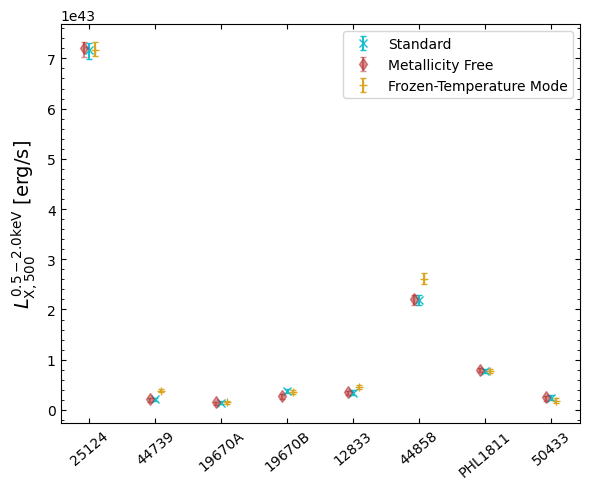

In [172]:
x_offset = 0.08

plt.figure(figsize=(6, 5))
plt.minorticks_on()
plt.tick_params(which='both', direction='in', top=True, right=True)
plt.tick_params(which='minor', axis='x', bottom=False, top=False)

plt.errorbar(range(len(results)), results['Lx500_0.5-2.0'].values, 
             yerr=results[['Lx500_0.5-2.0-', 'Lx500_0.5-2.0+']].T.values, fmt='x', 
             label="Standard", color=stand_col, capsize=2)
plt.errorbar(np.array(range(len(results))) - x_offset, results_metfree['Lx500_0.5-2.0'].values, 
             yerr=results_metfree[['Lx500_0.5-2.0-', 'Lx500_0.5-2.0+']].T.values, fmt='d', alpha=0.5, 
             label="Metallicity Free", color=metfree_col, capsize=2)
plt.errorbar(np.array(range(len(results))) + x_offset, results_froztemp['Lx500_0.5-2.0'].values, 
             yerr=results_froztemp[['Lx500_0.5-2.0-', 'Lx500_0.5-2.0+']].T.values, fmt='+', 
             label="Frozen-Temperature Mode", color=froztemp_col, capsize=2)

plt.ylabel(r"$L^{0.5-2.0\rm{keV}}_{\rm{X},500}$ [erg/s]", fontsize=14)
# plt.yscale('log')

plt.xticks(ticks=range(len(results)), labels=results['name'].values)
ax = plt.gca()
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=40, horizontalalignment='center')

plt.legend()
plt.tight_layout()

plt.savefig('../../outputs/figures/ltr_prop_comparisons/lx500_0.5-2.0_comp.pdf')
plt.show()

#### $R_{500\rm{ce}}$

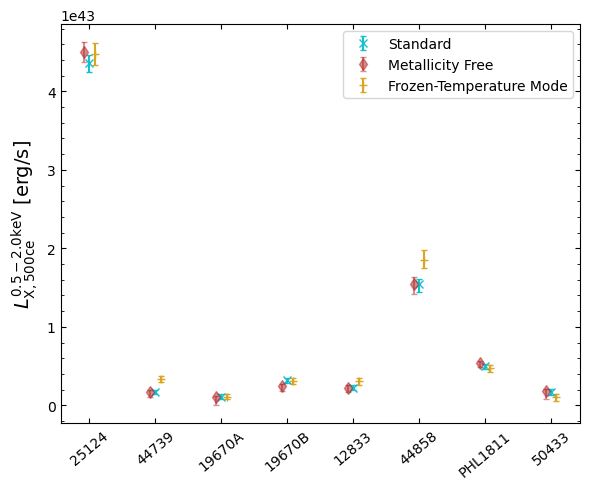

In [173]:
x_offset = 0.08

plt.figure(figsize=(6, 5))
plt.minorticks_on()
plt.tick_params(which='both', direction='in', top=True, right=True)
plt.tick_params(which='minor', axis='x', bottom=False, top=False)

plt.errorbar(range(len(results)), results['Lx500ce_0.5-2.0'].values, 
             yerr=results[['Lx500ce_0.5-2.0-', 'Lx500ce_0.5-2.0+']].T.values, fmt='x', 
             label="Standard", color=stand_col, capsize=2)
plt.errorbar(np.array(range(len(results))) - x_offset, results_metfree['Lx500ce_0.5-2.0'].values, 
             yerr=results_metfree[['Lx500ce_0.5-2.0-', 'Lx500_0.5-2.0+']].T.values, fmt='d', alpha=0.5, 
             label="Metallicity Free", color=metfree_col, capsize=2)
plt.errorbar(np.array(range(len(results))) + x_offset, results_froztemp['Lx500ce_0.5-2.0'].values, 
             yerr=results_froztemp[['Lx500ce_0.5-2.0-', 'Lx500ce_0.5-2.0+']].T.values, fmt='+', 
             label="Frozen-Temperature Mode", color=froztemp_col, capsize=2)

plt.ylabel(r"$L^{0.5-2.0\rm{keV}}_{\rm{X},500\rm{ce}}$ [erg/s]", fontsize=14)
# plt.yscale('log')

plt.xticks(ticks=range(len(results)), labels=results['name'].values)
ax = plt.gca()
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=40, horizontalalignment='center')

plt.legend()
plt.tight_layout()

plt.savefig('../../outputs/figures/ltr_prop_comparisons/lx500ce_0.5-2.0_comp.pdf')
plt.show()

#### $R_{2500}$

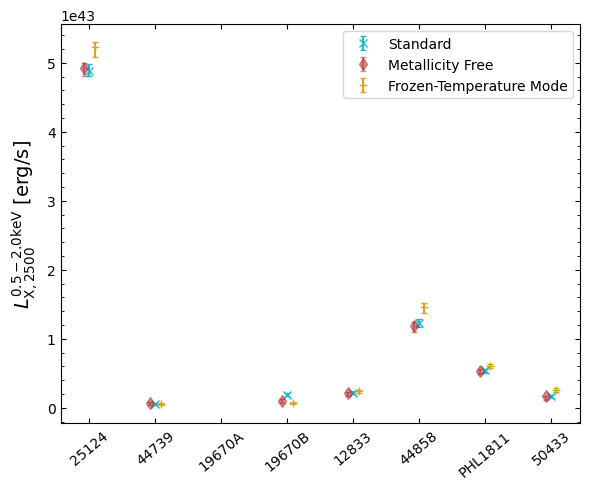

In [174]:
x_offset = 0.08

plt.figure(figsize=(6, 5))
plt.minorticks_on()
plt.tick_params(which='both', direction='in', top=True, right=True)
plt.tick_params(which='minor', axis='x', bottom=False, top=False)

plt.errorbar(range(len(results)), results_r2500['Lx2500_0.5-2.0'].values, 
             yerr=results_r2500[['Lx2500_0.5-2.0-', 'Lx2500_0.5-2.0+']].T.values, fmt='x', 
             label="Standard", color=stand_col, capsize=2)
plt.errorbar(np.array(range(len(results))) - x_offset, results_r2500_metfree['Lx2500_0.5-2.0'].values, 
             yerr=results_r2500_metfree[['Lx2500_0.5-2.0-', 'Lx2500_0.5-2.0+']].T.values, fmt='d', alpha=0.5, 
             label="Metallicity Free", color=metfree_col, capsize=2)
plt.errorbar(np.array(range(len(results))) + x_offset, results_r2500_froztemp['Lx2500_0.5-2.0'].values, 
             yerr=results_r2500_froztemp[['Lx2500_0.5-2.0-', 'Lx2500_0.5-2.0+']].T.values, fmt='+', 
             label="Frozen-Temperature Mode", color=froztemp_col, capsize=2)

plt.ylabel(r"$L^{0.5-2.0\rm{keV}}_{\rm{X},2500}$ [erg/s]", fontsize=14)
# plt.yscale('log')

plt.xticks(ticks=range(len(results)), labels=results['name'].values)
ax = plt.gca()
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=40, horizontalalignment='center')

plt.legend()
plt.tight_layout()

plt.savefig('../../outputs/figures/ltr_prop_comparisons/lx2500_0.5-2.0_comp.pdf')
plt.show()

### X-ray Luminosity (Bolometric)

We also present measurements of bolometric X-ray luminosity:

#### $R_{500}$

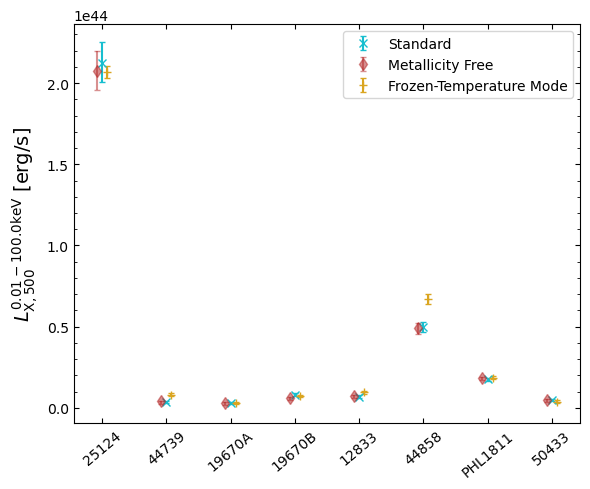

In [175]:
x_offset = 0.08

plt.figure(figsize=(6, 5))
plt.minorticks_on()
plt.tick_params(which='both', direction='in', top=True, right=True)
plt.tick_params(which='minor', axis='x', bottom=False, top=False)

plt.errorbar(range(len(results)), results['Lx500_0.01-100.0'].values, 
             yerr=results[['Lx500_0.01-100.0-', 'Lx500_0.01-100.0+']].T.values, fmt='x', 
             label="Standard", color=stand_col, capsize=2)
plt.errorbar(np.array(range(len(results))) - x_offset, results_metfree['Lx500_0.01-100.0'].values, 
             yerr=results_metfree[['Lx500_0.01-100.0-', 'Lx500_0.01-100.0+']].T.values, fmt='d', alpha=0.5, 
             label="Metallicity Free", color=metfree_col, capsize=2)
plt.errorbar(np.array(range(len(results))) + x_offset, results_froztemp['Lx500_0.01-100.0'].values, 
             yerr=results_froztemp[['Lx500_0.01-100.0-', 'Lx500_0.01-100.0+']].T.values, fmt='+', 
             label="Frozen-Temperature Mode", color=froztemp_col, capsize=2)

plt.ylabel(r"$L^{0.01-100.0\rm{keV}}_{\rm{X},500}$ [erg/s]", fontsize=14)
# plt.yscale('log')

plt.xticks(ticks=range(len(results)), labels=results['name'].values)
ax = plt.gca()
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=40, horizontalalignment='center')

plt.legend()
plt.tight_layout()

plt.savefig('../../outputs/figures/ltr_prop_comparisons/lx500_0.01-100.0_comp.pdf')
plt.show()

#### $R_{500\rm{ce}}$

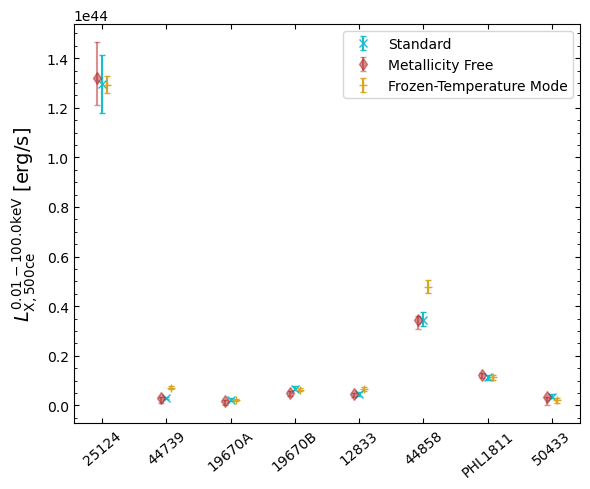

In [176]:
x_offset = 0.08

plt.figure(figsize=(6, 5))
plt.minorticks_on()
plt.tick_params(which='both', direction='in', top=True, right=True)
plt.tick_params(which='minor', axis='x', bottom=False, top=False)

plt.errorbar(range(len(results)), results['Lx500ce_0.01-100.0'].values, 
             yerr=results[['Lx500ce_0.01-100.0-', 'Lx500ce_0.01-100.0+']].T.values, fmt='x', 
             label="Standard", color=stand_col, capsize=2)
plt.errorbar(np.array(range(len(results))) - x_offset, results_metfree['Lx500ce_0.01-100.0'].values, 
             yerr=results_metfree[['Lx500ce_0.01-100.0-', 'Lx500ce_0.01-100.0+']].T.values, fmt='d', alpha=0.5, 
             label="Metallicity Free", color=metfree_col, capsize=2)
plt.errorbar(np.array(range(len(results))) + x_offset, results_froztemp['Lx500ce_0.01-100.0'].values, 
             yerr=results_froztemp[['Lx500ce_0.01-100.0-', 'Lx500ce_0.01-100.0+']].T.values, fmt='+', 
             label="Frozen-Temperature Mode", color=froztemp_col, capsize=2)

plt.ylabel(r"$L^{0.01-100.0\rm{keV}}_{\rm{X},500\rm{ce}}$ [erg/s]", fontsize=14)
# plt.yscale('log')

plt.xticks(ticks=range(len(results)), labels=results['name'].values)
ax = plt.gca()
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=40, horizontalalignment='center')

plt.legend()
plt.tight_layout()

plt.savefig('../../outputs/figures/ltr_prop_comparisons/lx500ce_0.01-100.0_comp.pdf')
plt.show()

#### $R_{2500}$

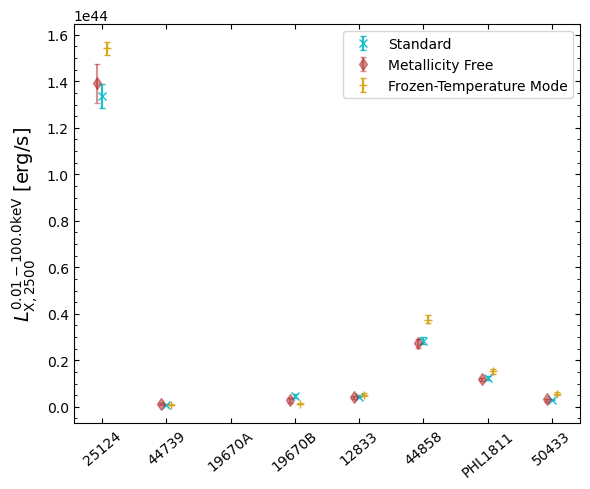

In [177]:
x_offset = 0.08

plt.figure(figsize=(6, 5))
plt.minorticks_on()
plt.tick_params(which='both', direction='in', top=True, right=True)
plt.tick_params(which='minor', axis='x', bottom=False, top=False)

plt.errorbar(range(len(results)), results_r2500['Lx2500_0.01-100.0'].values, 
             yerr=results_r2500[['Lx2500_0.01-100.0-', 'Lx2500_0.01-100.0+']].T.values, fmt='x', 
             label="Standard", color=stand_col, capsize=2)
plt.errorbar(np.array(range(len(results))) - x_offset, results_r2500_metfree['Lx2500_0.01-100.0'].values, 
             yerr=results_r2500_metfree[['Lx2500_0.01-100.0-', 'Lx2500_0.01-100.0+']].T.values, fmt='d', 
             alpha=0.5, label="Metallicity Free", color=metfree_col, capsize=2)
plt.errorbar(np.array(range(len(results))) + x_offset, results_r2500_froztemp['Lx2500_0.01-100.0'].values, 
             yerr=results_r2500_froztemp[['Lx2500_0.01-100.0-', 'Lx2500_0.01-100.0+']].T.values, fmt='+', 
             label="Frozen-Temperature Mode", color=froztemp_col, capsize=2)

plt.ylabel(r"$L^{0.01-100.0\rm{keV}}_{\rm{X},2500}$ [erg/s]", fontsize=14)
# plt.yscale('log')

plt.xticks(ticks=range(len(results)), labels=results['name'].values)
ax = plt.gca()
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=40, horizontalalignment='center')

plt.legend()
plt.tight_layout()

plt.savefig('../../outputs/figures/ltr_prop_comparisons/lx2500_0.01-100.0_comp.pdf')
plt.show()